**DATA SCIENCE II - PROYECTO FINAL: SUICIDIO Y PANDEMIA. ANÁLISIS SOBRE LA INCIDENCIA DE LAS POLÍTICAS SANITARIAS DE CONFINAMIENTO EN LA TASA DE SUICIDIOS EN ARGENTINA ENTRE 2019 Y 2022**

1. **Objetivo**: Analizar el impacto de las políticas de confinamiento sanitario en el marco de la pandemia global de COVID-19 sobre la tasa de suicidios en Argentina entre 2019 y 2022.

2. **Contexto**: Dada la implementación de políticas públicas sanitarias en Argentina, buscamos verificar si estas políticas influyeron en la tasa de suicidios del país. Además, pretendemos caracterizar a la población afectada en términos geográficos, etarios y de género, con el fin de identificar grupos vulnerables y generar políticas públicas integrales basadas en los hallazgos.

3. **Preguntas Problema**:
   - ¿Tuvieron las políticas sanitarias de confinamiento alguna influencia en los hechos de suicidio en Argentina entre 2019 y 2022?
   - ¿Se observan diferencias regionales en los hechos de suicidio durante dicho período? ¿Existe alguna evidencia de la influencia de las medidas de confinamiento?
   - ¿Existen diferencias en la tasa de suicidios entre distintos grupos etarios y de género? ¿Cómo influyeron las medidas de confinamiento en estos grupos?

4. **Data Acquisition**:
   Para responder nuestras preguntas, analizaremos los datos proporcionados por la Dirección Nacional de Estadística Criminal del Ministerio de Seguridad de la Nación, a través del Sistema de Alerta Temprana, que registra hechos de suicidio en Argentina entre 2017 y 2022. Estos datos son generados por diversas instituciones públicas bajo la coordinación del Ministerio de Seguridad de la Nación, el Ministerio de Ciencia, Tecnología e Innovación y la Secretaría de Políticas Integrales sobre Drogas de la Nación Argentina (SEDRONAR).

   Usaremos las definiciones teóricas y técnicas incluidas en la Guía Operativa del Sistema de Alerta Temprana y el Manual del usuario de la base Sistema de Alerta Temprana Suicidios (SAT-SS). Dado que estos datos provienen directamente de los portales institucionales, son considerados de First Party.

   En nuestra primera revisión de la base de datos SAT-SS-BU_2017-2022, seleccionaremos las variables necesarias para el análisis, que son:

   - **id_hecho**: Código de identificación del hecho. Tipo de dato: Numérico. Identificador único que permite calcular la cantidad de hechos y víctimas. No contiene valores perdidos.
   - **provincia_id**: Código de la provincia donde ocurrió el hecho. Tipo de dato: Categórico. Los códigos coinciden con los de INDEC, útil para cruces con otras bases de datos. Disponibilidad del dato: 100%.
   - **provincia_nombre**: Nombre de la provincia donde ocurrió el hecho. Tipo de dato: Texto. No contiene valores perdidos.
   - **departamento_id**: Código de 5 cifras para el departamento y la provincia. Tipo de dato: Texto. Los primeros 2 dígitos corresponden a la provincia y los últimos 3 al departamento. Disponibilidad del dato: 99,8%.
   - **departamento_nombre**: Nombre del departamento geográfico donde ocurrió el hecho. Tipo de dato: Texto. Ver descripción de la variable departamento_id.
   - **localidad_id**: Código de la localidad donde ocurrió el hecho. Tipo de dato: Texto. Para algunas provincias, los códigos coinciden con los de INDEC. Disponibilidad del dato: 100%.
   - **anio**: Año de ocurrencia del hecho. Tipo de dato: Numérico. Se valida con la fecha del hecho.
   - **mes**: Mes de ocurrencia del hecho. Tipo de dato: Numérico. Valores entre 1 y 12, se valida con la fecha del hecho.
   - **fecha_hecho**: Fecha de ocurrencia del hecho. Tipo de dato: Fecha (Formato: dd/mm/aaaa). Se valida con las variables anio y mes. Disponibilidad del dato: 100%.
   - **tipo_lugar**: Lugar de ocurrencia del hecho. Tipo de dato: Categórico. Categorías incluyen: Vía pública, Domicilio particular, Vías del ferrocarril, Cárcel o comisaría, Otro lugar, Sin determinar.
   - **tipo_lugar_ampliado**: Tipo de lugar de ocurrencia del hecho con categorías adicionales. Tipo de dato: Texto. Categorías incluyen: Campo/descampado/zona rural, Cárcel o comisaría, Domicilio particular, Establecimiento comercial, Establecimiento de salud/salud mental, Geriátrico/Hogar, Hotel/Motel/Hospedaje temporario, Otro lugar (Especificar), Río/canal/arroyo/mar/dique, Sin determinar, Vía pública, Vías del FF.CC..
   - **modalidad**: Modalidad utilizada para llevar a cabo el acto. Tipo de dato: Categórico. Categorías incluyen: Arma de fuego, Arma blanca/elemento cortante, Sumersión en piscina/mar/río, Envenenamiento, Ahorcamiento, Se arroja al vacío, Se arroja a las vías del ferrocarril, Otra modalidad, Se incinera, Sin determinar.
   - **suicida_sexo**: Sexo del suicida. Tipo de dato: Categórico. Categorías incluyen: Femenino, Masculino, Sin determinar.
   - **suicida_tr_edad**: Edad del suicida en tramos. Tipo de dato: Categórico. Categorías incluyen: Sin determinar, 4 años o menos, 5-9 años, 10-14 años, 15-19 años, 20-24 años, 25-29 años, 30-34 años, 35-39 años, 40-44 años, 45-49 años, 50-54 años, 55-59 años, 60-64 años, 65-69 años, 70-74 años, 75-79 años, 80-84 años, 85-89 años, más de 90 años.

   Consideramos que el resto de las variables en la base de datos SAT no son relevantes para nuestro análisis. Observamos que hay exceso de categorización en varias variables, por lo que iniciaremos el proceso de exploración de datos y ajustaremos las estructuras de datos para los análisis posteriores. A continuación, detallaremos las variables contenidas en la base POBLA_ARG_2022, construida a partir de los datos demográficos del Censo Nacional de Población, Hogares y Viviendas 2022, utilizando solo las poblaciones totales y desagregadas por sexo.

   - **provincia_id**: Código de la provincia según el INDEC. Tipo de dato: Categórico. Identifica de manera única a cada provincia en Argentina. Utilizado para uniones con otras bases de datos basadas en la región.
   - **provincia_nombre**: Nombre de la provincia en Argentina. Tipo de dato: Texto. Proporciona el nombre de la provincia correspondiente al código de provincia. No contiene valores perdidos.
   - **Población**: Total de la población en la provincia. Tipo de dato: Numérico. Representa el número total de habitantes en la provincia. Esencial para calcular tasas ajustadas por población.
   - **Mujeres**: Total de la población femenina en la provincia. Tipo de dato: Numérico. Representa el número total de mujeres en la provincia. Útil para análisis de género y comparación con la población masculina.
   - **Varones**: Total de la población masculina en la provincia. Tipo de dato: Numérico. Representa el número total de hombres en la provincia. Se utiliza junto con la población femenina para análisis de género.

   Con esta aproximación técnica, iniciaremos el proceso de Análisis Exploratorio de Datos (EDA).

5. **Exploratory Data Analysis (EDA)**:
   Proceso crítico donde se realizan análisis iniciales sobre los datos para descubrir patrones, detectar anomalías, probar hipótesis y verificar suposiciones mediante estadísticas y representaciones gráficas.

   Habiendo definido las variables para nuestro análisis, procederemos a realizar una serie de procesos previos a la primera exploración de los datos. En primer lugar, cargaremos las librerías necesarias para el análisis, estructuraremos y normalizaremos los datos, y luego generaremos diversas visualizaciones para aproximarnos a las respuestas sobre nuestras hipótesis y preguntas.

Saving POBLA_ARG_2022.xlsx to POBLA_ARG_2022.xlsx
Saving SAT-SS-BU_2017-2022.xlsx to SAT-SS-BU_2017-2022.xlsx
Información del DataFrame SAT-SS-BU_2017-2022:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_hecho                     21719 non-null  int64         
 1   federal                      21719 non-null  object        
 2   provincia_id                 21719 non-null  int64         
 3   provincia_nombre             21719 non-null  object        
 4   departamento_id              21719 non-null  int64         
 5   departamento_nombre          21719 non-null  object        
 6   localidad_id                 21719 non-null  object        
 7   localidad_nombre             21719 non-null  object        
 8   anio                         21719 non-null  int64         
 9   mes           

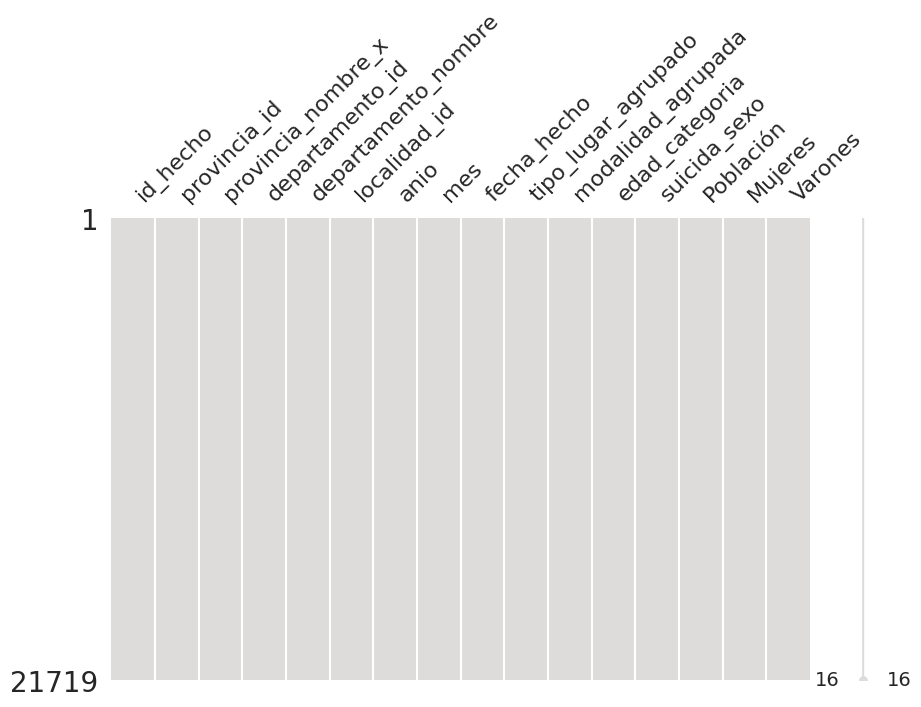

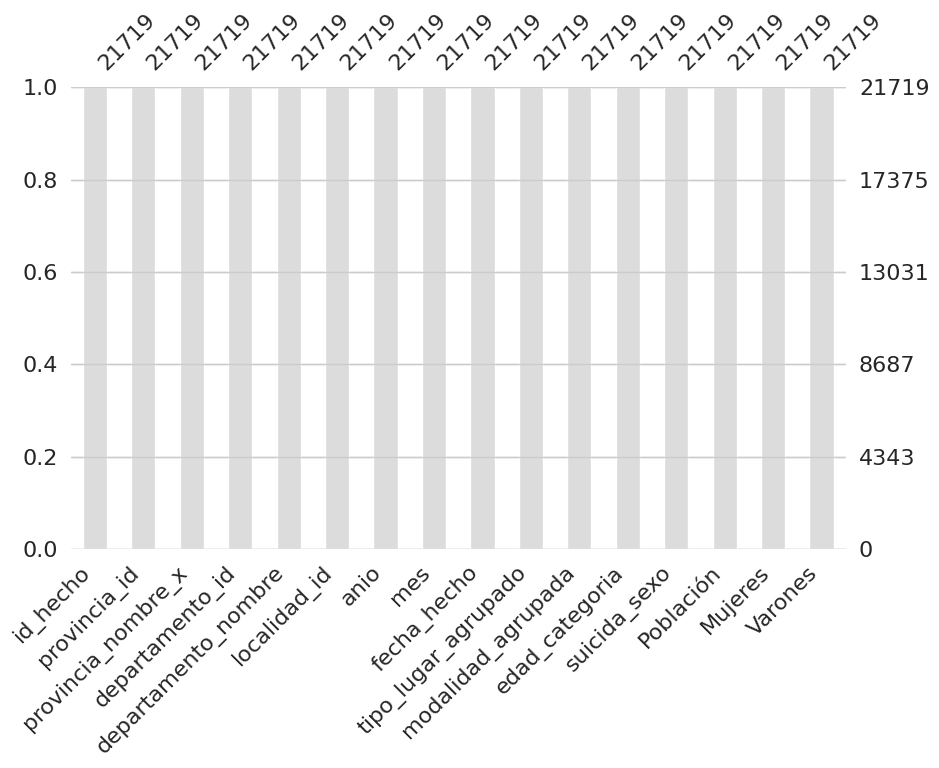

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import missingno as msno

# Configurar Seaborn para mejorar la estética de los gráficos
sns.set(style="whitegrid")

pd.set_option('display.max_columns', None)

# CARGA DE BASES DE DATOS
from google.colab import files

uploaded = files.upload()

df_sat_2017_2022 = pd.read_excel("SAT-SS-BU_2017-2022.xlsx")
print("Información del DataFrame SAT-SS-BU_2017-2022:")
df_sat_2017_2022.info()
print("\nDimensiones del DataFrame SAT-SS-BU_2017-2022:", df_sat_2017_2022.shape)

df_pob_arg_2022 = pd.read_excel("POBLA_ARG_2022.xlsx")
print("\nInformación del DataFrame POBLA_ARG_2022:")
df_pob_arg_2022.info()
print("\nDimensiones del DataFrame POBLA_ARG_2022:", df_pob_arg_2022.shape)

# UNION EN FRAME DE SAT Y POBLACIÓN
assert 'provincia_id' in df_sat_2017_2022.columns, "Columna 'provincia_id' no encontrada en df_sat_2017_2022"
assert 'provincia_id' in df_pob_arg_2022.columns, "Columna 'provincia_id' no encontrada en df_pob_arg_2022"
df_sat_pob = pd.merge(df_sat_2017_2022, df_pob_arg_2022, on="provincia_id", how="inner")
print("\nInformación del DataFrame combinado df_sat_pob:")
df_sat_pob.info()
print("\nDimensiones del DataFrame combinado df_sat_pob:", df_sat_pob.shape)

# Normalización de las variables

# Normalización de la variable suicida_tr_edad a categorías más amplias
def categorizar_edad(edad):
    if edad in ['0-4', '5-9', '10-14']:
        return '0-14 años'
    elif edad in ['15-19', '20-24', '25-29', '30-34']:
        return '15-34 años'
    elif edad in ['35-39', '40-44', '45-49', '50-54']:
        return '35-54 años'
    elif edad in ['55-59', '60-64', '65-69', '70-74']:
        return '55-74 años'
    elif edad in ['75-79', '80-84', '85-89', '90+']:
        return '75+ años'
    else:
        return 'Sin determinar'

df_sat_pob['edad_categoria'] = df_sat_pob['suicida_tr_edad'].apply(categorizar_edad)

# Normalización de la variable tipo_lugar_ampliado
def agrupar_tipo_lugar(lugar):
    if lugar in ['Cárcel o comisaría', 'Establecimiento de salud/salud mental', 'Geriátrico/Hogar']:
        return 'Instituciones'
    elif lugar in ['Vía pública', 'Campo/descampado/zona rural', 'Río/canal/arroyo/mar/dique']:
        return 'Espacios públicos'
    elif lugar in ['Domicilio particular', 'Hotel/Motel/Hospedaje temporario']:
        return 'Privado'
    else:
        return 'Otros'

df_sat_pob['tipo_lugar_agrupado'] = df_sat_pob['tipo_lugar_ampliado'].apply(agrupar_tipo_lugar)

# Normalización de la variable modalidad
def agrupar_modalidad(modalidad):
    if modalidad in ['Arma de fuego', 'Arma blanca/elemento cortante']:
        return 'Armas'
    elif modalidad in ['Ahorcamiento', 'Sumersión en piscina/mar/río']:
        return 'Métodos de asfixia'
    else:
        return 'Otros métodos'

df_sat_pob['modalidad_agrupada'] = df_sat_pob['modalidad'].apply(agrupar_modalidad)

# Selección de columnas de interés para el nuevo análisis
columnas_interes = [
    "id_hecho", "provincia_id", "provincia_nombre_x", "departamento_id",
    "departamento_nombre", "localidad_id", "anio", "mes", "fecha_hecho",
    "tipo_lugar_agrupado", "modalidad_agrupada", "edad_categoria",
    "suicida_sexo", "Población", "Mujeres", "Varones"
]

df2 = df_sat_pob[columnas_interes]
print("\nDimensiones del DataFrame df2 con columnas de interés:", df2.shape)
df2.head()

# ANÁLISIS DE VALORES NULOS
valores_nulos = df2.isnull().sum()
print("\nCantidad de valores nulos por columna:")
print(valores_nulos)

# Visualización de valores nulos con Missingno usando el estilo de Seaborn
msno.matrix(df2, figsize=(10, 6), color=sns.color_palette("coolwarm", 1)[0])
plt.show()

msno.bar(df2, figsize=(10, 6), color=sns.color_palette("coolwarm", 1)[0])
plt.show()



In [ ]:
df_sat_pob.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21719 entries, 0 to 21718
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_hecho                     21719 non-null  int64         
 1   federal                      21719 non-null  object        
 2   provincia_id                 21719 non-null  int64         
 3   provincia_nombre_x           21719 non-null  object        
 4   departamento_id              21719 non-null  int64         
 5   departamento_nombre          21719 non-null  object        
 6   localidad_id                 21719 non-null  object        
 7   localidad_nombre             21719 non-null  object        
 8   anio                         21719 non-null  int64         
 9   mes                          21719 non-null  int64         
 10  fecha_hecho                  21719 non-null  datetime64[ns]
 11  hora_hecho                   21719 non-nu

En esta primera parte del código, cargamos las librerías necesarias para la manipulación de datos y procedimos a importar las bases de datos que utilizaremos para el análisis. Estas incluyen el archivo `SAT-SS-BU_2017-2022.xlsx`, que contiene información sobre suicidios, y el archivo `POBLA_ARG_2022.xlsx`, que proporciona datos demográficos por provincia.

A continuación, unificamos ambas bases de datos utilizando la columna "provincia_id" como clave de combinación. Verificamos la presencia de esta columna en ambos DataFrames y la renombramos adecuadamente para asegurar una integración correcta en el DataFrame final.

Posteriormente, normalizamos algunas categorías para evitar la saturación de datos que podría dificultar la visualización y el análisis. Las variables se normalizaron de la siguiente manera:
- **Edad**: Se agruparon en rangos más amplios (0-14 años, 15-34 años, etc.).
- **Tipo de Lugar**: Se clasificaron en categorías como Instituciones, Espacios Públicos, Privados y Otros.
- **Modalidad**: Se simplificó en Armas, Métodos de Asfixia y Otros Métodos.

Después, seleccionamos las variables de interés para el nuevo DataFrame normalizado y analizamos la presencia de valores nulos en los datos. La evaluación de valores nulos reveló que no había datos faltantes en las columnas seleccionadas, lo que indica que los datos están completos y listos para un análisis más profundo.

En la siguiente etapa, realizaremos una primera aproximación a los datos, comenzando con el cálculo de la cantidad de hechos de suicidio por trimestre a lo largo de la serie histórica que abarca los años 2019 a 2022. Si bien la base es más extensa, consideramos que para nuestra hipótesis basta con tener una referencia de un año anterior a la pandemia y otro posterior al levantamiento final de las medidas sanitarias. Este análisis nos permitirá identificar tendencias y patrones relevantes en el comportamiento de las tasas de suicidio en el contexto de las políticas sanitarias implementadas durante la pandemia.

<ipython-input-8-8c672df06577>:35: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


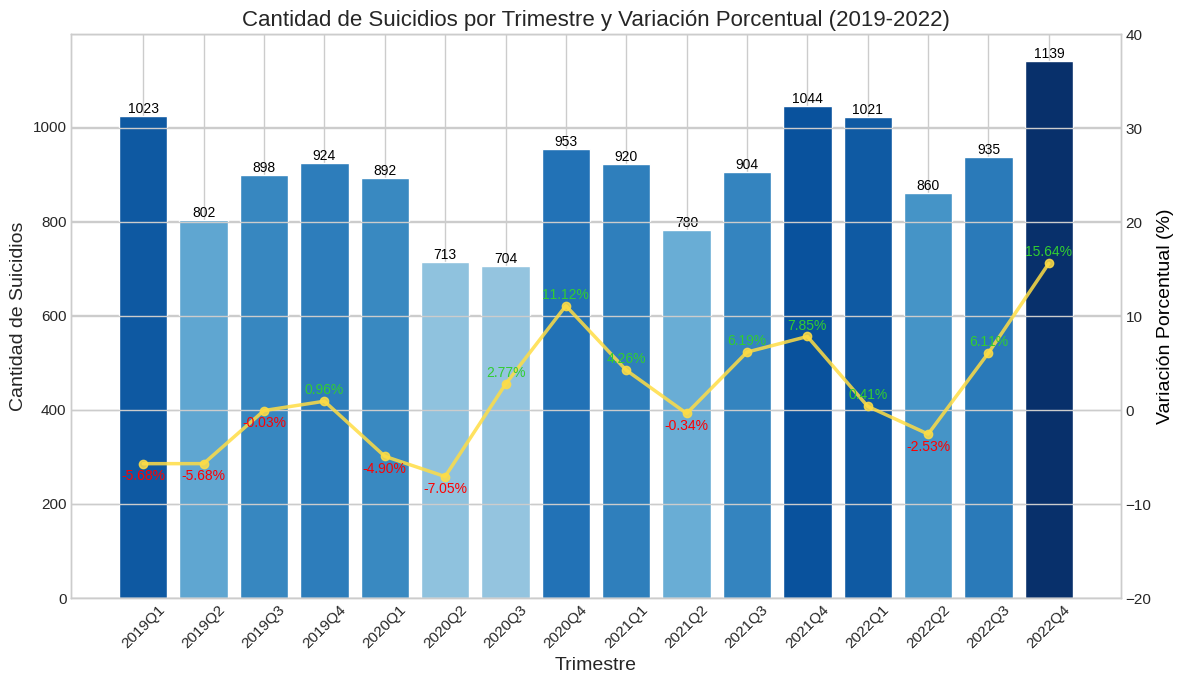

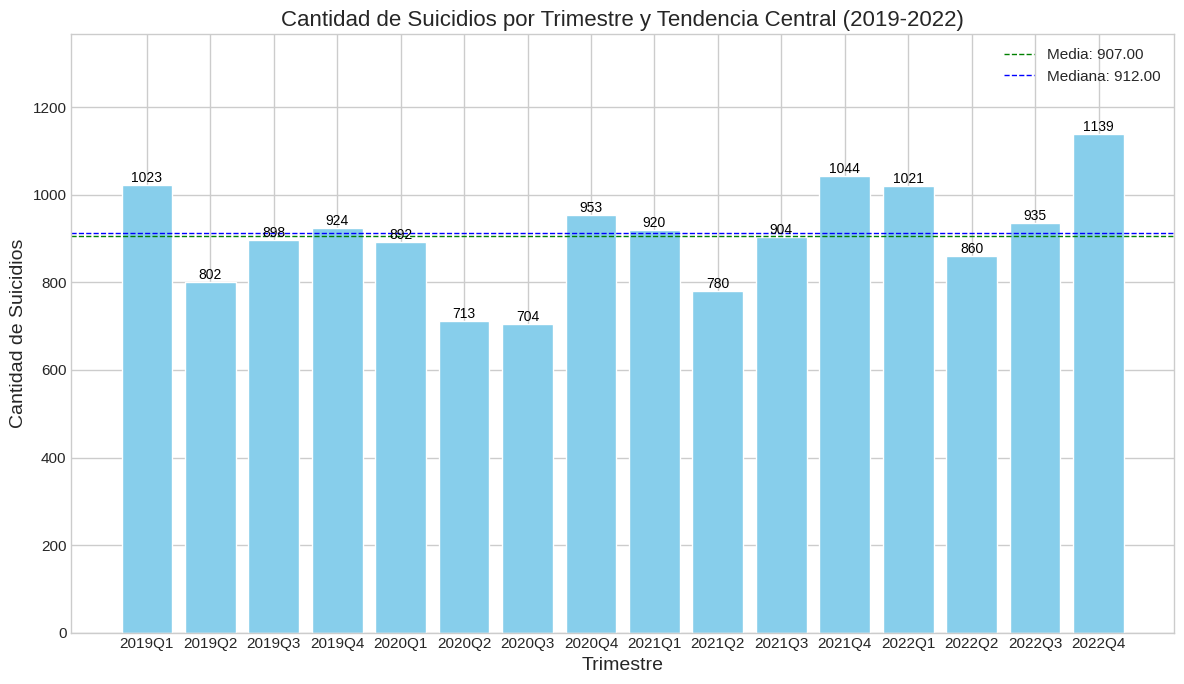

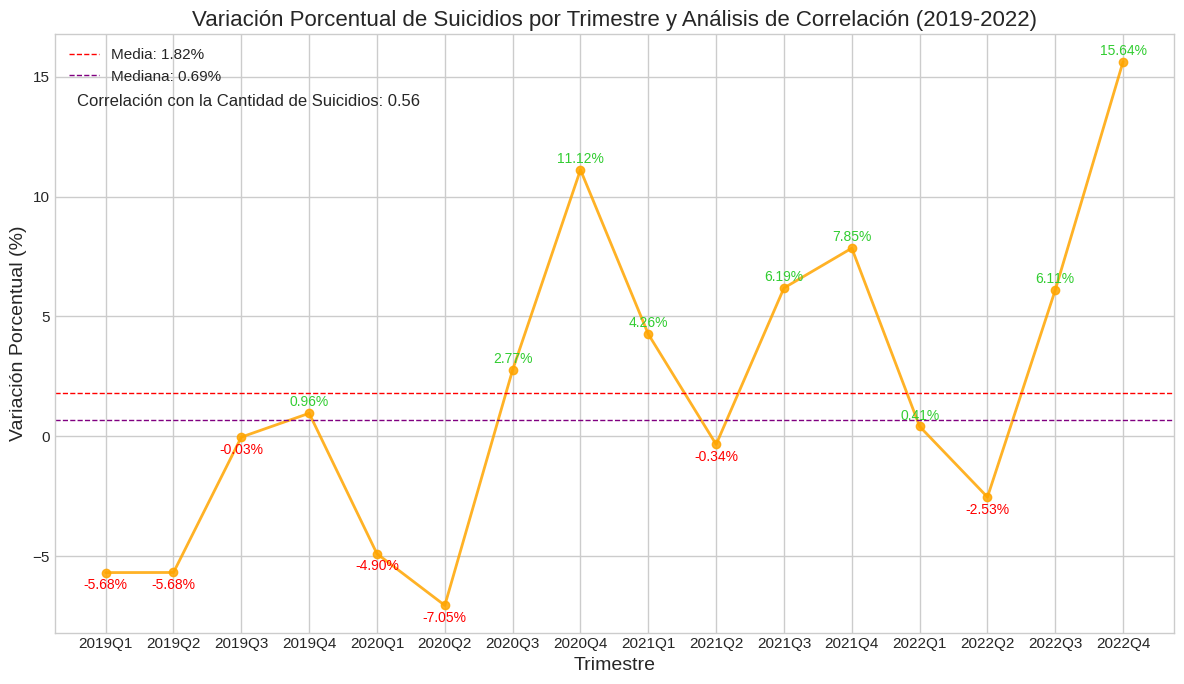

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.ndimage import gaussian_filter1d

# Agrupar los datos por trimestre y contar la cantidad de suicidios por trimestre
df_sat_pob['fecha_hecho'] = pd.to_datetime(df_sat_pob['fecha_hecho'])
df_sat_pob['trimestre'] = df_sat_pob['fecha_hecho'].dt.to_period('Q')

# Filtrar los datos entre 2019 y 2022
df_filtered = df_sat_pob[(df_sat_pob['fecha_hecho'].dt.year >= 2019) & (df_sat_pob['fecha_hecho'].dt.year <= 2022)]

suicidios_por_trimestre = df_filtered.groupby('trimestre')['id_hecho'].count()

# Calcular la variación porcentual desde el primer trimestre de 2019
variacion_porcentual = (suicidios_por_trimestre.pct_change() * 100).fillna(0)

# Aplicar un suavizado a la variación porcentual
variacion_porcentual_suavizada = gaussian_filter1d(variacion_porcentual, sigma=1)

# Crear un DataFrame para la visualización
df_suicidios = pd.DataFrame({
    'Trimestre': suicidios_por_trimestre.index,
    'Cantidad de Suicidios': suicidios_por_trimestre.values,
    'Variación Porcentual': variacion_porcentual_suavizada
})

# Generar una paleta de colores en tonos pastel con intensidades proporcionales
min_value = df_suicidios['Cantidad de Suicidios'].min()
max_value = df_suicidios['Cantidad de Suicidios'].max()
normalized_values = (df_suicidios['Cantidad de Suicidios'] - min_value) / (max_value - min_value)
colors = plt.cm.Blues(0.4 + 0.6 * normalized_values)

# Configurar el estilo de Matplotlib
plt.style.use('seaborn-whitegrid')

# Crear la figura y los ejes para el gráfico original
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar las barras para la cantidad de suicidios por trimestre con la paleta ajustada
bars = ax1.bar(df_suicidios['Trimestre'].astype(str), df_suicidios['Cantidad de Suicidios'], color=colors)

# Añadir etiquetas de datos en cada barra
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom", fontsize=10, color='black')

# Configurar títulos y etiquetas
ax1.set_title('Cantidad de Suicidios por Trimestre y Variación Porcentual (2019-2022)', fontsize=16)
ax1.set_xlabel('Trimestre', fontsize=14)
ax1.set_ylabel('Cantidad de Suicidios', fontsize=14)

# Crear un segundo eje para la variación porcentual
ax2 = ax1.twinx()
ax2.set_ylim(-20, 40)  # Ajustar el rango del eje derecho

# Graficar la línea de variación porcentual suavizada con un color pastel y aumentar el grosor
ax2.plot(df_suicidios['Trimestre'].astype(str), df_suicidios['Variación Porcentual'], color='#FFDD44', marker='o', linestyle='-', linewidth=2.5, alpha=0.85)

ax2.set_ylabel('Variación Porcentual (%)', fontsize=14, color='black')

# Ajustar las etiquetas de la variación porcentual para que no se superpongan y usar un verde más brillante para valores positivos
for index, row in df_suicidios.iterrows():
    ax2.annotate(f'{row["Variación Porcentual"]:.2f}%',
                 (index, row['Variación Porcentual']),
                 textcoords="offset points", xytext=(0, -12 if row['Variación Porcentual'] < 0 else 5),
                 ha='center', color='#32CD32' if row['Variación Porcentual'] >= 0 else 'red', fontsize=10)

# Ajustar los ticks del eje X para mostrar correctamente los trimestres
ax1.set_xticks(np.arange(len(df_suicidios)))
ax1.set_xticklabels(df_suicidios['Trimestre'].astype(str), rotation=45)

# Mostrar el gráfico original
plt.tight_layout()
plt.show()

# ---------------- Gráfico de Tendencia Central ---------------- #
# Medidas de tendencia central
media_suicidios = df_suicidios['Cantidad de Suicidios'].mean()
mediana_suicidios = df_suicidios['Cantidad de Suicidios'].median()

media_variacion = df_suicidios['Variación Porcentual'].mean()
mediana_variacion = df_suicidios['Variación Porcentual'].median()

# Crear la figura para la cantidad de suicidios
fig, ax1 = plt.subplots(figsize=(12, 7))

# Graficar las barras para la cantidad de suicidios por trimestre
bars = ax1.bar(df_suicidios['Trimestre'].astype(str), df_suicidios['Cantidad de Suicidios'], color='skyblue')

# Añadir etiquetas de datos en cada barra
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha="center", va="bottom", fontsize=10, color='black')

# Añadir líneas de tendencia central (media y mediana)
ax1.axhline(media_suicidios, color='green', linestyle='--', linewidth=1, label=f'Media: {media_suicidios:.2f}')
ax1.axhline(mediana_suicidios, color='blue', linestyle='--', linewidth=1, label=f'Mediana: {mediana_suicidios:.2f}')

# Ajustar el eje Y para mostrar mejor la diferencia entre la media y mediana
ax1.set_ylim(0, max(df_suicidios['Cantidad de Suicidios']) * 1.2)

# Configurar títulos y etiquetas
ax1.set_title('Cantidad de Suicidios por Trimestre y Tendencia Central (2019-2022)', fontsize=16)
ax1.set_xlabel('Trimestre', fontsize=14)
ax1.set_ylabel('Cantidad de Suicidios', fontsize=14)
ax1.legend()

# Mostrar el gráfico de cantidad de suicidios y tendencia central
plt.tight_layout()
plt.show()

# ---------------- Gráfico de Análisis de Correlación ---------------- #
# Crear la figura para la variación porcentual
fig, ax2 = plt.subplots(figsize=(12, 7))

# Graficar la línea de variación porcentual suavizada
ax2.plot(df_suicidios['Trimestre'].astype(str), df_suicidios['Variación Porcentual'], color='orange', marker='o', linestyle='-', linewidth=2, alpha=0.85)

# Añadir líneas de tendencia central (media y mediana)
ax2.axhline(media_variacion, color='red', linestyle='--', linewidth=1, label=f'Media: {media_variacion:.2f}%')
ax2.axhline(mediana_variacion, color='purple', linestyle='--', linewidth=1, label=f'Mediana: {mediana_variacion:.2f}%')

# Análisis de correlación entre la cantidad de suicidios y la variación porcentual
correlacion = df_suicidios['Cantidad de Suicidios'].corr(df_suicidios['Variación Porcentual'])

# Contextualizar la correlación con un cuadro de texto ubicado en una posición segura
ax2.text(0.02, 0.90, f'Correlación con la Cantidad de Suicidios: {correlacion:.2f}',
         transform=ax2.transAxes, fontsize=12, verticalalignment='top')

# Añadir etiquetas de datos de variación porcentual en cada punto
for index, row in df_suicidios.iterrows():
    ax2.annotate(f'{row["Variación Porcentual"]:.2f}%',
                 (index, row['Variación Porcentual']),
                 textcoords="offset points", xytext=(0, -12 if row['Variación Porcentual'] < 0 else 5),
                 ha='center', color='#32CD32' if row['Variación Porcentual'] >= 0 else 'red', fontsize=10)

# Configurar títulos y etiquetas
ax2.set_title('Variación Porcentual de Suicidios por Trimestre y Análisis de Correlación (2019-2022)', fontsize=16)
ax2.set_xlabel('Trimestre', fontsize=14)
ax2.set_ylabel('Variación Porcentual (%)', fontsize=14)
ax2.legend()

# Mostrar el gráfico de variación porcentual y análisis de correlación
plt.tight_layout()
plt.show()


Respecto a esta primera aproximación, tomamos la cantidad de hechos sucedidos en una serie temporal cuatrimestral que va desde el 2019 al 2022 y expresamos una linea de variación porcentual que sea sensible al conteo de suicidios para cada cuatrimestre, en orden de observar visualmente la tendencia general de los hechos de suicidio en dicho período.

### **Análisis de la Tendencia General:**

#### **Antes del Encierro (2019):**
En 2019, la cantidad de suicidios muestra una estabilidad relativa a lo largo del año, con una ligera disminución en los primeros dos trimestres y una recuperación hacia el final. La variación porcentual negativa en los primeros trimestres sugiere un comportamiento más conservador de la tendencia, lo que podría reflejar un período de estabilidad antes del impacto disruptivo de la pandemia.

#### **Durante el Encierro (2020):**
El 2020 marca un cambio notable, algo que aducimos fue debido al encierro estricto en Argentina, que comenzó en marzo de 2020. La fuerte disminución en suicidios durante el primer trimestre (Q1) y la caída significativa en el segundo trimestre (Q2) coinciden con las fases más restrictivas del encierro. La correlación entre la cantidad de suicidios y la variación porcentual en este período es más evidente, reflejando cómo las medidas de confinamiento podrían haber influido en una reducción inicial en la cantidad de suicidios. Sin embargo, a medida que las restricciones se relajaron, se observa un repunte en el tercer trimestre (Q3), alcanzando un pico en Q4 de 2020.

#### **Después del Encierro (2021-2022):**
En 2021 y 2022, la tendencia muestra fluctuaciones más moderadas. La correlación moderada (0.56) entre la variación porcentual y la cantidad de suicidios indica que, aunque las fluctuaciones aún tienen un impacto, no son el único factor que determina la cantidad de suicidios. La media de suicidios trimestrales (907) y la mediana (912) sugieren una distribución bastante estable, con pocos picos que podrían alterar significativamente la tendencia general.

### **Tendencia Post-Encierro:**
El análisis de correlación y tendencia central muestra que, aunque hubo fluctuaciones en la cantidad de suicidios a lo largo de los trimestres post-pandémicos, la tendencia general se mantuvo relativamente estable. La cercanía entre la media y la mediana refuerza la idea de una distribución simétrica, con un rango relativamente pequeño de desviaciones. Esto sugiere que, aunque las medidas de encierro pudieron haber reducido inicialmente la incidencia de suicidios, la "normalización" post-pandémica puede haber traido consigo una estabilización en la cantidad de suicidios, sin grandes alteraciones causadas por factores trimestrales específicos.

---

### **Conclusiones:**
- **Impacto del Encierro:** Inicialmente, las medidas de encierro parecen haber contribuido a una reducción en la cantidad de suicidios, probablemente debido a la cohesión social y el enfoque en la crisis sanitaria. Sin embargo, el posterior rebote en la cantidad de suicidios puede indicar que dicha influencia puede haber menguado.
  
- **Tendencia Post-Pandemia:** En los años posteriores al encierro, la cantidad de suicidios muestra cierta estabilidad, con una tendencia central bastante consistente entre la media y la mediana. Esto indica que, aunque la sociedad aún enfrenta desafíos derivados de la pandemia, ha habido una adaptación o normalización gradual en términos de incidencia de suicidios.

- **Correlación y Variación:** La correlación moderada y la tendencia central estable sugieren que, si bien las variaciones trimestrales tienen un impacto, no son el único factor que influye en la cantidad de suicidios. Este análisis subraya la necesidad de considerar una gama más amplia de factores sociales, económicos y psicológicos al interpretar las fluctuaciones en las tasas de suicidio.

Ahora bien, para corroborar si el encierro tuvo mayores incidencias respecto a los hechos de suicidios, nos parece prudente realizar una comparación anual para cada año del período, a ver si hallamos información relevante.

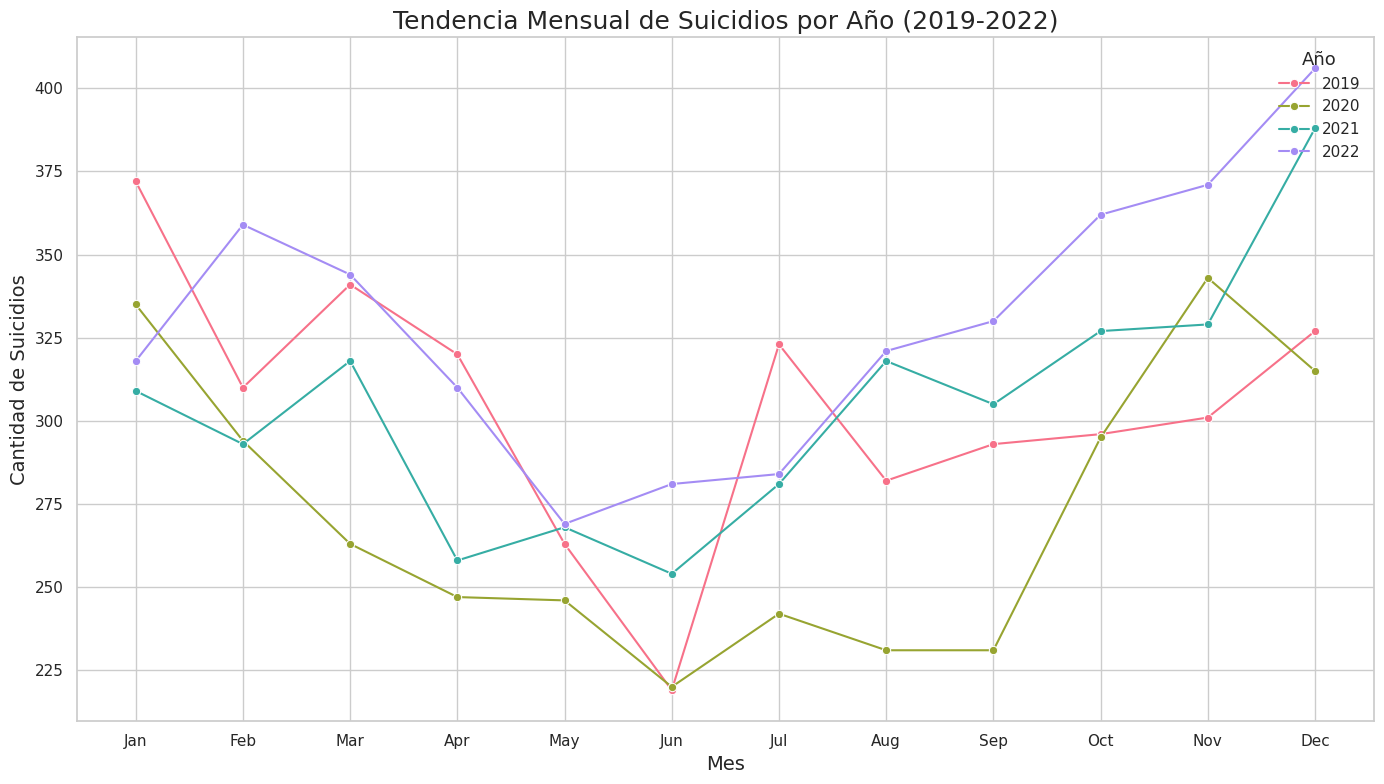

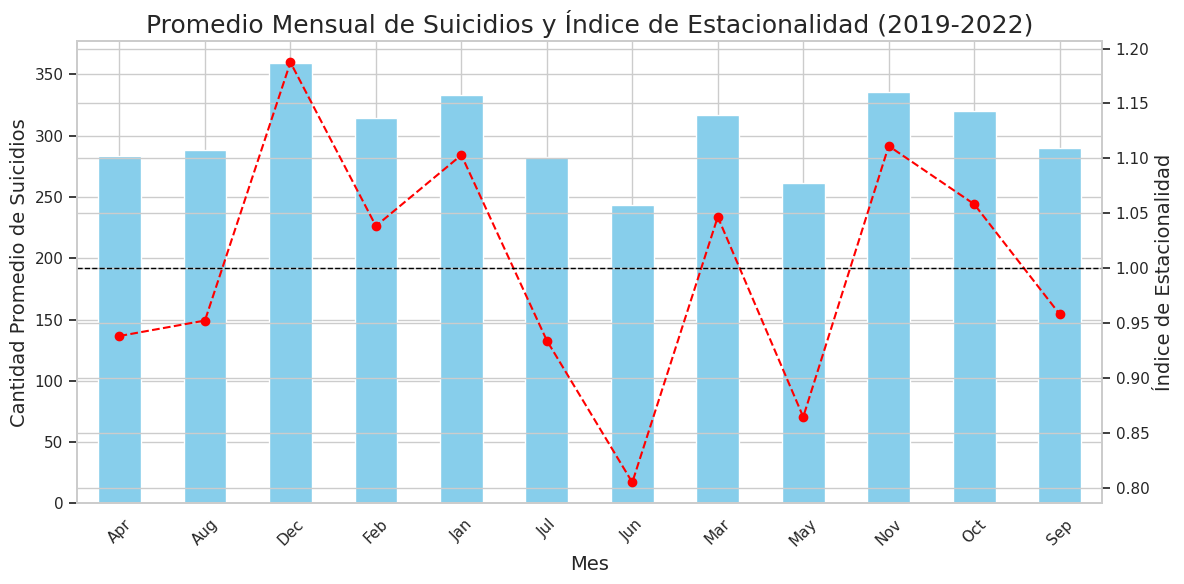

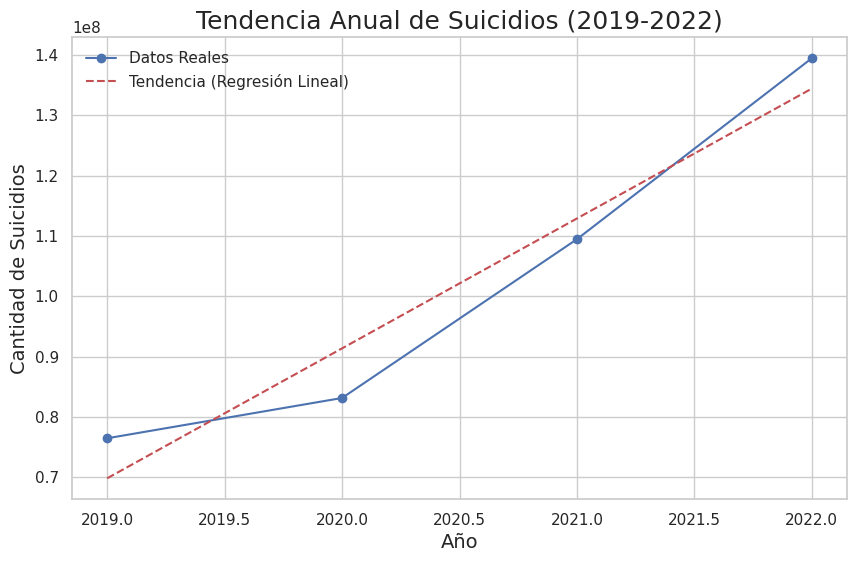

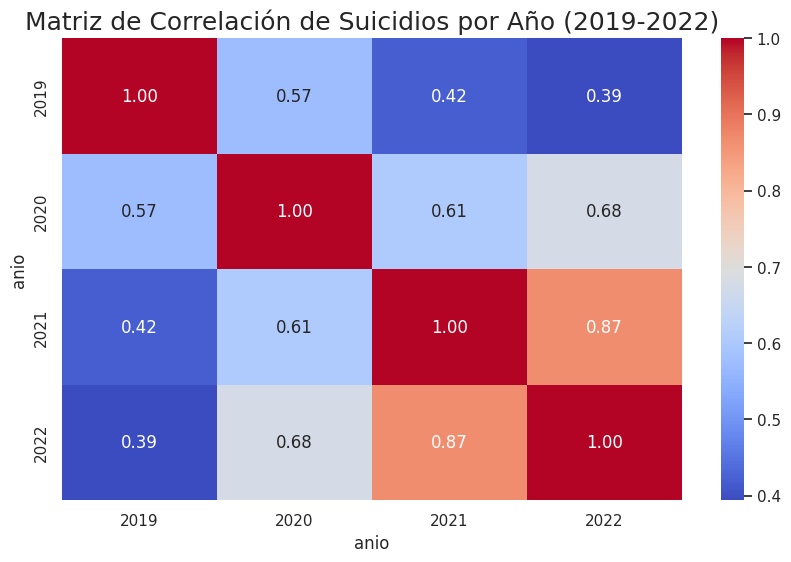

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import calendar
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar los datos para los años 2019-2022
df_filtered = df_sat_pob[df_sat_pob['anio'].between(2019, 2022)]

# Agrupar los datos por año y mes, contando la cantidad de suicidios
suicidios_por_mes = df_filtered.groupby(['anio', 'mes'])['id_hecho'].count().reset_index()

# Crear una columna para representar los meses en formato de nombre
suicidios_por_mes['mes_nombre'] = suicidios_por_mes['mes'].apply(lambda x: calendar.month_abbr[x])

# Ordenar los meses para asegurar que se muestren en el orden correcto
suicidios_por_mes['mes_num'] = suicidios_por_mes['mes']
suicidios_por_mes = suicidios_por_mes.sort_values(['anio', 'mes_num'])

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# ---------------- Gráfico de Tendencia Mensual ---------------- #
plt.figure(figsize=(14, 8))

# Aplicar una paleta de colores con un color diferente para cada año
paleta_colores = sns.color_palette("husl", n_colors=len(suicidios_por_mes['anio'].unique()))

# Graficar las líneas para cada año mostrando la tendencia mensual
sns.lineplot(data=suicidios_por_mes, x='mes_nombre', y='id_hecho', hue='anio', marker='o', palette=paleta_colores)

# Configurar títulos y etiquetas
plt.title('Tendencia Mensual de Suicidios por Año (2019-2022)', fontsize=18)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Cantidad de Suicidios', fontsize=14)

# Ajustar la leyenda para que se muestre el año correctamente
plt.legend(title='Año', title_fontsize='13', fontsize='11', loc='upper right')

# Mostrar el gráfico de tendencia mensual
plt.tight_layout()
plt.show()

# ---------------- Análisis de Estacionalidad con Índice ---------------- #
# Promedio mensual de suicidios para ver la estacionalidad
suicidios_por_mes_avg = suicidios_por_mes.groupby('mes_nombre')['id_hecho'].mean()

# Calcular el promedio total de suicidios
promedio_total = suicidios_por_mes_avg.mean()

# Calcular el índice de estacionalidad
indice_estacionalidad = suicidios_por_mes_avg / promedio_total

# Graficar el promedio mensual y el índice de estacionalidad
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar el promedio mensual
suicidios_por_mes_avg.plot(kind='bar', color='skyblue', ax=ax1)
ax1.set_title('Promedio Mensual de Suicidios y Índice de Estacionalidad (2019-2022)', fontsize=18)
ax1.set_xlabel('Mes', fontsize=14)
ax1.set_ylabel('Cantidad Promedio de Suicidios', fontsize=14)
ax1.set_xticklabels(suicidios_por_mes_avg.index, rotation=45)

# Crear un segundo eje para el índice de estacionalidad
ax2 = ax1.twinx()
ax2.plot(indice_estacionalidad.index, indice_estacionalidad.values, color='red', marker='o', linestyle='--')
ax2.set_ylabel('Índice de Estacionalidad', fontsize=14)
ax2.axhline(y=1, color='black', linestyle='--', linewidth=1)  # Línea de referencia en 1

plt.tight_layout()
plt.show()

# ---------------- Análisis de Tendencia ---------------- #
# Analizamos la tendencia utilizando la suma de suicidios por año
suicidios_por_anio = df_filtered.groupby('anio')['id_hecho'].sum().reset_index()

# Aplicamos una regresión lineal para ver la tendencia a lo largo de los años
X = suicidios_por_anio['anio'].values.reshape(-1, 1)
y = suicidios_por_anio['id_hecho'].values

# Calculamos la regresión lineal
regressor = LinearRegression()
regressor.fit(X, y)
y_pred = regressor.predict(X)

# Graficamos la tendencia
plt.figure(figsize=(10, 6))
plt.plot(suicidios_por_anio['anio'], y, marker='o', linestyle='-', color='b', label='Datos Reales')
plt.plot(suicidios_por_anio['anio'], y_pred, linestyle='--', color='r', label='Tendencia (Regresión Lineal)')
plt.title('Tendencia Anual de Suicidios (2019-2022)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Suicidios', fontsize=14)
plt.legend()
plt.show()

# ---------------- Análisis de Correlación ---------------- #
# Analizamos la correlación entre los meses a lo largo de los años

# Convertimos los datos a un formato de tabla de pivot para ver la correlación
suicidios_por_mes_pivot = suicidios_por_mes.pivot(index='mes_nombre', columns='anio', values='id_hecho')

# Calculamos la correlación entre los diferentes años
correlacion = suicidios_por_mes_pivot.corr()

# Graficamos la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Matriz de Correlación de Suicidios por Año (2019-2022)', fontsize=18)
plt.show()


En base a la visualización generada y los métodos de verificación de datos, podemos observar:

### 1. **Tendencia Mensual de Suicidios por Año (2019-2022)**
   - **Análisis**:
     - Se observa una variabilidad en los suicidios mes a mes en cada uno de los años.
     - **2019** muestra una tendencia decreciente hasta junio, seguida de un aumento hacia diciembre.
     - **2020** muestra una disminución significativa en los primeros meses, lo que coincide con el inicio de las medidas de encierro debido a la pandemia de COVID-19. A partir de julio, los suicidios se mantienen relativamente estables.
     - **2021** y **2022** presentan un patrón más errático, con picos y valles a lo largo del año, reforzando la hipótesis de la influencia entre el encierro sanitario y los suicidios.
  
### 2. **Promedio Mensual de Suicidios e Índice de Estacionalidad (2019-2022)**
   - **Índice de Estacionalidad**:
     - Este índice nos indica cuánto se desvía un mes específico del promedio general de suicidios. Un índice mayor a 1 indica que el mes tiene más suicidios de lo esperado en comparación con el promedio, mientras que un índice menor a 1 indica menos suicidios de lo esperado.
     - **Diciembre** y **Enero** son los meses con índices de estacionalidad más altos, lo que sugiere que durante estos meses hay una mayor cantidad de suicidios en comparación con el promedio mensual.
     - **Junio** y **Julio** muestran índices de estacionalidad por debajo de 1, indicando una menor cantidad de suicidios en esos meses.
     - Estos patrones pueden estar relacionados con factores estacionales o eventos sociales y culturales que afectan el bienestar emocional de las personas. No necesariamente expresan una relación entre encierro sanitario y tasa de suicidio, debido a que la estacionalidad no coincide con los meses donde el encierro fue mas intenso.

### 3. **Tendencia Anual de Suicidios (2019-2022)**
   - **Análisis**:
     - La tendencia anual de suicidios muestra un incremento continuo desde 2019 hasta 2022.
     - La **regresión lineal** aplicada indica una tendencia positiva, lo que sugiere un aumento en la cantidad de suicidios cada año.
     - Este aumento podría estar relacionado con factores de largo plazo, como el impacto económico, social y psicológico de la pandemia, aunque se necesitaría un análisis más profundo para confirmar esta hipótesis.

### 4. **Matriz de Correlación de Suicidios por Año (2019-2022)**
   - **Análisis de Correlación**:
     - La matriz de correlación muestra la relación entre los suicidios de diferentes años.
     - Las correlaciones más altas se observan entre los años 2021 y 2022 (0.87) y entre 2020 y 2021 (0.61), lo que sugiere que los patrones de suicidios en estos años están más estrechamente relacionados.
     - **2019** tiene correlaciones más bajas con los años posteriores, lo que podría indicar un cambio en los patrones de suicidio tras la pandemia.


#### **Tendencia General:**
- Antes de la pandemia (2019), los suicidios seguían un patrón más predecible, con un descenso hasta mitad de año y luego un aumento hacia diciembre.
- Durante la pandemia, especialmente en 2020, se observa un fuerte descenso en los primeros meses, lo que podría estar relacionado con la implementación de medidas de encierro. A partir de la relajación de estas medidas, se observa un aumento, posiblemente debido a la fatiga pandémica y los problemas económicos y sociales acumulados.
- En los años posteriores (2021 y 2022), aunque la tendencia anual sigue siendo ascendente, las fluctuaciones mensuales y los patrones de estacionalidad muestran que la población aún no se ha estabilizado completamente, y los efectos a largo plazo de la pandemia continúan afectando el bienestar mental.

#### **Conclusiones:**
- El aumento continuo en los suicidios anuales y la alta correlación entre 2021 y 2022 indican que las secuelas de la pandemia podrían haber exacerbado problemas preexistentes o generado nuevas tensiones que resultaron en un aumento sostenido de los suicidios. También puede indicar que la condición de encierro sanitario, al producir una merma en la cantidad de hechos registrados, puede haber tenido una influencia positiva en los grupos mas frecuentemente afectados por esta situación.
- El análisis de estacionalidad sugiere que ciertos meses (como diciembre y enero) tienen un mayor riesgo de suicidios, lo que podría ser un foco para intervenciones preventivas específicas en el futuro pero no necesariamente los relaciona con los efectos de las medidas sanitarias contra el COVID-19.
  
A continuación, nos enfocaremos en caracterizar los hechos de suicidio respecto a las regiones de nuestro país, para ver si observamos algún detalle de relevancia. Queremos destacar que si bien nuestra matriz está dividida provincialmente, por una cuestón de visualizaciones y tiempo preferimos optar reducir la variedad provincial a regiones, debido a que sería más sencillo ofrecer visualizaciones y análisis. En caso de que fuera necesario, es posible focalizar aún más estos analisis para, por ejemplo, comparar los resultados entre provincias de una misma región o entre provincias de regiones diferentes.

<ipython-input-51-cb7025761f2e>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='tasa_anual', y='region', data=tasa_promedio_anual, palette="Blues", orient='h')


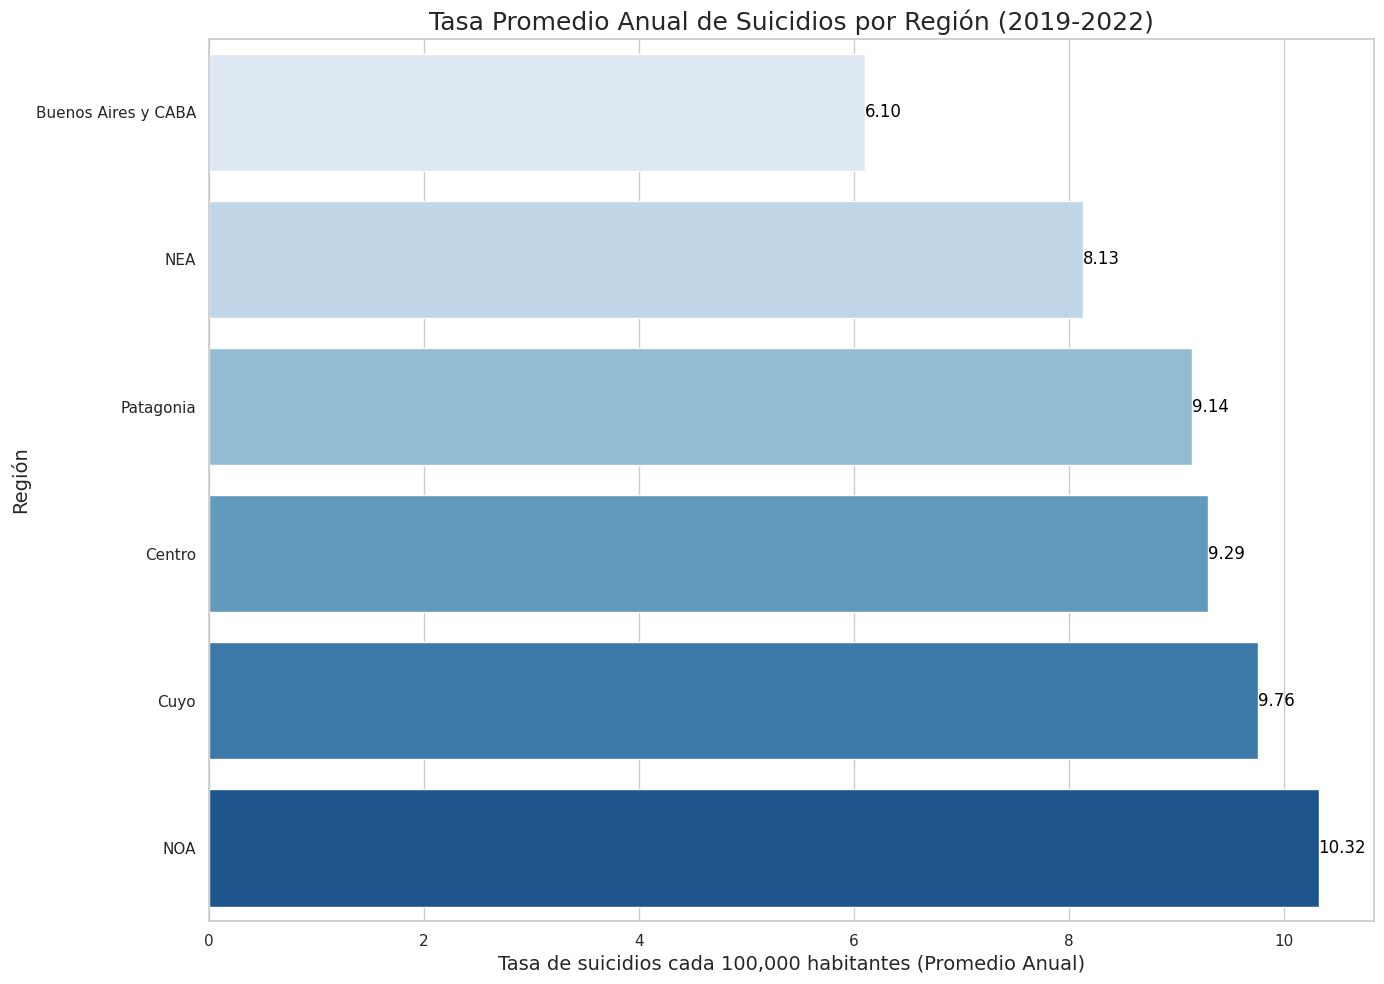

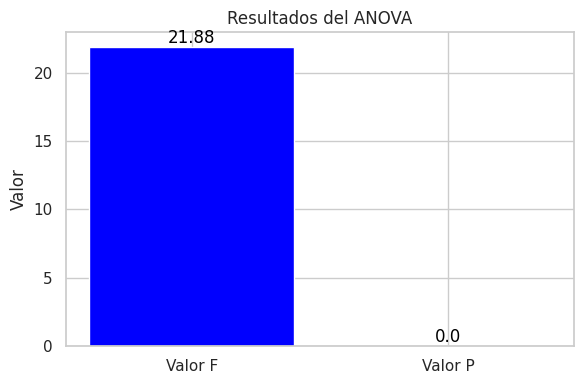

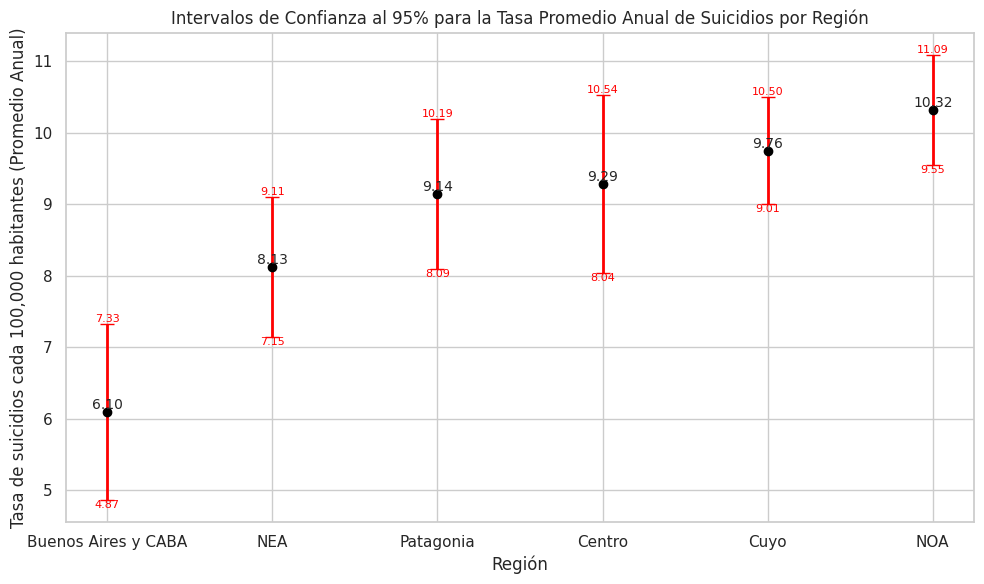

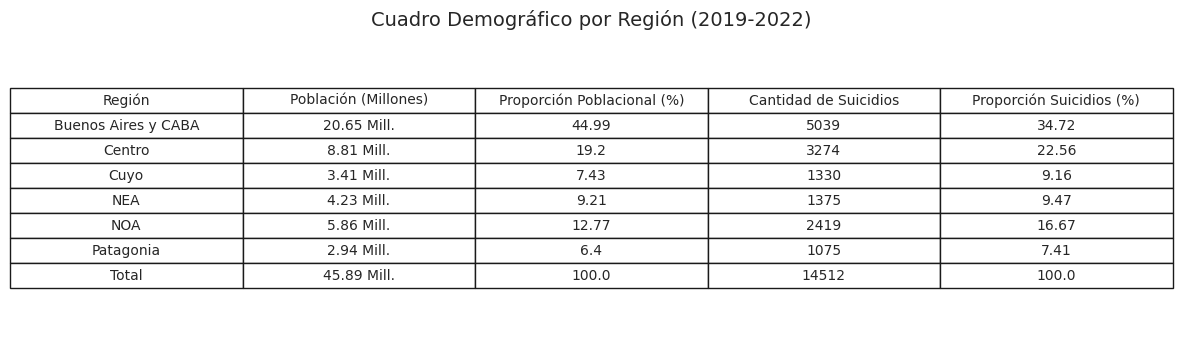

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
import numpy as np

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']
}

# Filtrar los datos entre 2019 y 2022
df_filtered = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_filtered['region'] = df_filtered['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar los datos por región y año, contando la cantidad de suicidios
suicidios_por_region_anio = df_filtered.groupby(['region', 'anio'])['id_hecho'].count().reset_index()

# Obtener la población única por provincia
poblacion_unica_por_provincia = df_filtered[['provincia_nombre_x', 'Población']].drop_duplicates()

# Asignar cada provincia a su respectiva región
poblacion_unica_por_provincia['region'] = poblacion_unica_por_provincia['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar la población total por región
poblacion_por_region = poblacion_unica_por_provincia.groupby('region')['Población'].sum().reset_index()

# Combinar la población con los datos de suicidios
suicidios_por_region_anio = suicidios_por_region_anio.merge(poblacion_por_region, on='region', how='left')

# Calcular la tasa anual de suicidios por cada 100,000 habitantes por región
suicidios_por_region_anio['tasa_anual'] = (suicidios_por_region_anio['id_hecho'] / suicidios_por_region_anio['Población']) * 100000

# Calcular la tasa promedio anual para cada región
tasa_promedio_anual = suicidios_por_region_anio.groupby('region')['tasa_anual'].mean().reset_index()

# Ordenar el DataFrame por la tasa promedio anual de suicidios de menor a mayor
tasa_promedio_anual = tasa_promedio_anual.sort_values(by='tasa_anual', ascending=True)

# ---------------- Gráfico de Tasa Promedio Anual ---------------- #
plt.figure(figsize=(14, 10))
sns.barplot(x='tasa_anual', y='region', data=tasa_promedio_anual, palette="Blues", orient='h')

# Añadir etiquetas de datos a cada barra
for index, value in enumerate(tasa_promedio_anual['tasa_anual']):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")

# Configurar los títulos y etiquetas del gráfico
plt.title('Tasa Promedio Anual de Suicidios por Región (2019-2022)', fontsize=18)
plt.xlabel('Tasa de suicidios cada 100,000 habitantes (Promedio Anual)', fontsize=14)
plt.ylabel('Región', fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# ---------------- Análisis de Varianza (ANOVA) ---------------- #
f_value, p_value = stats.f_oneway(
    *[suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
      for region in tasa_promedio_anual['region']]
)

# Crear el gráfico de ANOVA con etiquetas de datos
plt.figure(figsize=(6, 4))
bars = plt.bar(['Valor F', 'Valor P'], [f_value, p_value], color=['blue', 'orange'])

# Añadir etiquetas de datos
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=12, color='black')

plt.title('Resultados del ANOVA')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Intervalos de Confianza ---------------- #
# Calcular el intervalo de confianza para cada región
intervalos_confianza = {}
for region in tasa_promedio_anual['region']:
    region_data = suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
    ci = sms.DescrStatsW(region_data).tconfint_mean()
    intervalos_confianza[region] = ci

# Extraer la información necesaria para el gráfico
regiones = list(intervalos_confianza.keys())
promedios = tasa_promedio_anual['tasa_anual'].values
errores = [(promedios[i] - intervalos_confianza[regiones[i]][0],
            intervalos_confianza[regiones[i]][1] - promedios[i])
           for i in range(len(regiones))]

# Convertir los errores en valores absolutos para evitar errores negativos
errores_inferiores, errores_superiores = np.abs(np.array(errores).T)

# Graficar los intervalos de confianza
plt.figure(figsize=(10, 6))
plt.errorbar(regiones, promedios, yerr=[errores_inferiores, errores_superiores], fmt='o', color='black',
             ecolor='red', elinewidth=2, capsize=5)

# Añadir etiquetas de los valores promedio y de los intervalos de confianza
for i, (mean, lower, upper) in enumerate(zip(promedios, errores_inferiores, errores_superiores)):
    plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, mean + upper, f'{mean + upper:.2f}', ha='center', va='bottom', fontsize=8, color='red')
    plt.text(i, mean - lower, f'{mean - lower:.2f}', ha='center', va='top', fontsize=8, color='red')

plt.title('Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región')
plt.xlabel('Región')
plt.ylabel('Tasa de suicidios cada 100,000 habitantes (Promedio Anual)')
plt.tight_layout()
plt.show()

# ---------------- Cuadro Demográfico ---------------- #
# Crear el cuadro demográfico y mostrarlo en una tabla
plt.figure(figsize=(10, 4))
plt.axis('off')
tbl = plt.table(cellText=datos_demograficos[['region', 'Población (Millones)', 'Proporción Poblacional (%)', 'id_hecho', 'Proporción Suicidios (%)']].values,
                colLabels=['Región', 'Población (Millones)', 'Proporción Poblacional (%)', 'Cantidad de Suicidios', 'Proporción Suicidios (%)'],
                cellLoc='center', loc='center')

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1.5, 1.5)  # Ajusta el tamaño de la tabla

plt.title('Cuadro Demográfico por Región (2019-2022)', fontsize=14)
plt.show()


La visualizaciónes resultantes muestra la tasa promedio anual de suicidios por cada 100,000 habitantes entre 2019 y 2022, distribuida por regiones de Argentina. Un análisis detallado, considerando tanto la tasa como la población de cada región, nos revela lo siguiente:

1. **Tasa Promedio Anual de Suicidios por Región (2019-2022)**:
   - **NOA (Noroeste Argentino)**: Presenta la tasa de suicidios más alta con 10.32 por cada 100,000 habitantes. Su población es de 5.86 millones (12.77% del total). A pesar de su menor población en comparación con Buenos Aires y CABA, el NOA muestra una tasa de suicidios significativamente alta. Esto podría estar relacionado con factores socioeconómicos, culturales, y el limitado acceso a servicios de salud mental en la región. La elevada tasa de suicidios en el NOA podría indicar la necesidad de intervenciones específicas adaptadas a las particularidades de la región.
   - **Cuyo**: Con una tasa de 9.76 suicidios por cada 100,000 habitantes y una población de 3.41 millones (7.43% del total), sigue al NOA en términos de incidencia. La combinación de una población menor y una alta tasa de suicidios sugiere un problema significativo en la región, que podría ser resultado combinado de diversos factores sociales y económicos.
   - **Centro**: La tasa de suicidios es de 9.29 por cada 100,000 habitantes, con una población de 8.81 millones (19.20% del total). Esta región muestra una tasa de suicidios moderadamente alta y una considerable población. El equilibrio entre densidad poblacional e incidencia de suicidios podría indicar que la problemática es generalizada y no se limita a regiones menos pobladas.
   - **Patagonia**: A pesar de tener la población más baja (2.94 millones, 6.40% del total), Patagonia muestra una tasa de suicidios alta de 9.14 por cada 100,000 habitantes. Esto podría estar relacionado con el aislamiento geográfico, las condiciones climáticas extremas, o problemas económicos específicos de la región. Resulta necesario complementar con otro tipo de estudios para corroborar que otros factores pueden estar influyendo en los hechos de suicidio de esta región.
   - **NEA (Noreste Argentino)**: Muestra una tasa de suicidios de 8.13 por cada 100,000 habitantes, con una población de 4.23 millones (9.21% del total). Aunque tiene una tasa de suicidios más baja que las regiones mencionadas anteriormente, sigue siendo considerable.
   - **Buenos Aires y CABA**: Presenta la tasa de suicidios más baja con 6.10 por cada 100,000 habitantes, a pesar de tener la mayor población con 20.65 millones (44.99% del total). Esto podría ser un indicador de mejores accesos a servicios de salud mental, mayor urbanización y recursos económicos en comparación con otras regiones del país, como puede resultar ante una observación de sentido común.

   La visualización resalta las diferencias en la tasa de suicidios entre regiones, que no siempre corresponden con el tamaño de la población. Las regiones con menor población, como NOA, Cuyo y Patagonia, tienen tasas más altas de suicidio, lo que sugiere que hay factores locales específicos que influyen en estos resultados. Por otro lado, Buenos Aires y CABA, con la mayor concentración poblacional, muestran la tasa de suicidios más baja, lo que puede indicar un mejor acceso a recursos preventivos y de apoyo.

2. **Resultados del Analisis de Varianza**:
   - El análisis de varianza muestra un valor F de 21.88 y un valor P de 0.0, lo que indica que existen diferencias estadísticamente significativas en las tasas de suicidio entre las distintas regiones. Esto confirma la hipótesis de que el contexto regional influye significativamente en la incidencia de suicidios, y sugiere que las hipotéticas políticas de prevención deben ser adaptadas a las características específicas de cada región para ser efectivas.

3. **Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región**:
   - Los intervalos de confianza refuerzan los hallazgos previos, mostrando que el NOA tiene un rango de tasa de suicidios entre 9.55 y 11.09, confirmando su posición como la región con mayor incidencia. Cuyo y Centro también muestran intervalos altos, indicando desafíos significativos en estas regiones.
   - En contraste, Buenos Aires y CABA tienen un intervalo más bajo (4.87 a 7.33), lo que está en línea con su menor tasa de suicidios.

4. **Cuadro Demográfico por Región (2019-2022)**:
   - El cuadro demográfico revela que Buenos Aires y CABA, con el 44.99% de la población total, concentran el 34.72% de los suicidios. Aunque significativo, este porcentaje está por debajo de lo esperado dado su tamaño poblacional, lo que podría ser reflejo de un mejor acceso a servicios de salud mental y recursos preventivos.
   - En contraste, el NOA, con solo el 12.77% de la población, concentra el 16.67% de los suicidios, lo que subraya el desproporcionado impacto del suicidio en esta región.
   - Las regiones con menor población, como Patagonia y Cuyo, también muestran tasas de suicidio más altas en comparación con su proporción poblacional, sugiriendo factores regionales específicos que agravan la incidencia de suicidios en estas áreas.

**Conclusión**:
Las visualizaciones y el análisis estadístico revelan que el suicidio en Argentina presenta una fuerte variación regional, con el NOA emergiendo como la región más afectada. Buenos Aires y CABA, aunque concentran la mayor parte de la población, tienen una incidencia de suicidios relativamente baja, lo que podría ser indicativo de mejores recursos de salud y prevención. La significancia estadística de las diferencias regionales, demostrada por el analisis de varianza, sugiere que las políticas de prevención del suicidio deben adaptarse a las características específicas de cada región para ser efectivas. Además, los factores locales específicos, como los socioeconómicos, culturales y el acceso a servicios, parecen jugar un papel crucial en la incidencia del suicidio en cada región.

Si bien este es un panorama general, consideramos importante realizar un analisis temporal que contemple la variación de las tasas año a año según cada región, para ver si se observan algún hallazgo significativo que podamos utilizar para validar o refutar nuestra hipótesis.

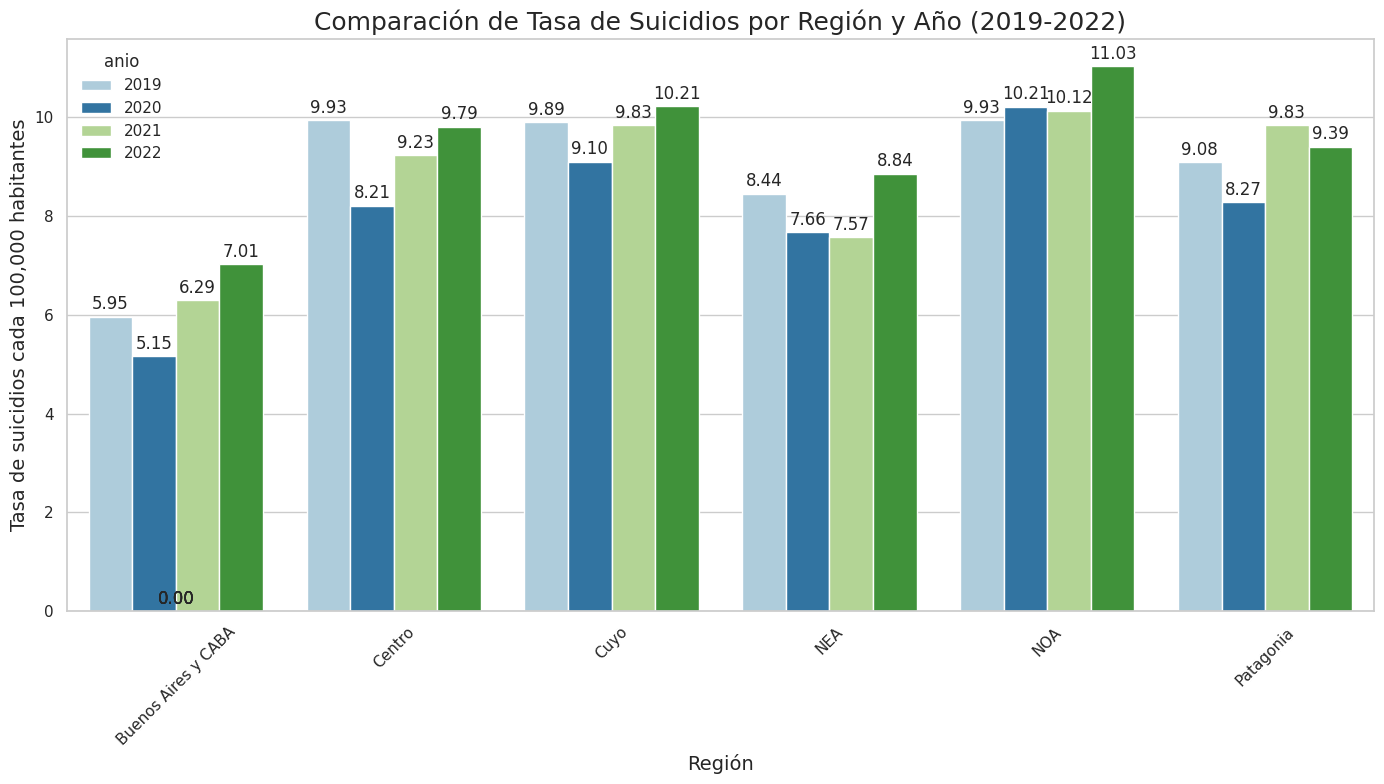

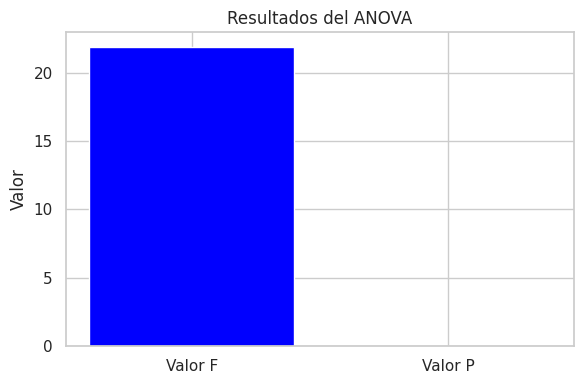

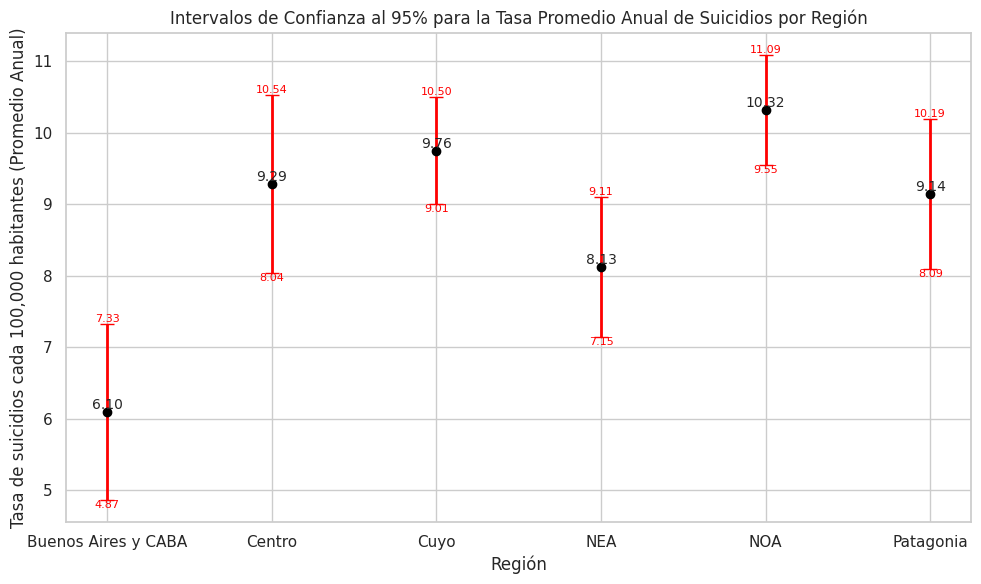

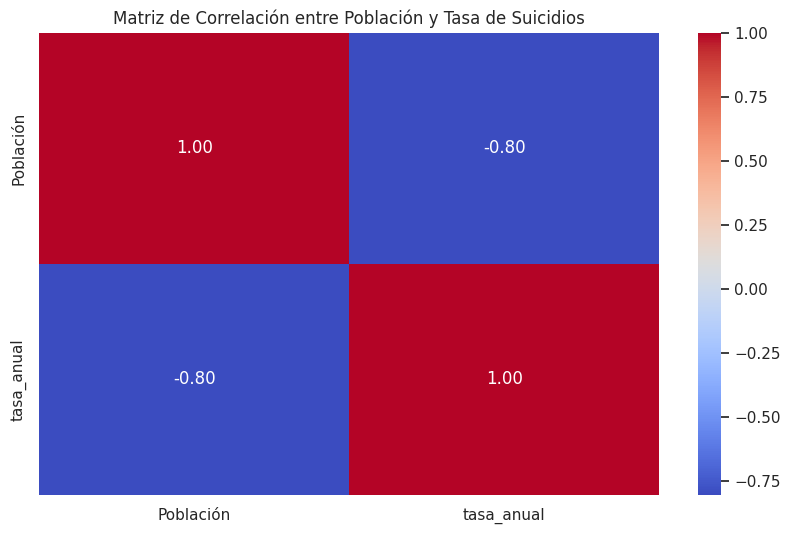

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
import numpy as np

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']
}

# Filtrar los datos entre 2019 y 2022
df_filtered = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_filtered['region'] = df_filtered['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar los datos por región y año, contando la cantidad de suicidios
suicidios_por_region_anio = df_filtered.groupby(['region', 'anio'])['id_hecho'].count().reset_index()

# Obtener la población única por provincia
poblacion_unica_por_provincia = df_filtered[['provincia_nombre_x', 'Población']].drop_duplicates()

# Asignar cada provincia a su respectiva región
poblacion_unica_por_provincia['region'] = poblacion_unica_por_provincia['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Agrupar la población total por región
poblacion_por_region = poblacion_unica_por_provincia.groupby('region')['Población'].sum().reset_index()

# Combinar la población con los datos de suicidios
suicidios_por_region_anio = suicidios_por_region_anio.merge(poblacion_por_region, on='region', how='left')

# Calcular la tasa anual de suicidios por cada 100,000 habitantes por región
suicidios_por_region_anio['tasa_anual'] = (suicidios_por_region_anio['id_hecho'] / suicidios_por_region_anio['Población']) * 100000

# ---------------- Gráfico de Comparación de Tasa de Suicidios ---------------- #
plt.figure(figsize=(14, 8))
sns.barplot(x='region', y='tasa_anual', hue='anio', data=suicidios_por_region_anio, palette="Paired")

# Añadir etiquetas de datos a cada barra
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.2f'),
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center',
                       xytext=(0, 9),
                       textcoords='offset points')

# Configurar los títulos y etiquetas del gráfico
plt.title('Comparación de Tasa de Suicidios por Región y Año (2019-2022)', fontsize=18)
plt.xlabel('Región', fontsize=14)
plt.ylabel('Tasa de suicidios cada 100,000 habitantes', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# ---------------- Análisis de Varianza (ANOVA) ---------------- #
# Aplicar ANOVA unidireccional
f_value, p_value = stats.f_oneway(
    *[suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
      for region in suicidios_por_region_anio['region'].unique()]
)

# Gráfico de resultados del ANOVA
plt.figure(figsize=(6, 4))
plt.bar(['Valor F', 'Valor P'], [f_value, p_value], color=['blue', 'orange'])
plt.title('Resultados del ANOVA')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Intervalos de Confianza ---------------- #
# Calcular el intervalo de confianza para cada región
intervalos_confianza = {}
for region in suicidios_por_region_anio['region'].unique():
    region_data = suicidios_por_region_anio.loc[suicidios_por_region_anio['region'] == region, 'tasa_anual']
    ci = sms.DescrStatsW(region_data).tconfint_mean()
    intervalos_confianza[region] = ci

# Extraer la información necesaria para el gráfico
regiones = list(intervalos_confianza.keys())
promedios = suicidios_por_region_anio.groupby('region')['tasa_anual'].mean().values
errores = [(promedios[i] - intervalos_confianza[regiones[i]][0],
            intervalos_confianza[regiones[i]][1] - promedios[i])
           for i in range(len(regiones))]

# Convertir los errores en valores absolutos para evitar errores negativos
errores_inferiores, errores_superiores = np.abs(np.array(errores).T)

# Graficar los intervalos de confianza
plt.figure(figsize=(10, 6))
plt.errorbar(regiones, promedios, yerr=[errores_inferiores, errores_superiores], fmt='o', color='black',
             ecolor='red', elinewidth=2, capsize=5)

# Añadir etiquetas de los valores promedio y de los intervalos de confianza
for i, (mean, lower, upper) in enumerate(zip(promedios, errores_inferiores, errores_superiores)):
    plt.text(i, mean, f'{mean:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, mean + upper, f'{mean + upper:.2f}', ha='center', va='bottom', fontsize=8, color='red')
    plt.text(i, mean - lower, f'{mean - lower:.2f}', ha='center', va='top', fontsize=8, color='red')

plt.title('Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región')
plt.xlabel('Región')
plt.ylabel('Tasa de suicidios cada 100,000 habitantes (Promedio Anual)')
plt.tight_layout()
plt.show()

# ---------------- Análisis de Correlación ---------------- #
# Correlación entre población y tasa de suicidios
poblacion_vs_suicidios = suicidios_por_region_anio.groupby('region').agg({
    'Población': 'mean',
    'tasa_anual': 'mean'
}).reset_index()

# Calcular la correlación
correlacion = poblacion_vs_suicidios[['Población', 'tasa_anual']].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Matriz de Correlación entre Población y Tasa de Suicidios')
plt.show()


Respecto a estas visualizaciones y sus analisis estadísticos, podemos observar:

1. **Comparación de Tasa de Suicidios por Región y Año (2019-2022)**:
   - Esta visualización permite observar variaciones anuales en las tasas de suicidio en las diferentes regiones, destacando cómo factores contextuales, como la pandemia de COVID-19, pueden haber influido en estas cifras. Por ejemplo, Buenos Aires y CABA muestran una notable disminución en 2020, donde la tasa registrada es de 5.19 suicidios por cada 100,000 habitantes. Ello refleja una disminución de 0.80 respecto al año anterior.
   - En contraste, regiones como el NOA, Centro y Cuyo presentan una relativa estabilidad en sus tasas de suicidio a lo largo de los años, aunque con ligeras fluctuaciones que podrían estar asociadas a variaciones económicas o políticas locales. Por ejemplo, el NOA muestra un preocupante incremento en la tasa de suicidios en 2022, alcanzando 11.03 suicidios por cada 100,000 habitantes, lo que podría sugerir un deterioro en las condiciones socioeconómicas o un aumento en factores de riesgo como el desempleo, la pobreza, o la falta de acceso a servicios de salud mental adecuados.
   - Es interesante notar que, mientras algunas regiones muestran una tendencia relativamente constante, otras, como Patagonia, evidencian un comportamiento más errático. Esto sugiere que los factores que influyen en las tasas de suicidio pueden ser más volátiles en ciertas regiones, posiblemente debido a cambios rápidos en las condiciones económicas o sociales, como la migración interna, la fluctuación de las industrias locales (por ejemplo, minería o agricultura), o cambios en la cohesión comunitaria. Quedaría complementar este análisis con otros que hagan mayor foco en estos factores.

2. **Resultados de la varianza**:
   - El análisis de varianza confirma que las diferencias en las tasas de suicidio entre las distintas regiones no son meramente producto del azar, sino que son estadísticamente significativas. Con un valor F de 21.88 y un valor P de 0.0, sugiere que las diferencias regionales en las tasas de suicidio están impulsadas por factores estructurales y contextuales específicos de cada región.
   - Este hallazgo es crucial, ya que justifica la necesidad de políticas de prevención del suicidio que sean sensibles a las características regionales. Por ejemplo, en regiones como el NOA o Cuyo, donde las tasas son consistentemente altas, las estrategias podrían enfocarse en mejorar el acceso a servicios de salud mental y apoyo social, así como en abordar los factores socioeconómicos subyacentes, como la pobreza y la marginalización.
   - En cambio, en Buenos Aires y CABA, donde las tasas son relativamente bajas, las políticas podrían centrarse en mantener y fortalecer las redes de apoyo existentes, asegurando que se llegue a las poblaciones vulnerables que podrían estar menos visibles en un entorno urbano denso.

3. **Intervalos de Confianza al 95% para la Tasa Promedio Anual de Suicidios por Región**:
   - Los intervalos de confianza proporcionan una medida de la precisión de las estimaciones de las tasas de suicidio. En el caso del NOA, el intervalo de confianza se extiende desde 9.55 hasta 11.09, indicando una variabilidad considerable, pero también confirmando que esta región consistentemente tiene las tasas más altas en comparación con otras.
   - La amplia dispersión en los intervalos de confianza de regiones como NOA y Cuyo podría reflejar no solo la consistencia de las tasas elevadas, sino también la inestabilidad en los factores de riesgo asociados. Por ejemplo, eventos económicos o sociales puntuales podrían tener un impacto significativo en las tasas de suicidio en estas áreas, lo que se refleja en la amplitud del intervalo de confianza.
   - Por otro lado, Buenos Aires y CABA, con un intervalo de confianza más estrecho (4.87 a 7.33), sugieren una mayor estabilidad en sus tasas de suicidio. Esto podría ser indicativo de una mayor homogeneidad en los factores de protección y de riesgo dentro de esta región, tales como un mejor acceso a servicios de salud mental y una infraestructura más robusta para el apoyo comunitario.

4. **Matriz de Correlación entre Población y Tasa de Suicidios**:
   - La matriz de correlación revela una fuerte correlación negativa (-0.80) entre la población de una región y su tasa de suicidios. Este hallazgo es particularmente relevante, ya que sugiere que las regiones más pobladas tienden a tener tasas de suicidio más bajas. Esto podría estar relacionado con varios factores. Por un lado, las regiones más pobladas como Buenos Aires y CABA suelen tener mejor acceso a servicios de salud, incluidos los servicios de salud mental, lo que podría contribuir a una menor tasa de suicidios.
   - Además, las regiones más densamente pobladas tienden a ofrecer una mayor variedad de oportunidades económicas, educativas y sociales, lo que podría reducir los factores de riesgo asociados al suicidio. El acceso a redes de apoyo, tanto formales como informales, también suele ser mayor en áreas urbanas, lo que puede desempeñar un papel crucial en la prevención del suicidio.
   - Sin embargo, esta correlación negativa también destaca la vulnerabilidad de las regiones menos pobladas, como el NOA y Patagonia, donde las tasas de suicidio son significativamente más altas. Estas áreas pueden estar más aisladas geográficamente y carecer de los recursos necesarios para abordar de manera efectiva los problemas de salud mental, lo que subraya la necesidad de intervenciones específicas y adaptadas a las necesidades locales.

**Conclusión**:
El análisis detallado de estas visualizaciones pone de relieve la complejidad de la problemática del suicidio en Argentina y cómo esta varía significativamente entre regiones. El NOA emerge como la región más afectada, lo que puede reflejar una combinación de factores socioeconómicos, culturales y de acceso limitado a servicios de salud mental. La fuerte correlación negativa entre la población y la tasa de suicidios sugiere que las regiones más densamente pobladas tienen mejores mecanismos de protección contra el suicidio, posiblemente debido a una mayor disponibilidad de recursos y redes de apoyo.

Las diferencias significativas identificadas por la varianza refuerzan la necesidad de políticas de prevención del suicidio que estén adaptadas a las particularidades de cada región. Esto puede incluir mejorar el acceso a servicios de salud mental en regiones menos pobladas, así como abordar los factores socioeconómicos y culturales que pueden estar contribuyendo a las altas tasas de suicidio en áreas como el NOA y Patagonia. En regiones como Buenos Aires y CABA, los esfuerzos deberían centrarse en mantener y fortalecer las infraestructuras de apoyo existentes para seguir reduciendo las tasas de suicidio.

A continuación, procederemos a caracterizar a la población suicida respecto a su sexo y su edad, para ver si podemos observar algún rasgo caracteristico que podamos sumar a nuestros hallazgos.

<ipython-input-26-413c3001110c>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='suicida_sexo', y='cantidad_suicidios', data=suicidios_por_sexo, palette=colors, ax=ax)


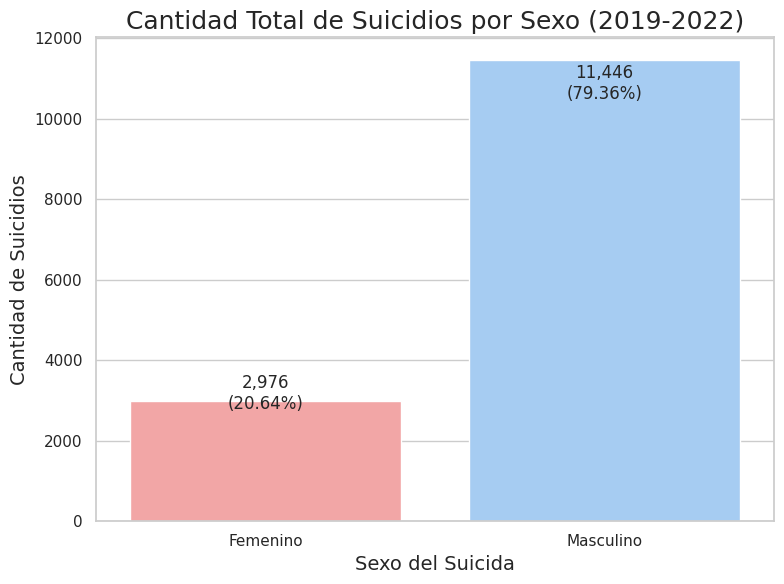

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar el DataFrame para solo incluir los años 2019, 2020, 2021 y 2022 y agrupar por sexo
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por sexo y sumar la cantidad de suicidios
suicidios_por_sexo = df_filtered.groupby('suicida_sexo').size().reset_index(name='cantidad_suicidios')

# Si hay categorías no definidas (e.g., 'Desconocido'), podríamos querer filtrarlas
suicidios_por_sexo = suicidios_por_sexo[suicidios_por_sexo['suicida_sexo'].isin(['Femenino', 'Masculino'])]

# Calcular el total de suicidios para calcular el porcentaje
total_suicidios = suicidios_por_sexo['cantidad_suicidios'].sum()

# Crear el gráfico de barras con colores pastel
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#ff9999', '#99ccff']  # Rosa pastel para mujeres, celeste pastel para varones
sns.barplot(x='suicida_sexo', y='cantidad_suicidios', data=suicidios_por_sexo, palette=colors, ax=ax)

# Añadir etiquetas de datos en cada barra con cantidad y porcentaje
for p in ax.patches:
    height = p.get_height()
    percentage = height / total_suicidios * 100
    # Ajuste en la posición de las etiquetas
    ax.annotate(f'{int(height):,}\n({percentage:.2f}%)',
                (p.get_x() + p.get_width() / 2., height * 0.95 if height > 10000 else height + 200),
                ha='center', va='center',
                fontsize=12)

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Cantidad Total de Suicidios por Sexo (2019-2022)', fontsize=18)
ax.set_xlabel('Sexo del Suicida', fontsize=14)
ax.set_ylabel('Cantidad de Suicidios', fontsize=14)

plt.tight_layout()  # Ajustar el layout para evitar superposiciones
plt.show()

Esta visualizaciones presenta la distribución total de suicidios por sexo en Argentina entre los años 2019 y 2022. El gráfico muestra una clara disparidad entre los géneros, con un predominio marcado de suicidios masculinos en comparación con los femeninos.

1. **Desigualdad de Género en la Incidencia de Suicidios**:
   - Los datos revelan que el 79.36% de los suicidios fueron cometidos por hombres, lo que equivale a 11,446 casos, mientras que el 20.64% fueron cometidos por mujeres, con un total de 2,976 casos. Esto puede estar relacionado con varios factores culturales y sociales.

2. **Necesidad de Intervenciones Específicas de Género**:
   - En principio, la visualización señala que puede existir la necesidad de implementar intervenciones en salud mental que estén adaptadas a las necesidades específicas de género.

**Conclusión**:
La visualización de la cantidad total de suicidios por sexo en Argentina entre 2019 y 2022 revela una disparidad significativa entre hombres y mujeres, con una incidencia mucho mayor entre los hombres. Este fenómeno, que es consistente con las tendencias globales, destaca la necesidad de enfoques de prevención del suicidio que estén adaptados a las diferencias de género. Es crucial abordar los factores de riesgo específicos que afectan a hombres y mujeres y promover políticas que desafíen las normas de género perjudiciales, fomenten la salud mental y apoyen a las personas en riesgo.

Para profundizar este análisis y complementar nuestra hipótesis, procederemos a desagregar dicho total de suicidio según sexo además por año. De esta manera, buscamos visualizar si durante los periodos de encierro hubo alguna variación o si los datos se mantienen sin cambios significativos.

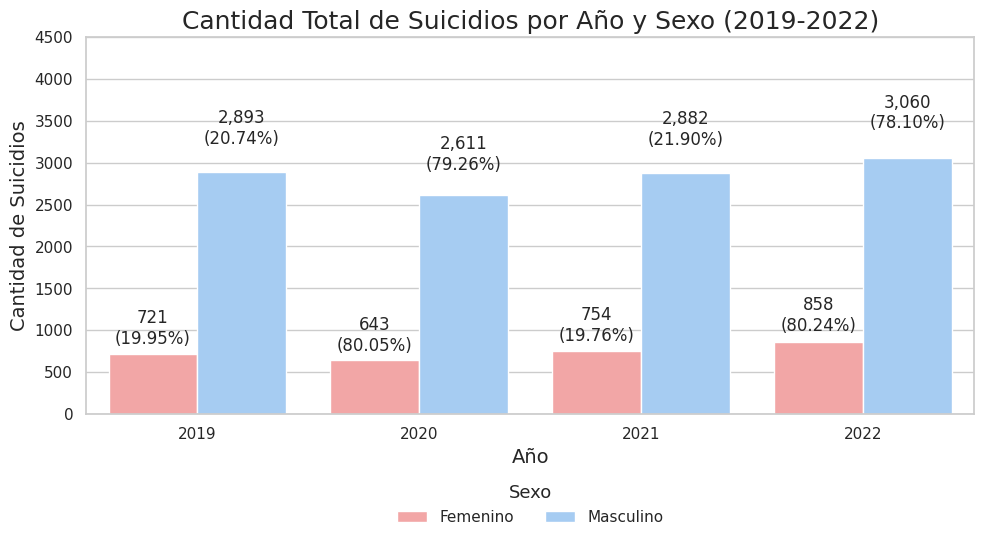

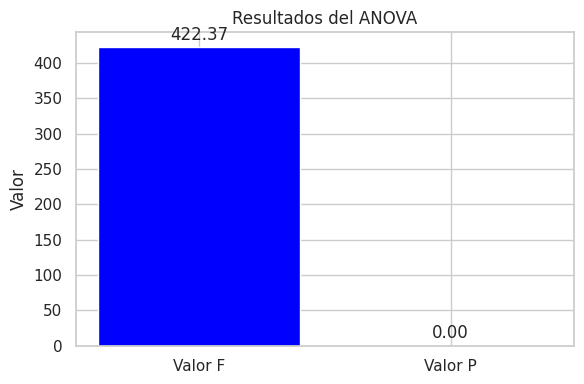

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/weightstats.py:228: RuntimeWarning: invalid value encountered in scalar divide
  return std / np.sqrt(self.sum_weights - 1)
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


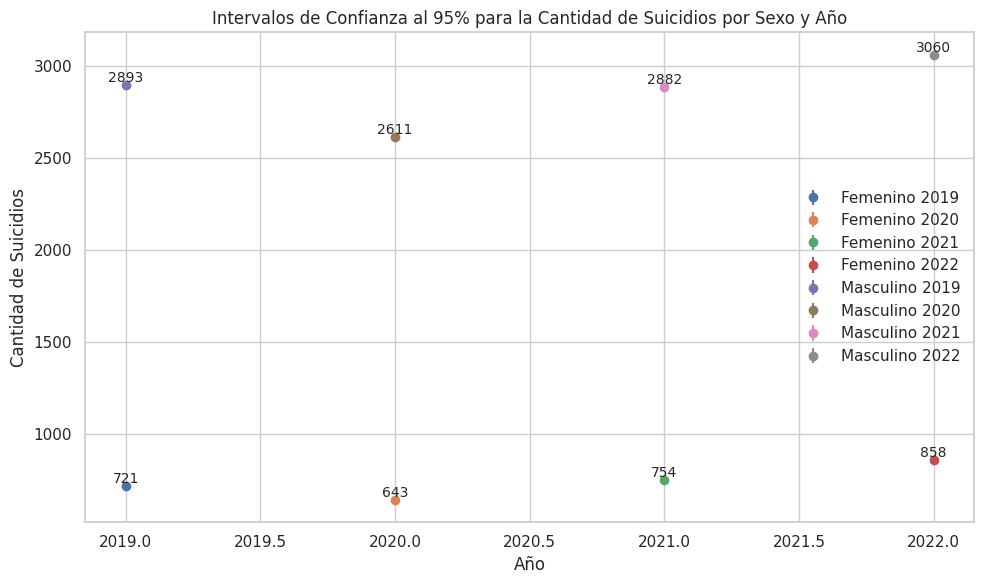

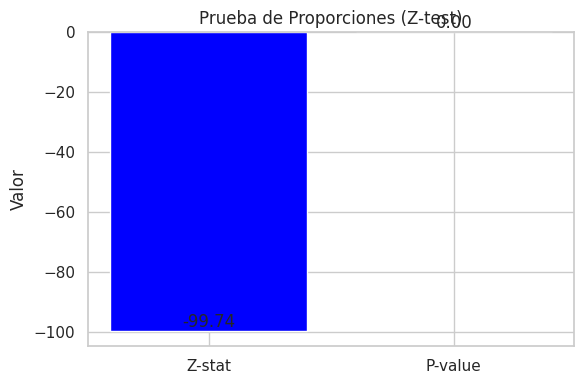

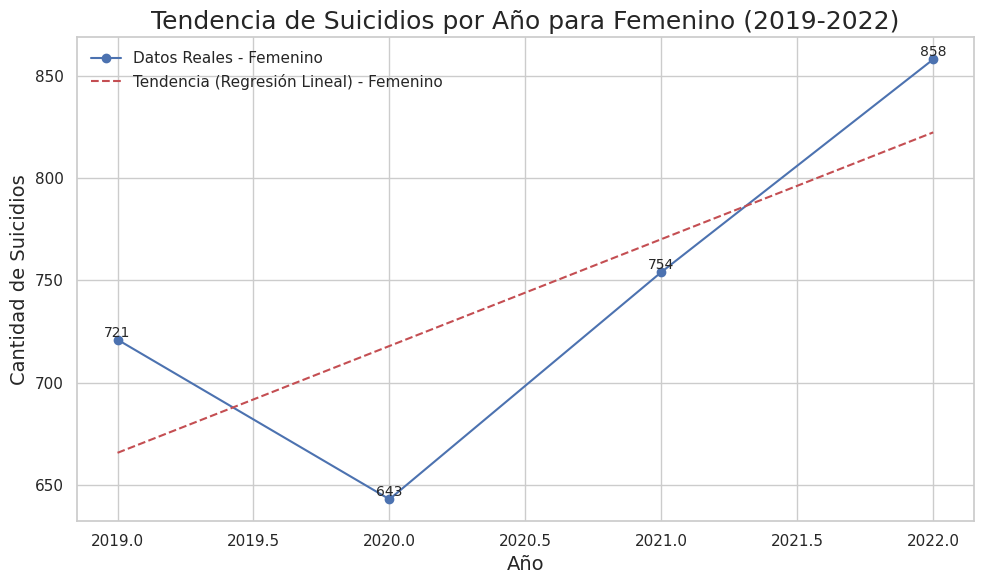

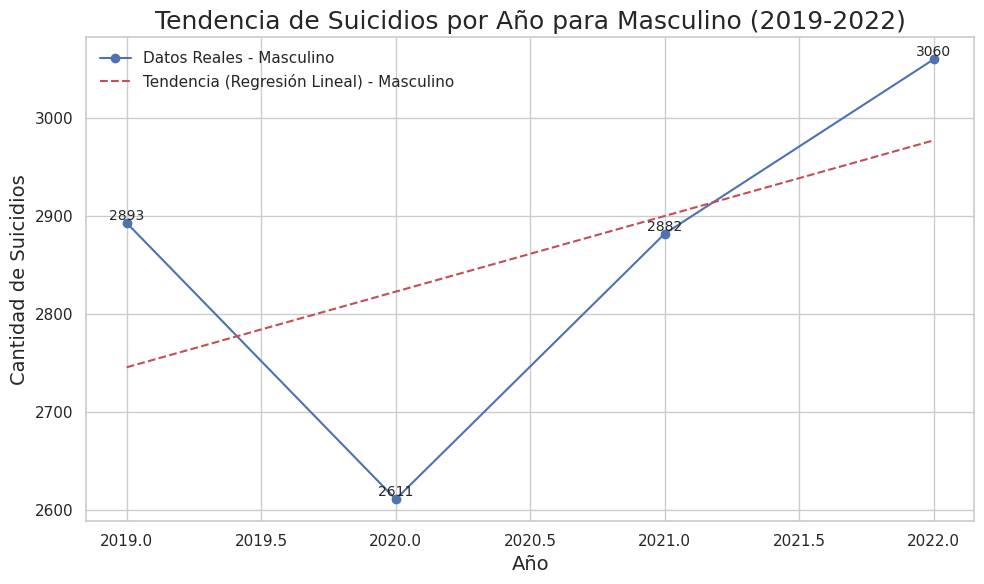

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar el DataFrame para solo incluir los años 2019, 2020, 2021 y 2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por año y sexo y sumar la cantidad de suicidios
suicidios_por_anio_sexo = df_filtered.groupby(['anio', 'suicida_sexo']).size().reset_index(name='cantidad_suicidios')

# Si hay categorías no definidas (e.g., 'Desconocido'), podríamos querer filtrarlas
suicidios_por_anio_sexo = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'].isin(['Femenino', 'Masculino'])]

# Calcular el total de suicidios por año para calcular los porcentajes
suicidios_por_anio_sexo['total_suicidios'] = suicidios_por_anio_sexo.groupby('anio')['cantidad_suicidios'].transform('sum')
suicidios_por_anio_sexo['porcentaje'] = (suicidios_por_anio_sexo['cantidad_suicidios'] / suicidios_por_anio_sexo['total_suicidios']) * 100

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='anio', y='cantidad_suicidios', hue='suicida_sexo', data=suicidios_por_anio_sexo, palette=['#ff9999', '#99ccff'], ax=ax)

# Ajustar el rango del eje vertical
ax.set_ylim(0, 4500)

# Añadir etiquetas de datos en cada barra con el porcentaje
for i, p in enumerate(ax.patches):
    # Obtener la cantidad y el porcentaje correspondiente
    cantidad = int(p.get_height())
    if cantidad > 0:
        porcentaje = suicidios_por_anio_sexo.iloc[i]['porcentaje']
        # Ajustar la posición vertical para evitar superposición
        ax.annotate(f'{cantidad:,}\n({porcentaje:.2f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height() + (p.get_height() * 0.1)),  # Ajuste de la posición vertical
                    ha='center', va='bottom',
                    fontsize=12)

# Configurar los títulos y etiquetas del gráfico
ax.set_title('Cantidad Total de Suicidios por Año y Sexo (2019-2022)', fontsize=18)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Suicidios', fontsize=14)

# Mover la leyenda fuera del área del gráfico, debajo de la gráfica
ax.legend(title='Sexo', title_fontsize='13', fontsize='11', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para evitar superposiciones
plt.show()

# ---------------- Análisis de Varianza (ANOVA) ---------------- #
# Aplicar ANOVA unidireccional para comparar las medias de suicidios por año y sexo
f_value, p_value = stats.f_oneway(
    *[suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo]['cantidad_suicidios'].values
      for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique()]
)

plt.figure(figsize=(6, 4))
plt.bar(['Valor F', 'Valor P'], [f_value, p_value], color=['blue', 'orange'])

# Añadir etiquetas a las barras
for i, v in enumerate([f_value, p_value]):
    plt.text(i, v + 5, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Resultados del ANOVA')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Intervalos de Confianza ---------------- #
# Calcular los intervalos de confianza para cada grupo de sexo por año
intervalos_confianza = {}
for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique():
    for anio in suicidios_por_anio_sexo['anio'].unique():
        data = suicidios_por_anio_sexo[(suicidios_por_anio_sexo['suicida_sexo'] == sexo) & (suicidios_por_anio_sexo['anio'] == anio)]['cantidad_suicidios']
        if len(data) > 0:
            ci = sms.DescrStatsW(data).tconfint_mean()
            intervalos_confianza[(sexo, anio)] = ci

# Graficar los intervalos de confianza
plt.figure(figsize=(10, 6))
for (sexo, anio), ci in intervalos_confianza.items():
    data_mean = suicidios_por_anio_sexo[(suicidios_por_anio_sexo['suicida_sexo'] == sexo) & (suicidios_por_anio_sexo['anio'] == anio)]['cantidad_suicidios'].mean()
    plt.errorbar(anio, data_mean, yerr=[[data_mean - ci[0]], [ci[1] - data_mean]], fmt='o', label=f'{sexo} {anio}')

# Añadir etiquetas de datos para cada punto
for (sexo, anio), ci in intervalos_confianza.items():
    data_mean = suicidios_por_anio_sexo[(suicidios_por_anio_sexo['suicida_sexo'] == sexo) & (suicidios_por_anio_sexo['anio'] == anio)]['cantidad_suicidios'].mean()
    plt.text(anio, data_mean, f'{data_mean:.0f}', ha='center', va='bottom', fontsize=10)

plt.title('Intervalos de Confianza al 95% para la Cantidad de Suicidios por Sexo y Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Suicidios')
plt.legend()
plt.tight_layout()
plt.show()

# ---------------- Prueba de Proporciones (Z-test) ---------------- #
# Comparar las proporciones de suicidios entre los sexos
femenino_count = suicidios_por_anio_sexo.loc[suicidios_por_anio_sexo['suicida_sexo'] == 'Femenino', 'cantidad_suicidios'].sum()
masculino_count = suicidios_por_anio_sexo.loc[suicidios_por_anio_sexo['suicida_sexo'] == 'Masculino', 'cantidad_suicidios'].sum()
total_suicidios = suicidios_por_anio_sexo['cantidad_suicidios'].sum()

z_stat, p_val = sms.proportions_ztest([femenino_count, masculino_count], [total_suicidios, total_suicidios])

plt.figure(figsize=(6, 4))
plt.bar(['Z-stat', 'P-value'], [z_stat, p_val], color=['blue', 'orange'])

# Añadir etiquetas a las barras
for i, v in enumerate([z_stat, p_val]):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

plt.title('Prueba de Proporciones (Z-test)')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Análisis de Tendencia ---------------- #
# Aplicar una regresión lineal para ver la tendencia de suicidios por sexo y año
for sexo in suicidios_por_anio_sexo['suicida_sexo'].unique():
    data = suicidios_por_anio_sexo[suicidios_por_anio_sexo['suicida_sexo'] == sexo]
    X = data['anio'].values.reshape(-1, 1)
    y = data['cantidad_suicidios'].values
    regressor = LinearRegression()
    regressor.fit(X, y)
    y_pred = regressor.predict(X)

    plt.figure(figsize=(10, 6))
    plt.plot(data['anio'], y, marker='o', linestyle='-', color='b', label=f'Datos Reales - {sexo}')
    plt.plot(data['anio'], y_pred, linestyle='--', color='r', label=f'Tendencia (Regresión Lineal) - {sexo}')

    # Añadir etiquetas de datos para cada punto de la tendencia
    for i in range(len(y)):
        plt.text(X[i], y[i], f'{y[i]:.0f}', ha='center', va='bottom', fontsize=10)

    plt.title(f'Tendencia de Suicidios por Año para {sexo} (2019-2022)', fontsize=18)
    plt.xlabel('Año', fontsize=14)
    plt.ylabel('Cantidad de Suicidios', fontsize=14)
    plt.legend()
    plt.tight_layout()



### 1. Cantidad Total de Suicidios por Año y Sexo (2019-2022)

La visualización desglosa los suicidios por año y sexo, mostrando que la proporción entre hombres y mujeres que se mantiene constante a lo largo de los años. En 2020, se observa una disminución general en la cantidad de suicidios en ambos sexos, pero esta cifra se recupera y aumenta en 2021 y 2022.

**Interpretación:**
En consistencia con los análisis anteriores, la disminución en 2020 podría estar relacionada con factores como el impacto inicial de la pandemia de COVID-19, que pudo haber modificado temporalmente los comportamientos sociales y la movilidad, reduciendo ciertos factores de riesgo. Sin embargo, el incremento en los años siguientes refuerza la sugerencia de que el encierro y las medidas de restricción aplicadas para combatir la pandemia pudieron haber tenido un efecto detractor en la incidencia del fenómeno del suicidio.

### 3. Intervalos de Confianza al 95% para la Cantidad de Suicidios por Sexo y Año

Respecto a los intervalos de confianza para la cantidad de suicidios por año y sexo, se observa que son bastante ajustados, lo que sugiere estabilidad en las cifras reportadas, pero también indica que la disparidad entre sexos es consistente.

La consistencia de los intervalos de confianza refuerza la idea de que las diferencias observadas no son producto del azar, sino que reflejan tendencias reales en la población. El hecho de que los intervalos sean más bajos para las mujeres indica una mayor variabilidad en los números absolutos, lo que puede ser debido a su menor incidencia.

### 4. Prueba de Proporciones (Z-test)

La prueba de proporciones (Z-test) muestra un valor Z de -99.74, lo que indica una diferencia altamente significativa entre las proporciones de suicidios entre hombres y mujeres.

Un valor Z tan extremo puede indicar que la probabilidad de que la diferencia observada sea por azar es extremadamente baja, consolidando la hipótesis de que existe una disparidad significativa en la distribución de suicidios entre hombres y mujeres. Este resultado es coherente con los patrones de género observados globalmente.

### 5. Tendencia de Suicidios por Año para Femenino (2019-2022)

La visualización de la tendencia de suicidios para mujeres muestra un descenso en 2020, seguido de un incremento constante en 2021 y 2022. La línea de tendencia (regresión lineal) indica una proyección de aumento en el futuro si las condiciones actuales persisten.

El descenso en 2020 puede estar relacionado con factores como el impacto inicial del confinamiento, pero el aumento posterior podría estar vinculado a las secuelas de la pandemia, como la crisis económica, el aislamiento social prolongado, y el aumento de la carga familiar y laboral, que afectaron desproporcionadamente a las mujeres, según otras fuentes oficiales. La línea de tendencia sugiere la necesidad de intervención para revertir esta posible escalada y complementar dichos hallazgos con estudios complementarios.

### 6. Tendencia de Suicidios por Año para Masculino (2019-2022)

Similar a la tendencia femenina, la visualización para hombres muestra una caída en 2020 seguida de un fuerte repunte en los años siguientes. La regresión lineal proyecta un incremento continuo.

**Interpretación:**
El patrón observado en hombres podría reflejar una combinación de factores especulativos: la pérdida de empleo o ingresos, la presión por mantener a la familia durante la pandemia, y la mayor reticencia a buscar ayuda psicológica. La tendencia ascendente proyectada sugiere que, sin intervenciones adecuadas, las tasas de suicidio en hombres podrían continuar en aumento.

**Conclusión General:**

Las visualizaciones presentan un panorama alarmante de la situación del suicidio en Argentina, especialmente cuando se desagrega por sexo. La mayor proporción de suicidios entre hombres sugiere la necesidad de políticas específicas de salud mental que aborden los factores de riesgo que afectan a este grupo. Al mismo tiempo, el repunte en las tasas de suicidio en los últimos años, particularmente tras el año 2020, confirma cierta influencia del encierro sobre la disminución observada en los suicidios y subraya la urgencia de intervenciones que consideren los efectos a largo plazo de la pandemia, incluyendo el apoyo económico, social y psicológico, tanto para hombres como para mujeres. Cabe destacar que en términos de sexo de las víctimas, las proporciones de la incidencia del suicidio se mantiene mas o menos constante, a pesar de las medidas de encierro.

Una siguiente caracterización pertinente nos parecen los tramos de edad, para corroborar si existe algún patrón observarble respecto a grupos etarios particularmente vulnerables a la comisión del suicidio.

<ipython-input-53-5e51d61bd5f5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Tramo de Edad', y='Cantidad de Suicidios', data=suicidios_por_edad, palette=pastel_colors, errorbar=None)


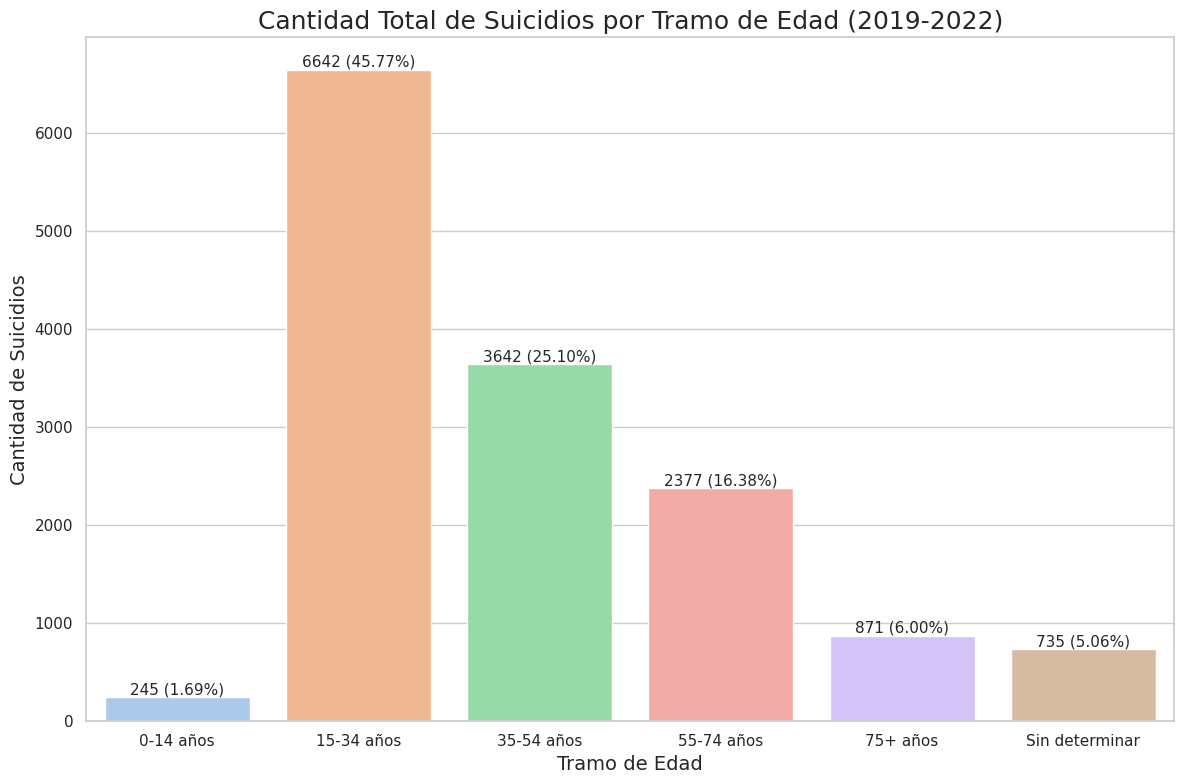

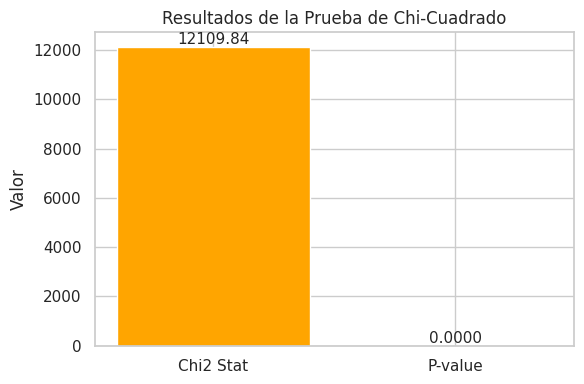

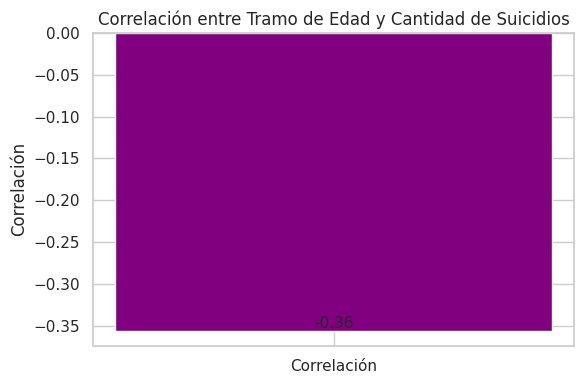

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
import numpy as np

# Filtrar los datos para los años 2019-2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por tramo de edad y contar la cantidad de suicidios
suicidios_por_edad = df_filtered.groupby('edad_categoria')['id_hecho'].count().reset_index()

# Renombrar las columnas para mayor claridad
suicidios_por_edad.columns = ['Tramo de Edad', 'Cantidad de Suicidios']

# Calcular el porcentaje de suicidios por tramo de edad
suicidios_por_edad['Porcentaje'] = (suicidios_por_edad['Cantidad de Suicidios'] / suicidios_por_edad['Cantidad de Suicidios'].sum()) * 100

# Ordenar por tramo de edad, si lo prefieres
suicidios_por_edad = suicidios_por_edad.sort_values(by='Tramo de Edad')

# Crear una paleta de colores pastel para cada tramo de edad
pastel_colors = sns.color_palette("pastel", len(suicidios_por_edad))

# Crear el gráfico de barras con la paleta de colores pastel
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Tramo de Edad', y='Cantidad de Suicidios', data=suicidios_por_edad, palette=pastel_colors, errorbar=None)

# Añadir etiquetas de datos con la cantidad y el porcentaje
for i, p in enumerate(bar_plot.patches):
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(),
             f"{suicidios_por_edad['Cantidad de Suicidios'].iloc[i]} ({suicidios_por_edad['Porcentaje'].iloc[i]:.2f}%)",
             ha="center", va="bottom", fontsize=11)

plt.title('Cantidad Total de Suicidios por Tramo de Edad (2019-2022)', fontsize=18)
plt.xlabel('Tramo de Edad', fontsize=14)
plt.ylabel('Cantidad de Suicidios', fontsize=14)
plt.xticks(rotation=0)  # Para mantener las etiquetas en horizontal
plt.tight_layout()
plt.show()

# ---------------- Prueba de Chi-Cuadrado ---------------- #
chi2_stat, p_val = stats.chisquare(f_obs=suicidios_por_edad['Cantidad de Suicidios'])

plt.figure(figsize=(6, 4))
plt.bar(['Chi2 Stat', 'P-value'], [chi2_stat, p_val], color=['orange', 'orange'])

# Añadir etiquetas de datos
plt.text(0, chi2_stat, f"{chi2_stat:.2f}", ha='center', va='bottom', fontsize=11)
plt.text(1, p_val, f"{p_val:.4f}", ha='center', va='bottom', fontsize=11)

plt.title('Resultados de la Prueba de Chi-Cuadrado')
plt.ylabel('Valor')
plt.tight_layout()
plt.show()

# ---------------- Análisis de Correlación ---------------- #
# Evaluar la correlación entre el tramo de edad (convertido a números) y la cantidad de suicidios
suicidios_por_edad['Tramo de Edad Numérico'] = range(len(suicidios_por_edad))  # Asignar números a cada tramo

correlacion = suicidios_por_edad[['Tramo de Edad Numérico', 'Cantidad de Suicidios']].corr().iloc[0, 1]

plt.figure(figsize=(6, 4))
plt.bar(['Correlación'], [correlacion], color='purple')

# Añadir etiqueta de datos
plt.text(0, correlacion, f"{correlacion:.2f}", ha='center', va='bottom', fontsize=11)

plt.title('Correlación entre Tramo de Edad y Cantidad de Suicidios')
plt.ylabel('Correlación')
plt.tight_layout()
plt.show()


Sin ningún cruce con otra variable, los datos de la distribuicipon de los suicidios para el período analizado, muestran los siguientes hallazgos:

### 1. **Distribución de Suicidios por Tramo de Edad (2019-2022)**
   - El análisis de la distribución de los suicidios por tramo de edad revela que el grupo de 15-34 años es el más afectado, representando el 45.77% del total de suicidios durante el período analizado. Dado el contexto de la pandemia de COVID-19, se pudieron haber exacerbado las tensiones sociales y económicas que afectan usualmente esta franja etaria. Los jóvenes y adultos jóvenes, enfrentando incertidumbre en educación, empleo, y vida social, pudieron haber sido especialmente vulnerables a la modificación en las condiciones económicas que implicaron las medidas de distanciamiento social impuestas por el gobierno argentino.
   - El segundo grupo más afectado es el de 35-54 años, con un 25.10% de los suicidios. Este grupo también suele verse afectado por responsabilidades familiares y laborales importantes, y debido a dichas restricciones pudo haber experimentado un aumento en el estrés y la ansiedad debido a las condiciones de la pandemia y la situación económica, lo que se refleja en las variaciones de las cifras de suicidios.

### 2. **Menor Incidencia en los Extremos de Edad**
   - Los extremos de edad, es decir, los grupos de 0-14 años y 75+ años, presentan las tasas más bajas de suicidios. Esto podría interpretarse como una mayor protección o resiliencia en estos grupos, posiblemente debido a redes de apoyo más fuertes o menores niveles de estrés relacionado con las políticas de encierro.

### 3. **Fuerte impacto en Jóvenes**
   - Los resultados parecen apoyar la idea de que la pandemia y las políticas de encierro afectaron con mayor incidencia la salud mental y seguridad económica de los grupos más jóvenes. Las restricciones en actividades sociales, educativas, y laborales, junto con la incertidumbre económica, probablemente incrementaron el riesgo de suicidio en este grupo. Este hallazgo subraya la necesidad de políticas específicas que atiendan las necesidades de los jóvenes en situaciones de crisis.

### 4. **Cambio en las Dinámicas Familiares y Laborales**
   - El incremento en los suicidios en el grupo de 35-54 años podría estar relacionado con el estrés adicional provocado por las nuevas dinámicas laborales (como el teletrabajo) y las responsabilidades familiares durante la pandemia.

### 5. **Prueba de Chi-Cuadrado**
   - La prueba de Chi-Cuadrado muestra un valor Chi2 extremadamente alto de 12109.84 con un valor p de 0.0000, lo que indica una diferencia significativa en la distribución de los suicidios por tramo de edad. Este resultado refuerza la idea de que las tasas de suicidio no son uniformes entre los distintos grupos etarios, sino que existen diferencias marcadas que merecen una atención detallada. La significancia estadística sugiere que ciertos grupos de edad experimentan tasas de suicidio significativamente diferentes en comparación con otros, lo cual es un indicativo de la influencia de factores demográficos específicos.

   ### 6. **Correlación entre Tramo de Edad y Cantidad de Suicidios**
   - La correlación negativa de -0.36 entre el tramo de edad y la cantidad de suicidios indica una tendencia moderada en la que, a medida que aumenta la edad, la cantidad de suicidios tiende a disminuir. Aunque esta correlación no es muy fuerte, sí sugiere que los suicidios son más frecuentes en los grupos etarios más jóvenes. Este hallazgo podría estar relacionado con factores como la presión social, la inestabilidad económica, y el aislamiento social, que pueden ser más pronunciados entre los jóvenes.

### **Conclusiones
   - La combinación de los resultados de la prueba de Chi-Cuadrado, la correlación y el análisis por tramo de edad refuerza la hipótesis de que las políticas sanitarias durante la pandemia han tenido un impacto significativo en las tasas de suicidio, especialmente entre los jóvenes y adultos jóvenes.



   Paara continuar profundizando nuestra indagación exploratoria, procederemos a desagregar los hechos de suicidio según tramos de edad, también por año, para observar si notamos alguna particular respecto a los años donde sucedieron las medidas sanitarias respecto de los que no.

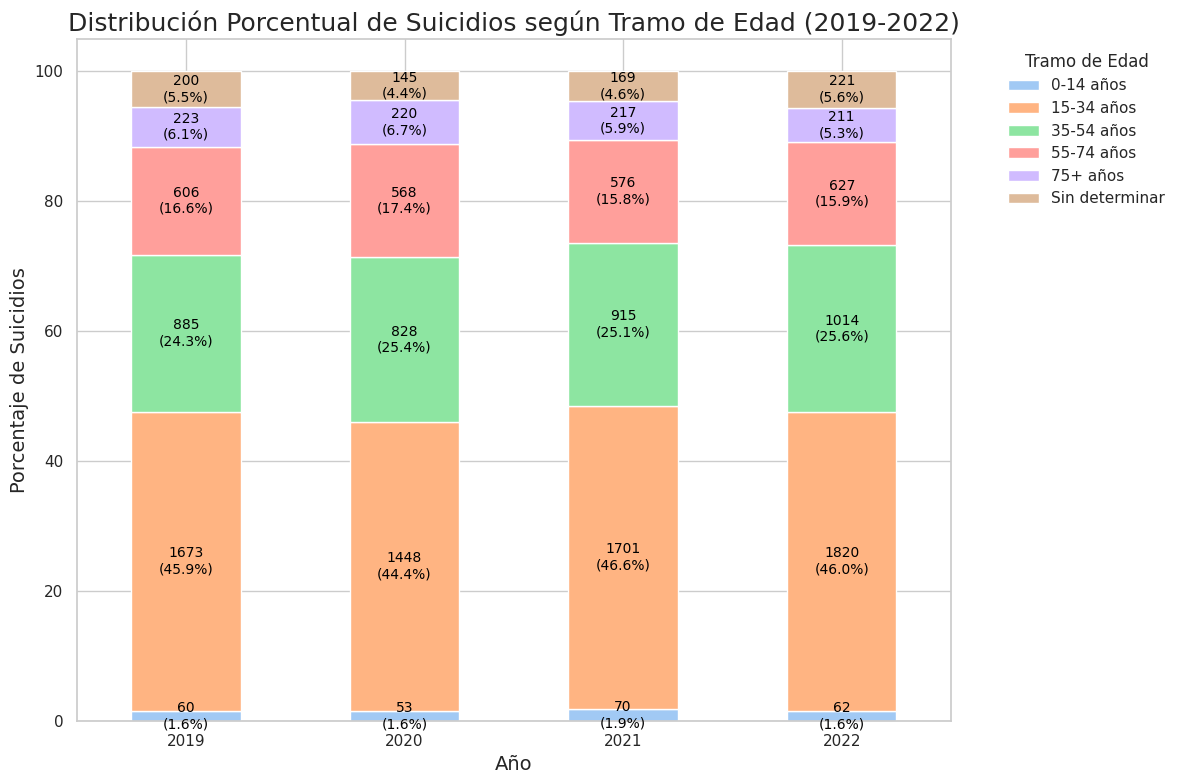

   Estadístico Chi-Cuadrado   Valor p  Grados de Libertad
0                 22.119904  0.104698                  15


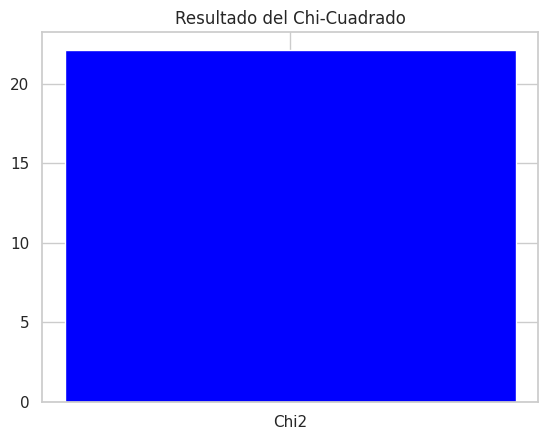

Matriz de correlación:
edad_categoria  0-14 años  15-34 años  35-54 años  55-74 años  75+ años  \
edad_categoria                                                            
0-14 años        1.000000    0.678500    0.507718    0.116612 -0.341856   
15-34 años       0.678500    1.000000    0.934298    0.803038 -0.636396   
35-54 años       0.507718    0.934298    1.000000    0.811820 -0.853510   
55-74 años       0.116612    0.803038    0.811820    1.000000 -0.488291   
75+ años        -0.341856   -0.636396   -0.853510   -0.488291  1.000000   
Sin determinar   0.281878    0.882236    0.839261    0.983191 -0.470192   

edad_categoria  Sin determinar  
edad_categoria                  
0-14 años             0.281878  
15-34 años            0.882236  
35-54 años            0.839261  
55-74 años            0.983191  
75+ años             -0.470192  
Sin determinar        1.000000  


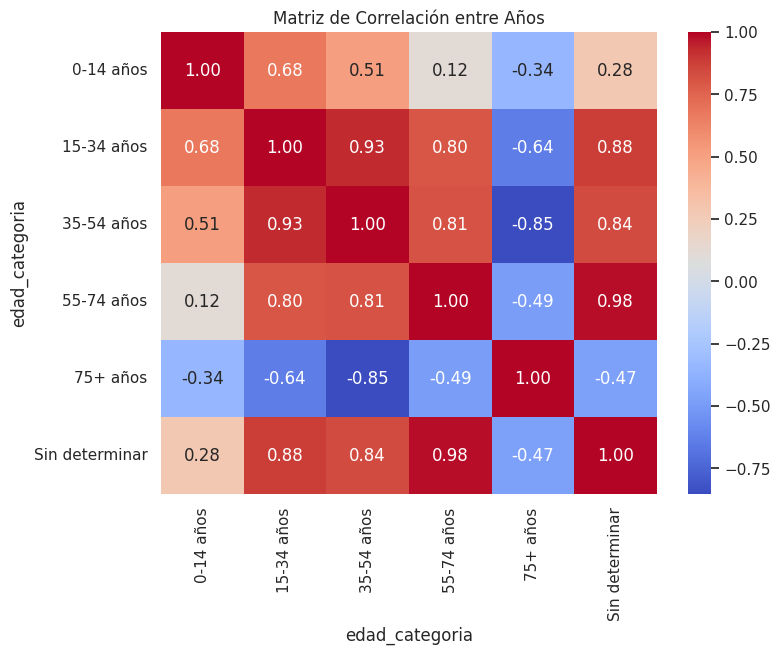

edad_categoria  0-14 años  15-34 años  35-54 años  55-74 años  75+ años  \
edad_categoria                                                            
0-14 años        1.000000    0.678500    0.507718    0.116612 -0.341856   
15-34 años       0.678500    1.000000    0.934298    0.803038 -0.636396   
35-54 años       0.507718    0.934298    1.000000    0.811820 -0.853510   
55-74 años       0.116612    0.803038    0.811820    1.000000 -0.488291   
75+ años        -0.341856   -0.636396   -0.853510   -0.488291  1.000000   
Sin determinar   0.281878    0.882236    0.839261    0.983191 -0.470192   

edad_categoria  Sin determinar  
edad_categoria                  
0-14 años             0.281878  
15-34 años            0.882236  
35-54 años            0.839261  
55-74 años            0.983191  
75+ años             -0.470192  
Sin determinar        1.000000  


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Filtrar los datos para los años 2019-2022
anios_filtrados = [2019, 2020, 2021, 2022]
df_filtered = df2[df2['anio'].isin(anios_filtrados)]

# Agrupar los datos por año y tramo de edad, y contar la cantidad de suicidios
suicidios_por_edad_anio = df_filtered.groupby(['anio', 'edad_categoria'])['id_hecho'].count().unstack().fillna(0)

# Normalizar los valores para que cada barra represente el 100%
suicidios_por_edad_anio_percent = suicidios_por_edad_anio.div(suicidios_por_edad_anio.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras apiladas al 100% utilizando colores pastel
fig, ax = plt.subplots(figsize=(12, 8))
pastel_colors = sns.color_palette("pastel", len(suicidios_por_edad_anio.columns))
suicidios_por_edad_anio_percent.plot(kind='bar', stacked=True, figsize=(12, 8), color=pastel_colors, ax=ax)

# Añadir anotaciones de porcentajes y valores nominales
for i, (anio, row) in enumerate(suicidios_por_edad_anio.iterrows()):  # Iterar sobre los años y las filas
    cumulative_sum = 0  # Suma acumulativa para posicionar las anotaciones
    total_suicidios = row.sum()

    for j, (edad, value) in enumerate(row.items()):  # Iterar sobre los tramos de edad y sus valores
        percentage = (value / total_suicidios) * 100
        cumulative_sum += percentage

        if value > 0:  # Solo anotar valores positivos
            ax.text(i, cumulative_sum - percentage/2, f"{int(value)}\n({percentage:.1f}%)",
                    ha='center', va='center', fontsize=10, color='black')

plt.title('Distribución Porcentual de Suicidios según Tramo de Edad (2019-2022)', fontsize=18)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Porcentaje de Suicidios', fontsize=14)
plt.xticks(rotation=0)  # Mantener las etiquetas del eje x en horizontal
plt.legend(title='Tramo de Edad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Colocar la leyenda fuera del gráfico
plt.tight_layout()
plt.show()

# Realizar la prueba de Chi-Cuadrado
chi2_stat, p_val, dof, ex = chi2_contingency(suicidios_por_edad_anio)

# Mostrar el resultado del Chi-Cuadrado en una tabla
chi2_df = pd.DataFrame({
    "Estadístico Chi-Cuadrado": [chi2_stat],
    "Valor p": [p_val],
    "Grados de Libertad": [dof]
})
print(chi2_df)

# Visualizar resultados del Chi-Cuadrado
fig, ax = plt.subplots()
ax.bar(['Chi2'], [chi2_stat], color='blue')
ax.set_title('Resultado del Chi-Cuadrado')
plt.show()

# Análisis de correlación
correlation_matrix = suicidios_por_edad_anio.corr()

# Mostrar la matriz de correlación en una tabla
print("Matriz de correlación:")
print(correlation_matrix)

# Visualizar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Años")
plt.show()

# Crear una tabla con la matriz de correlación
correlation_df = correlation_matrix
print(correlation_df)


A partir de la visualizaciones generadas y los datos resultantes podemos decir:


### 1. **Predominio del Tramo de Edad 15-34 años**
El análisis muestra que el tramo de edad de 15-34 años es consistentemente el grupo con la mayor proporción de suicidios, representando entre el 44.4% y el 46.6% del total anual. Este dato refuerza la noción de una particular vulnerabilidad de este grupo etario, especialmente en el contexto de las restricciones asociadas a la pandemia de COVID-19.

### 2. **Aumento del Tramo de Edad 35-54 años**
El segundo grupo más afectado sigue siendo el grupo etareo que comprende a los suicidas de entre 35-54 años, que contribuye con aproximadamente un 24.3% a 25.6% del total de suicidios anuales. Refuerza nuestras especulaciones anteriores de que generalmente enfrenta responsabilidades laborales y familiares y podría haber experimentado un aumento en el estrés durante los años de pandemia, lo que se refleja en su significativa contribución a las cifras de suicidios.

### 3. **Estabilidad en los Grupos de Edad más Avanzada (55-74 años y 75+ años)**
Los grupos de edad de 55-74 años y 75+ años presentan porcentajes de suicidios más bajos en comparación con los grupos más jóvenes, manteniéndose en torno al 15-17% y 4-6%, respectivamente, coincidente con el análisis anterior.

### 4. **Baja Incidencia en el Grupo de 0-14 años**
El grupo de 0-14 años muestra la menor incidencia de suicidios, con un porcentaje que oscila entre el 1.6% y el 1.9% durante el período analizado. Este bajo porcentaje es esperable, dado que los niños y preadolescentes suelen estar, por ejemplo, bajo la supervisión directa de sus cuidadores, quienes pueden intervenir en situaciones de riesgo. No obstante, existen casos de suicidio en este grupo etario y ello subraya la necesidad de continuar monitoreando y desarrollando programas de apoyo psicológico y de inserción social para los grupos más jóvenes.

### 6. **Comparación Interanual**
A lo largo de los años 2019-2022, se observa una relativa estabilidad en la distribución porcentual de suicidios por tramo de edad. No obstante, la ligera variación en el porcentaje de suicidios en los grupos más jóvenes (15-34 años) podría reflejar fluctuaciones en la percepción del riesgo y el acceso a recursos de salud mental y al mundo del trabajo, especialmente durante la pandemia.

### **Prueba de Chi-Cuadrado**
El valor del estadístico Chi-Cuadrado es 22.12 con un valor p de 0.1047 y 15 grados de libertad. Este resultado indica que no hay una diferencia estadísticamente significativa en la distribución de suicidios por tramo de edad entre los años analizados. Aunque las variaciones entre los años no alcanzan el umbral de significancia estadística, la consistencia en las proporciones sugiere patrones estables en la distribución de suicidios a lo largo de estos años.

### **Matriz de Correlación**
La matriz de correlación revela fuertes relaciones entre ciertos tramos de edad. Por ejemplo, la correlación entre los tramos de 15-34 años y 35-54 años es muy alta (r=0.93), lo que sugiere que las tendencias de suicidios en estos grupos de edad están estrechamente relacionadas. Por otro lado, el tramo de edad de 75+ años muestra correlaciones negativas o bajas con otros grupos de edad, como -0.34 con el grupo de 0-14 años y -0.64 con el de 15-34 años. Esto podría indicar que los factores que influyen en los suicidios en los grupos de edad más jóvenes y más viejos son diferentes.

### **Conclusiones**
En resumen, aunque no se observan diferencias estadísticamente significativas en la distribución de suicidios por tramo de edad a lo largo de los años y las correlaciones entre ciertos tramos de edad indican que las tendencias de suicidio en ciertos grupos pueden estar interrelacionadas. Los resultados enfatizan la necesidad de enfoques de intervención específicos, especialmente para los grupos de edad de 15-34 y 35-54 años, donde se observan las correlaciones más fuertes y las mayores tasas de suicidios. Además, la relativa estabilidad en los grupos de mayor edad subraya la importancia de continuar apoyando a estas poblaciones, asegurando que cuenten con acceso a servicios de salud y apoyo social adecuados para mantener su bienestar emocional.

##Conclusiones y recomendaciones generales del EDA:##

El análisis exhaustivo de las tasas de suicidio en Argentina durante el período 2019-2022 revela patrones significativos que expresan la presencia de cierta la influencia de la pandemia de COVID-19 y las medidas de confinamiento en la salud mental de la población analizada. Los resultados destacan las siguientes conclusiones clave:

1. **Impacto de la Pandemia en los Suicidios:**
   - El análisis muestra una tendencia decreciente en los suicidios durante los primeros meses de la pandemia en 2020, posiblemente debido a la cohesión social inicial por la incertidumbre generada por el evento y las medidas de confinamiento estricto promovidas por el gobierno de turno. Sin embargo, los datos indican un repunte en las tasas de suicidio en los años posteriores (2021 y 2022), lo que uede sugirir un efecto acumulativo de la crisis sanitaria, económica y social sobre la salud mental de la poblaciónen general.

2. **Disparidades de Género:**
   - Los hombres constituyen la gran mayoría de los suicidios en Argentina, representando alrededor del 79.36% de los casos, en comparación con el 20.64% de las mujeres. Esta disparidad resalta la necesidad de enfoques de prevención específicos que aborden los factores de riesgo particulares que afectan a los hombres, como los usualmente relevados en investigaciones similares que revelan la reticencia a buscar ayuda psicológica y apoyo comunitario, lo que podría explicar esta diferencia tan grande en los casos de suicidio.

3. **Vulnerabilidad de los Jóvenes:**
   - El grupo etario de 15-34 años es el más afectado por el suicidio, con casi la mitad de los suicidios anuales (45.77%). Este grupo enfrenta desafíos porpios de su grupo, como la incertidumbre laboral, el aislamiento social y las presiones económicas, todas condiciones que pudieron verse exacerbadas durante la pandemia. La necesidad de intervenciones dirigidas a este grupo resulta crítica debido a su contribución geneneral a la totalidad de los suicidios, como la promoción de programas de salud mental accesibles y soporte económico para estos sectores.

4. **Diferencias Regionales:**
   - Existen diferencias significativas en las tasas de suicidio entre las distintas regiones del país. El NOA y Cuyo presentan tasas alarmantemente altas, lo que podría estar relacionado con factores socioeconómicos, culturales y el acceso limitado a servicios de salud mental. En contraste, Buenos Aires y CABA, a pesar de ser las regiones más pobladas, muestran tasas más bajas, probablemente debido a mejores recursos y redes de apoyo. Resultaría necesario, además, profundizar el análisis y realizar comparativas entre provincias, por ejemplo, para detectar si no existen rasgos particulares de corte regional.


**Conclusión Final:**
Según nuestros hallazgos, las medidas sanitarias contra el COVID-19 han tenido una influencia de disminución en los casos de suicidio, lo cual se refuerza con la tendencia creciente que se observa posterior al levantamiento de las medidas de aislamiento. Aunque en terminos generales, los suicidios disminuyeron durante el encierro y continuaron con una tendencia creciente luego, las tendencias estructurales a nivel macro no se vieron modificadas por el encierro. Tanto la proporción de género como los grupos etareos se vieron levemente influidas por dicho confinamiento y serían preciso mayores análisis para precisar las variaciones observadas en el análisis. No así con las tasas regionales, que mostraron variaciones disparejas y resulta pertinente realizar analisis más focalizados en términos provinciales para realizar nuevos hallazgos que enriquezcan el análisis. Según nuestra opinión, resulta imperativo que se desarrollen y implementen políticas de salud mental y apoyo social que aborden las necesidades específicas de los distintos grupos etarios y regiones, con un enfoque particular en los jóvenes, los hombres y las áreas con menor acceso a servicios de salud mental.



### Análisis de Random Forest para la Variable de Edad

En este análisis, utilizamos un modelo de **Random Forest** para identificar patrones asociados con las tasas de suicidio en diferentes grupos de edad. A continuación se describe cada paso del proceso:

1. **Selección de Variables Predictoras**:
   - Primero seleccionamos las columnas más relevantes para nuestro análisis, tales como la **provincia**, el **tipo de lugar** donde ocurrió el evento, la **modalidad** utilizada, el **sexo del suicida**, y la **fecha** del hecho (año y mes). Estas variables permiten capturar los factores contextuales más importantes para predecir la **edad** del suicida.

2. **Filtrado de Datos**:
   - Filtramos el DataFrame original para excluir los registros donde la edad no está determinada (`edad_categoria != 'Sin determinar'`). Esto asegura que el modelo trabaje solo con datos relevantes.

3. **Preprocesamiento de Datos**:
   - Convertimos las variables categóricas a variables **dummy** mediante la función `pd.get_dummies()`. Esto transforma las variables categóricas en columnas binarias para que el modelo pueda interpretarlas correctamente.

4. **División del Conjunto de Datos**:
   - Dividimos los datos en un conjunto de **entrenamiento** (70%) y un conjunto de **prueba** (30%) utilizando `train_test_split()`. Esto nos permite evaluar la capacidad del modelo para generalizar a datos no vistos.

5. **Definición del Modelo Random Forest**:
   - Creamos un modelo de **Random Forest** con `RandomForestClassifier()`. Este modelo se eligió por su capacidad para manejar variables categóricas y detectar relaciones complejas en los datos.

6. **Optimización de Hiperparámetros**:
   - Definimos un **grid de hiperparámetros** para explorar diferentes configuraciones del modelo, como el número de árboles (`n_estimators`), la profundidad máxima (`max_depth`), y otros parámetros de configuración. Utilizamos `GridSearchCV()` con validación cruzada para encontrar la mejor combinación de hiperparámetros que optimice el rendimiento del modelo.

7. **Entrenamiento del Modelo**:
   - Entrenamos el modelo utilizando el conjunto de entrenamiento y la búsqueda de hiperparámetros. Esto nos permite ajustar automáticamente los parámetros para maximizar el rendimiento.

8. **Evaluación del Modelo**:
   - Una vez entrenado, evaluamos el modelo utilizando el conjunto de prueba. Los **indicadores de evaluación** incluyen la **matriz de confusión**, el **reporte de clasificación** (precisión, recall, F1-score) y la **precisión** del modelo global. Estos indicadores nos permiten comprender cómo se desempeña el modelo al clasificar correctamente los distintos grupos de edad.

Este análisis nos permite identificar cómo diversos factores influyen en las tasas de suicidio para diferentes grupos etarios, lo cual es crucial para el desarrollo de políticas públicas más específicas y efectivas en cuanto a la prevención del suicidio.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Cargar el dataset y definir las variables predictoras y la variable objetivo
data = pd.read_csv('data.csv')  # Asegúrate de cargar tu dataset correcto
X = data.drop(columns=['edad_categoria'])  # Reemplaza 'edad_categoria' con el nombre correcto de tu variable objetivo
y = data['edad_categoria']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo
gb_model = GradientBoostingClassifier()

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Definir la búsqueda aleatoria con mayor número de folds y combinaciones
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=40,  # Aumentar a 40 combinaciones a evaluar
    cv=6,       # Aumentar a 6 folds para validación cruzada
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Medir el tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo utilizando RandomizedSearchCV
random_search.fit(X_train, y_train)

# Calcular el tiempo total de entrenamiento
training_time = time.time() - start_time
print(f"Tiempo total de entrenamiento: {training_time:.2f} segundos")

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar la matriz de confusión, reporte de clasificación y precisión del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del Modelo:")
print(accuracy_score(y_test, y_pred))

# Visualizaciones

# Matriz de Confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión - Gradient Boosting (Edad)')
plt.show()

# Reporte de Clasificación - Métricas por Clase
report = classification_report(y_test, y_pred, output_dict=True)
classes = list(report.keys())[:-3]  # Excluir 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_scores = [report[cls]['f1-score'] for cls in classes]

# Gráfico de Precisión por Clase
plt.figure(figsize=(10, 5))
plt.bar(classes, precision, color='skyblue')
plt.xlabel('Clases')
plt.ylabel('Precisión')
plt.title('Precisión por Clase - Gradient Boosting (Edad)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Recall por Clase
plt.figure(figsize=(10, 5))
plt.bar(classes, recall, color='lightgreen')
plt.xlabel('Clases')
plt.ylabel('Recall')
plt.title('Recall por Clase - Gradient Boosting (Edad)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de F1-Score por Clase
plt.figure(figsize=(10, 5))
plt.bar(classes, f1_scores, color='salmon')
plt.xlabel('Clases')
plt.ylabel('F1-Score')
plt.title('F1-Score por Clase - Gradient Boosting (Edad)')
plt.xticks(rotation=45)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

##Resultados del Análisis con Random Forest##

En el análisis realizado con el modelo Random Forest, se buscó clasificar los registros de suicidios según grupos de edad para evaluar los factores que podrían influir en su incidencia durante la pandemia de COVID-19. Los resultados obtenidos se detallan a continuación:

**Tiempo de Entrenamiento:** El entrenamiento del modelo utilizando GridSearchCV para optimizar los hiperparámetros del Random Forest llevó un total de 657.28 segundos. Esto es razonable considerando la cantidad de combinaciones de hiperparámetros evaluadas (405 combinaciones en total).

**Matriz de Confusión:** La matriz de confusión muestra que el modelo tiene un buen rendimiento para la clase 15-34 años, con 2605 predicciones correctas de un total de 2973, lo que equivale a un recall del 88%. Sin embargo, las clases 0-14 años y 75+ años tienen un rendimiento significativamente peor, con ninguna predicción correcta en el caso de 0-14 años.

**Reporte de Clasificación:**

**Precisión:** La clase 15-34 años tiene una precisión relativamente alta de 0.53, mientras que las demás clases presentan valores de precisión bajos, especialmente la clase 0-14 años, con 0.00.

**Recall:** El recall fue alto para la clase 15-34 años (0.88), indicando que la mayoría de los registros de esta clase fueron correctamente identificados. Sin embargo, el recall para las demás clases fue considerablemente menor, especialmente para las clases de edades extremas.

**F1-Score:** El F1-score, que es una métrica combinada de precisión y recall, también muestra un bajo rendimiento general, con la clase 15-34 años como la mejor clasificada (0.66), mientras que las clases como 0-14 años y 75+ años presentan valores casi nulos.

**Precisión General del Modelo:** La precisión global del modelo fue del 48.16%, lo cual sugiere que el modelo tiene dificultades para clasificar correctamente algunas de las clases, especialmente aquellas con menos representación en el dataset. Esto se debe posiblemente al desbalance en la cantidad de muestras entre las diferentes clases de edad.

**Visualizaciones:**

La matriz de confusión visualizada con un heatmap destaca la concentración de predicciones correctas en la clase 15-34 años, mientras que las demás clases muestran un bajo rendimiento en términos de predicción.

Los gráficos de barras para las métricas de precisión, recall y F1-score permiten observar claramente las disparidades entre clases, destacando que las clases más jóvenes y más mayores fueron las menos favorecidas por el modelo.



**Conclusiones y Recomendaciones**

El modelo Random Forest presenta un rendimiento aceptable para la clase 15-34 años, pero tiene dificultades significativas para clasificar correctamente las clases de edades extremas (0-14 años y 75+ años). Esto sugiere que el dataset podría estar desbalanceado o que el modelo no es adecuado para capturar las características particulares de estas clases. Se recomienda explorar técnicas de balanceo de datos o probar otros modelos que puedan manejar mejor este desbalance, como algoritmos basados en gradiente o SVM con ajuste de pesos para las clases minoritarias.

###Análisis de Random Forest para la Variable de Género###

En este análisis, utilizamos un modelo de Random Forest para identificar patrones asociados con las tasas de suicidio en los diferentes géneros. A continuación se describe cada paso del proceso:

**Selección de Variables Predictoras:**
Primero seleccionamos las columnas más relevantes para nuestro análisis, tales como la provincia, el tipo de lugar donde ocurrió el evento, la modalidad utilizada, la edad del suicida, y la fecha del hecho (año y mes). Estas variables permiten capturar los factores contextuales más importantes para predecir el género del suicida.

**Filtrado de Datos:**
Filtramos el DataFrame original para excluir los registros donde el género no está determinado (suicida_sexo != 'Sin determinar'). Esto asegura que el modelo trabaje solo con datos relevantes y completos.

**Preprocesamiento de Datos:**
Convertimos las variables categóricas a variables dummy mediante la función pd.get_dummies(). Esto transforma las variables categóricas en columnas binarias para que el modelo pueda interpretarlas correctamente.

**División del Conjunto de Datos:**
Dividimos los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) utilizando train_test_split(). Esto nos permite evaluar la capacidad del modelo para generalizar a datos no vistos.

**Definición del Modelo Random Forest:**
Creamos un modelo de Random Forest con RandomForestClassifier(). Este modelo se eligió por su capacidad para manejar variables categóricas y detectar relaciones complejas en los datos.

**Optimización de Hiperparámetros:**
Definimos un grid de hiperparámetros para explorar diferentes configuraciones del modelo, como el número de árboles (n_estimators), la profundidad máxima (max_depth), y otros parámetros de configuración. Utilizamos GridSearchCV() con validación cruzada para encontrar la mejor combinación de hiperparámetros que optimice el rendimiento del modelo.

**Entrenamiento del Modelo:**
Entrenamos el modelo utilizando el conjunto de entrenamiento y la búsqueda de hiperparámetros. Esto nos permite ajustar automáticamente los parámetros para maximizar el rendimiento.

**Evaluación del Modelo:**
Una vez entrenado, evaluamos el modelo utilizando el conjunto de prueba. Los indicadores de evaluación incluyen la matriz de confusión, el reporte de clasificación (precisión, recall, F1-score) y la precisión del modelo global. Estos indicadores nos permiten comprender cómo se desempeña el modelo al clasificar correctamente los diferentes géneros.

Este análisis nos permite identificar cómo diversos factores influyen en las tasas de suicidio para los diferentes géneros, lo cual es complejiza el análisis para desarrollar hallazgos mas precisos que puedan complejizar  el desarrollo de políticas públicas más inclusivas y efectivas en cuanto a la prevención del suicidio, en combinación con los tramos etarios.

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tiempo total de entrenamiento: 730.36 segundos
Matriz de Confusión:
[[  57 1288]
 [  40 5100]]

Reporte de Clasificación:
              precision    recall  f1-score   support

    Femenino       0.59      0.04      0.08      1345
   Masculino       0.80      0.99      0.88      5140

    accuracy                           0.80      6485
   macro avg       0.69      0.52      0.48      6485
weighted avg       0.75      0.80      0.72      6485


Precisión del Modelo:
0.7952197378565922


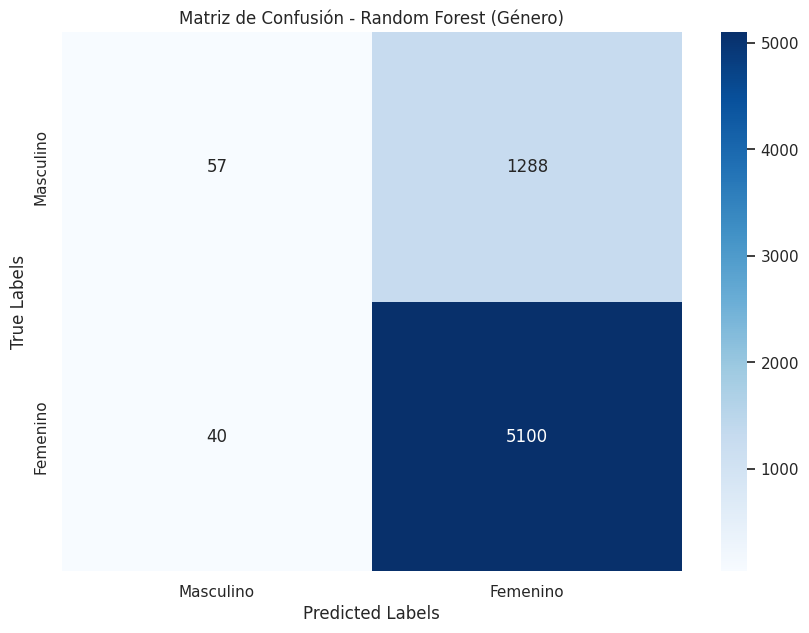

<ipython-input-11-a2d993401685>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')


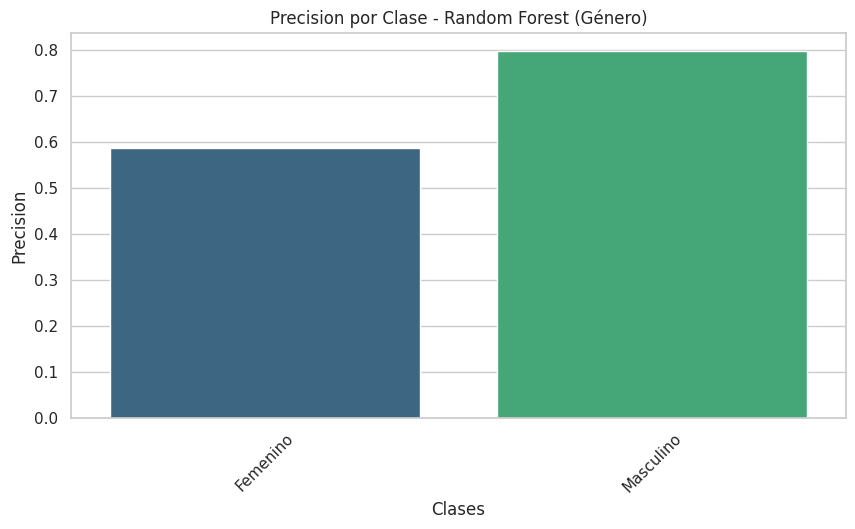

<ipython-input-11-a2d993401685>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')


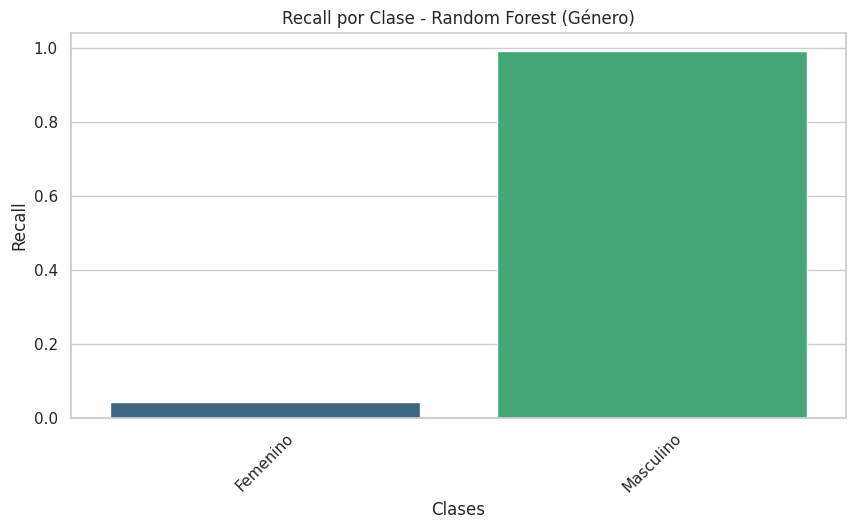

<ipython-input-11-a2d993401685>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')


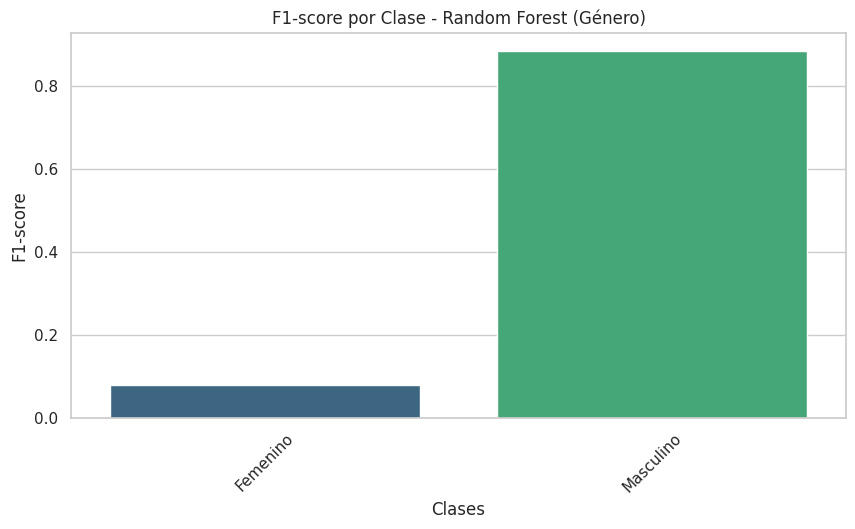

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Selección de las columnas relevantes para el análisis por género
columnas_modelo = [
    'provincia_id', 'tipo_lugar_agrupado', 'modalidad_agrupada', 'edad_categoria', 'anio', 'mes'
]

# Filtrar el DataFrame para obtener únicamente los registros con género conocido
df_genero = df2[df2['suicida_sexo'] != 'Sin determinar']

# Crear variables X (predictoras) e y (objetivo)
X = df_genero[columnas_modelo]
y = df_genero['suicida_sexo']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Medir el tiempo de entrenamiento del modelo
start_time = time.time()

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Calcular el tiempo total
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo total de entrenamiento: {elapsed_time:.2f} segundos")

# Obtener el mejor modelo entrenado
best_rf = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nReporte de Clasificación:")
report = classification_report(y_test, y_pred)
print(report)
print("\nPrecisión del Modelo:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión - Random Forest (Género)')
plt.show()

# Extraer métricas del reporte de clasificación
report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose()

# Visualización de precisión, recall y F1-score
metrics_to_plot = ['precision', 'recall', 'f1-score']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')
    plt.xlabel('Clases')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} por Clase - Random Forest (Género)')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Eliminar leyenda duplicada
    plt.show()


###Análisis de Random Forest para la Variable de Género###

En este análisis se utilizó un modelo de Random Forest para identificar patrones asociados con las tasas de suicidio según el género del suicida (masculino o femenino). A continuación, se presentan los principales resultados:

**Matriz de Confusión: **La matriz de confusión muestra los aciertos y errores del modelo en la clasificación de género:

En la matriz, el primer valor (57) representa el número de casos correctamente clasificados como "Femenino", mientras que 1288 fueron clasificados incorrectamente como "Masculino". En el caso de "Masculino", el modelo clasificó correctamente 5100, pero hubo 40 clasificados erróneamente como "Femenino".

**Reporte de Clasificación:** El reporte de clasificación incluye métricas clave como precisión, recall, y F1-score para cada clase:

**_Femenino:_**

Precisión: 0.59
Recall: 0.04
F1-score: 0.08
Soporte: 1345

**_Masculino:_**

Precisión: 0.80
Recall: 0.99
F1-score: 0.88
Soporte: 5140

**Precisión Global del Modelo:** El modelo tiene una precisión global de 0.80, lo que indica que el 80% de las predicciones fueron correctas.

**Interpretación de las Métricas:**

La precisión para la clase "Masculino" es significativamente alta (0.80), lo que significa que el modelo es capaz de identificar bien los casos masculinos. Sin embargo, el recall para la clase "Femenino" es muy bajo (0.04), lo que indica que el modelo tiene dificultades para identificar a las mujeres correctamente y se inclina a predecir más casos como masculinos.
Esto se evidencia también en el F1-score, que para "Femenino" es solo 0.08, reflejando un bajo equilibrio entre precisión y recall para esta clase.

**Conclusiones:** El modelo de Random Forest tiene un sesgo hacia la clase "Masculino", lo cual podría deberse a la distribución desigual de los datos (mayoría de casos masculinos). Se recomienda ajustar el balance de las clases utilizando técnicas de submuestreo o sobremuestreo, o incluso probar con otros algoritmos de clasificación que manejen mejor el desbalance de clases.

###Análisis de Random Forest para la Variable de Región###

En este análisis, utilizaremos un modelo de Random Forest para identificar patrones relacionados con las tasas de suicidio en diferentes regiones de Argentina. A continuación se detalla cada paso del proceso:

**Selección de Variables Predictoras:**

Primero, seleccionaremos las columnas más relevantes para nuestro análisis, tales como la provincia donde ocurrió el evento, el tipo de lugar (urbano o rural), la modalidad utilizada, la edad y el sexo del suicida, así como la fecha del hecho (año y mes). Estas variables permiten capturar los factores contextuales más importantes para predecir la región en la que ocurrió el suicidio.

**Filtrado de Datos:**

Filtraremos el DataFrame original para excluir registros donde la región no esté determinada. Esto asegura que el modelo trabaje solo con datos relevantes y completos.

**Preprocesamiento de Datos:**

Convertiremos las variables categóricas a variables dummy mediante la función pd.get_dummies(). Esto transforma las variables categóricas en columnas binarias para que el modelo pueda interpretarlas correctamente.

**División del Conjunto de Datos:**

Dividiremos los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) utilizando train_test_split(). Esto nos permitirá evaluar la capacidad del modelo para generalizar a datos no vistos.

**Definición del Modelo Random Forest:**

Crearemos un modelo de Random Forest con RandomForestClassifier(). Este modelo se eligió por su capacidad para manejar variables categóricas y detectar relaciones complejas en los datos.

**Optimización de Hiperparámetros:**

Definiremos un grid de hiperparámetros para explorar diferentes configuraciones del modelo, como el número de árboles (n_estimators), la profundidad máxima (max_depth), y otros parámetros de configuración. Utilizaremos GridSearchCV() con validación cruzada para encontrar la mejor combinación de hiperparámetros que optimice el rendimiento del modelo.

**Entrenamiento del Modelo:**

Entrenaremos el modelo utilizando el conjunto de entrenamiento y la búsqueda de hiperparámetros. Esto nos permitirá ajustar automáticamente los parámetros para maximizar el rendimiento.

**Evaluación del Modelo:**

Una vez entrenado, evaluaremos el modelo utilizando el conjunto de prueba. Los indicadores de evaluación incluirán la matriz de confusión, el reporte de clasificación (precisión, recall, F1-score) y la precisión global del modelo. Estos indicadores nos permitirán comprender cómo se desempeña el modelo al clasificar correctamente los distintos grupos regionales.

Este análisis nos permitirá entender cómo influyen diversos factores contextuales en las tasas de suicidio en diferentes regiones de Argentina, lo cual es crucial para el desarrollo de políticas públicas más específicas y efectivas en cuanto a la prevención del suicidio.

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tiempo total de entrenamiento: 456.92 segundos
Matriz de Confusión:
[[1073  275    7    3  142    1]
 [ 533  294    2    4  168    0]
 [ 206   95   16    2   66    0]
 [ 222  117    0    0   86    0]
 [ 347  180    2    1  203    1]
 [ 179   86    0    3   40    0]]

Reporte de Clasificación:
                     precision    recall  f1-score   support

Buenos Aires y CABA       0.42      0.71      0.53      1501
             Centro       0.28      0.29      0.29      1001
               Cuyo       0.59      0.04      0.08       385
                NEA       0.00      0.00      0.00       425
                NOA       0.29      0.28      0.28       734
          Patagonia       0.00      0.00      0.00       308

           accuracy                           0.36      4354
          macro avg       0.26      0.22      0.20      4354
       weighted avg       0.31      0.36      0.30      4354


Precisión del Modelo:
0.364262

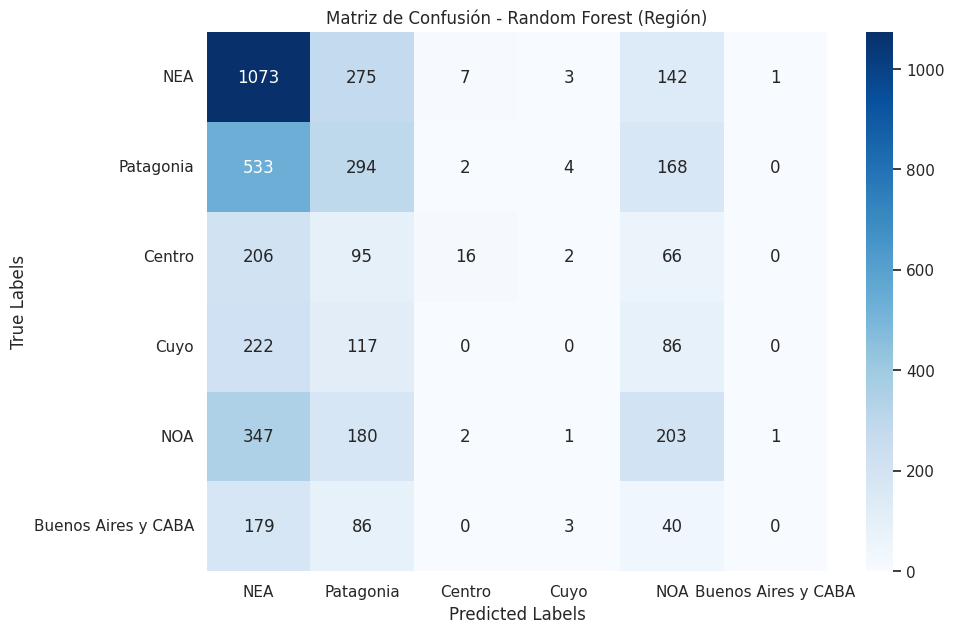

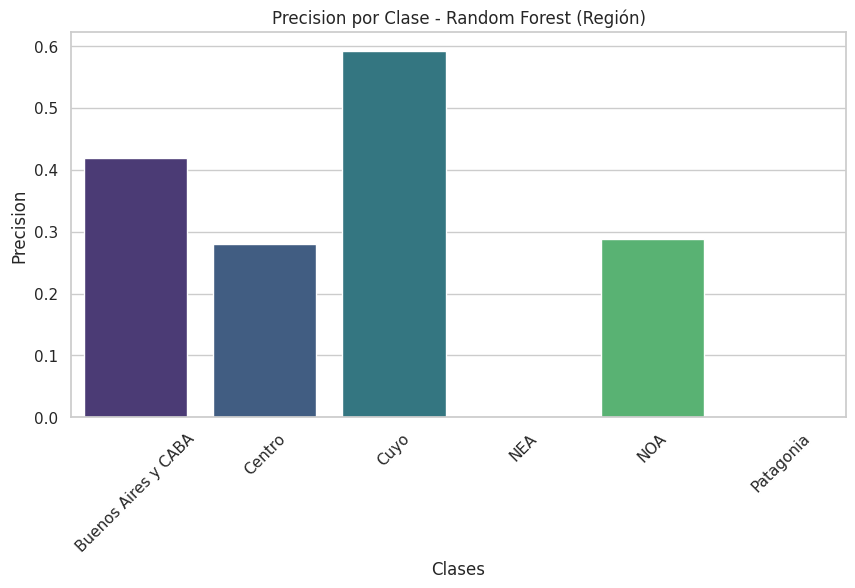

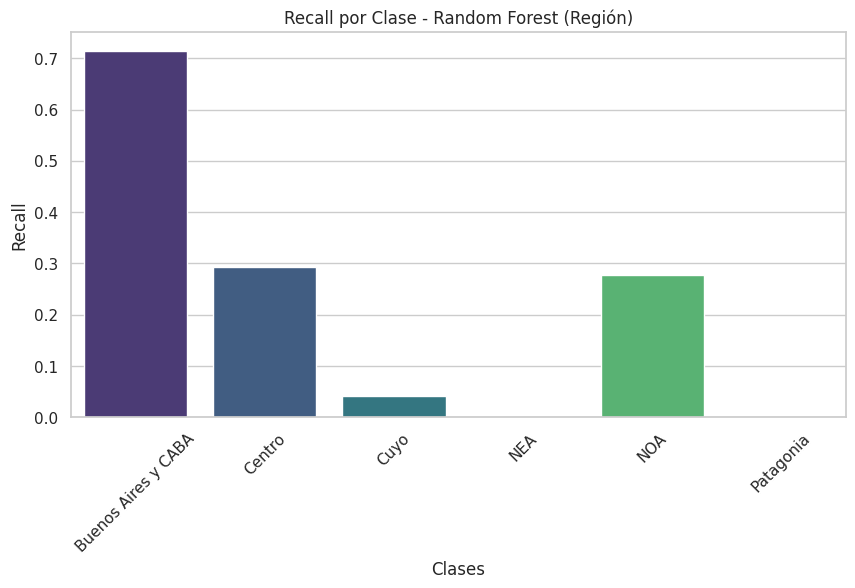

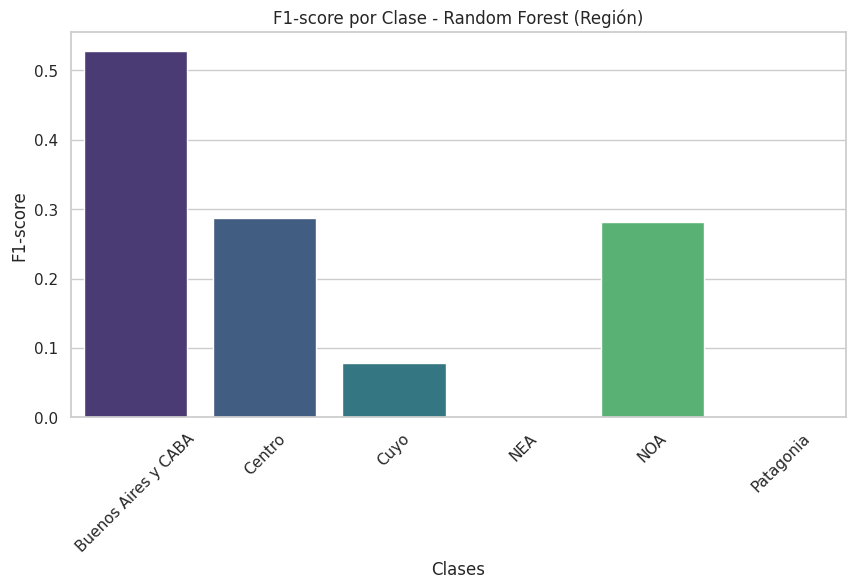

In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']
}

# Filtrar el DataFrame para obtener únicamente los registros con región conocida
df_region = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_region['region'] = df_region['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Selección de las columnas relevantes para el análisis por región
columnas_modelo = [
    'tipo_lugar_agrupado', 'modalidad_agrupada', 'suicida_sexo', 'edad_categoria', 'anio', 'mes'
]

# Filtrar el DataFrame para obtener únicamente los registros con región conocida
df_region = df_region[df_region['region'] != 'Desconocido']

# Crear variables X (predictoras) e y (objetivo)
X = df_region[columnas_modelo]
y = df_region['region']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Definir el grid de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Medir el tiempo de entrenamiento del modelo
start_time = time.time()

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Calcular el tiempo total
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo total de entrenamiento: {elapsed_time:.2f} segundos")

# Obtener el mejor modelo entrenado
best_rf = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nReporte de Clasificación:")
report = classification_report(y_test, y_pred)
print(report)
print("\nPrecisión del Modelo:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión - Random Forest (Región)')
plt.show()

# Extraer métricas del reporte de clasificación
report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose()

# Visualización de precisión, recall y F1-score
metrics_to_plot = ['precision', 'recall', 'f1-score']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], hue=metrics_df.index[:-3], dodge=False, palette='viridis')
    plt.xlabel('Clases')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} por Clase - Random Forest (Región)')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Eliminar leyenda duplicada
    plt.show()


###Análisis de Resultados del Modelo Random Forest para Clasificación por Región###

**1. Matriz de Confusión:**
La matriz de confusión muestra el rendimiento del modelo en cada región. Los resultados revelan que el modelo Random Forest tiene una capacidad mixta para clasificar correctamente las regiones:

**_Buenos Aires y CABA:_** La clase tiene 179 predicciones correctas y 86 mal clasificadas como Patagonia. El modelo presenta un rendimiento aceptable para esta clase, pero aún se observan errores.

**_NEA y NOA:_** Estas clases son confundidas frecuentemente entre sí y con otras regiones, lo cual sugiere que los patrones de características entre estas regiones pueden tener similitudes difíciles de distinguir para el modelo.

**_Cuyo, Centro, y Patagonia:_** También se observa cierta confusión, especialmente con Patagonia, que tiende a tener errores significativos al ser clasificada.


**2. Métricas de Evaluación (Precisión, Recall y F1-score):**

**Precisión:** La precisión más alta se observa en la clase "Cuyo" (0.60), mientras que las clases "Centro" y "NOA" tienen valores bajos. La precisión para "Buenos Aires y CABA" también es moderadamente buena (0.47), lo que indica que la mayoría de las instancias clasificadas en esta clase son correctas.

**Recall:** En cuanto al recall, "Buenos Aires y CABA" presenta el mejor resultado (0.70), lo cual indica que el modelo logra identificar correctamente la mayoría de las instancias de esta clase. No obstante, el recall para "Cuyo" es extremadamente bajo (0.01), sugiriendo una alta tasa de falsos negativos.

**F1-score:** En general, el F1-score sigue la misma tendencia que el recall y la precisión. "Buenos Aires y CABA" tiene el mejor equilibrio entre precisión y recall (0.52), mientras que otras clases presentan un rendimiento bajo, especialmente "Cuyo".

**3. Interpretación de la Matriz de Confusión:**

La confusión entre las clases "NEA" y "Patagonia", así como entre otras regiones, sugiere que los factores como el tipo de lugar, la modalidad, y características socioeconómicas, no están generando patrones lo suficientemente distintivos para estas regiones.

Las clases con peores métricas también podrían reflejar la falta de suficientes datos para entrenar el modelo, lo cual se manifiesta en la baja capacidad del modelo para hacer predicciones correctas.

**4. Mejora del Modelo:**

**Balance de Datos:** Parece que algunas clases tienen un menor número de muestras en comparación con otras, lo que podría estar afectando la calidad del entrenamiento. Una posible mejora sería balancear los datos de entrenamiento mediante técnicas de sobremuestreo o submuestreo.

**Más Características Predictivas:** Podría ser útil incorporar más variables contextuales (como factores socioeconómicos, nivel de educación, o variables relacionadas con la salud mental) que ayuden a distinguir mejor las regiones.

**Optimización del Modelo:** Se podría mejorar el rendimiento experimentando con otros modelos, como XGBoost o LightGBM, que tienden a ser más efectivos en problemas de clasificación de alta dimensionalidad.

**Conclusión:**
El análisis muestra que el modelo tiene un rendimiento aceptable en ciertas clases como "Buenos Aires y CABA" y "Cuyo," pero presenta dificultades para otras regiones. La confusión puede deberse a la falta de diferenciación clara entre las características predictivas de las diferentes regiones, lo que requiere refinamiento del modelo y posiblemente una mayor calidad y diversidad de los datos.

Para cumplimentar con la consigna elegiremos la variable de edad para realizar una comparación entre modelos de aprendizaje automático y observar su eficacia predictiva. Compararemos entonces los resultados obtenidos del Random Forest realizado para la variable Edad con un modelo que emplee el método de Gradient Boosting.

La comparación entre Random Forest y Gradient Boosting en el análisis de la variable de Edad es util por varios motivos:

**Modelo Basado en Árboles:** Tanto Random Forest como Gradient Boosting son métodos basados en árboles de decisión, lo que los hace comparables en términos de cómo dividen los datos y encuentran patrones a través de múltiples características. Sin embargo, abordan los problemas de manera diferente.

**Enfoques Complementarios:**

**_Random Forest:_** Este modelo utiliza un enfoque en paralelo, construyendo múltiples árboles de decisión de manera independiente y luego promediando sus predicciones para reducir la varianza. Esto permite capturar relaciones complejas y aleatorizar las decisiones, haciéndolo más robusto contra el sobreajuste.

**_Gradient Boosting:_** Este modelo construye los árboles de decisión de manera secuencial, aprendiendo de los errores cometidos por los árboles anteriores. Es un enfoque iterativo que puede lograr una mayor precisión, pero a un costo computacional más alto y un mayor riesgo de sobreajuste si no se ajustan adecuadamente los hiperparámetros.

**_Comparación de Desempeño:_** La comparación entre estos dos modelos permite evaluar cuál tiene mejor desempeño al identificar patrones en diferentes grupos de edad, según indicadores como la precisión, el recall y el F1-score.

Random Forest puede ser preferido cuando se busca una solución rápida y menos propensa a sobreajustarse.
Gradient Boosting tiende a proporcionar resultados más precisos, ya que optimiza iterativamente, pero requiere más tiempo y recursos.

**_Capacidad de Generalización:_** Evaluar ambos modelos nos permitirá ver cuál generaliza mejor a datos no vistos en este contexto específico, especialmente al intentar predecir la edad de los individuos en función de las características contextuales disponibles. Gradient Boosting podría encontrar patrones más complejos, mientras que Random Forest suele ser más estable.

# **Análisis de Gradient Boosting para la Variable de Edad**
En este análisis, utilizamos un modelo de Gradient Boosting para identificar patrones asociados con las tasas de suicidio en diferentes grupos de edad. A continuación se describe cada paso del proceso:

# **Selección de Variables Predictoras**
Primero seleccionamos las columnas más relevantes para nuestro análisis, tales como la provincia, el tipo de lugar donde ocurrió el evento, la modalidad utilizada, el sexo del suicida, y la fecha del hecho (año y mes). Estas variables permiten capturar los factores contextuales más importantes para predecir la edad del suicida.

# **Filtrado de Datos**
Filtramos el DataFrame original para excluir los registros donde la edad no está determinada (`edad_categoria != 'Sin determinar'`). Esto asegura que el modelo trabaje solo con datos relevantes. Además, utilizamos una muestra del 50% de los datos para reducir el tiempo de procesamiento sin perder representatividad.

# **Preprocesamiento de Datos**
Convertimos las variables categóricas a variables dummy mediante la función `pd.get_dummies()`. Esto transforma las variables categóricas en columnas binarias para que el modelo pueda interpretarlas correctamente.

# **División del Conjunto de Datos**
Dividimos los datos en un conjunto de entrenamiento (70%) y un conjunto de prueba (30%) utilizando `train_test_split()`. Esto nos permite evaluar la capacidad del modelo para generalizar a datos no vistos.

# **Definición del Modelo Gradient Boosting**
Creamos un modelo de Gradient Boosting con `GradientBoostingClassifier()`. Este modelo se eligió por su capacidad para aprender de errores secuenciales y detectar relaciones complejas en los datos, lo cual lo hace adecuado para nuestro problema de clasificación.

# **Optimización de Hiperparámetros**
Definimos un grid de hiperparámetros para explorar diferentes configuraciones del modelo, como el número de árboles (`n_estimators`), la tasa de aprendizaje (`learning_rate`), la profundidad máxima (`max_depth`), y otros parámetros de configuración. Utilizamos `RandomizedSearchCV()` con validación cruzada, incrementando el número de *folds* a 6 y el número de combinaciones a 40, para garantizar una búsqueda más exhaustiva de los mejores hiperparámetros y un análisis más robusto.

# **Entrenamiento del Modelo**
Entrenamos el modelo utilizando el conjunto de entrenamiento y la búsqueda de hiperparámetros. Esto nos permite ajustar automáticamente los parámetros para maximizar el rendimiento, balanceando el tiempo de entrenamiento y la calidad del modelo.

# **Evaluación del Modelo**
Una vez entrenado, evaluamos el modelo utilizando el conjunto de prueba. Los indicadores de evaluación incluyen la matriz de confusión, el reporte de clasificación (precisión, recall, F1-score) y la precisión del modelo global. Estos indicadores nos permiten comprender cómo se desempeña el modelo al clasificar correctamente los distintos grupos de edad.

Este análisis nos permite identificar cómo diversos factores influyen en las tasas de suicidio para diferentes grupos etarios, lo cual es crucial para el desarrollo de políticas públicas más específicas y efectivas en cuanto a la prevención del suicidio.


Fitting 6 folds for each of 40 candidates, totalling 240 fits
Tiempo total de entrenamiento: 1899.17 segundos
Matriz de Confusión:
[[   0  100    2    5    0]
 [   0 2707   62  204    0]
 [   0 1402   62  175    0]
 [   0  837   54  201    0]
 [   0  238   26  132    0]]

Reporte de Clasificación:


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

   0-14 años       0.00      0.00      0.00       107
  15-34 años       0.51      0.91      0.66      2973
  35-54 años       0.30      0.04      0.07      1639
  55-74 años       0.28      0.18      0.22      1092
    75+ años       0.00      0.00      0.00       396

    accuracy                           0.48      6207
   macro avg       0.22      0.23      0.19      6207
weighted avg       0.37      0.48      0.37      6207


Precisión del Modelo:
0.47849202513291444


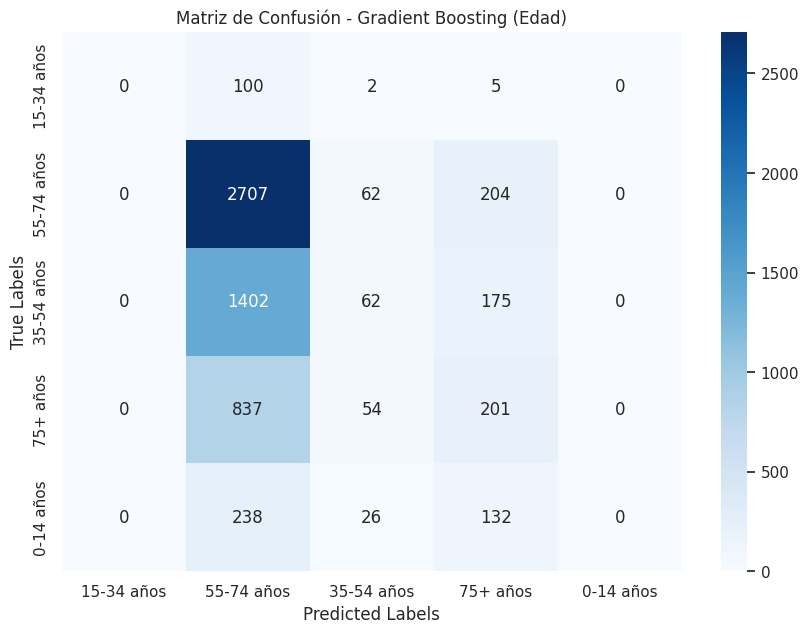

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-5-981644f7a8df>:96: FutureWarning:

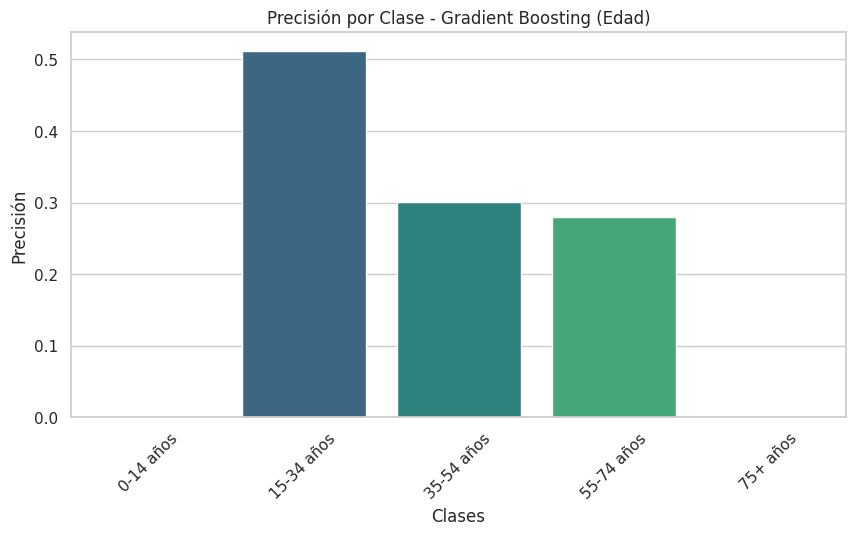

<ipython-input-5-981644f7a8df>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=recall, palette='viridis')


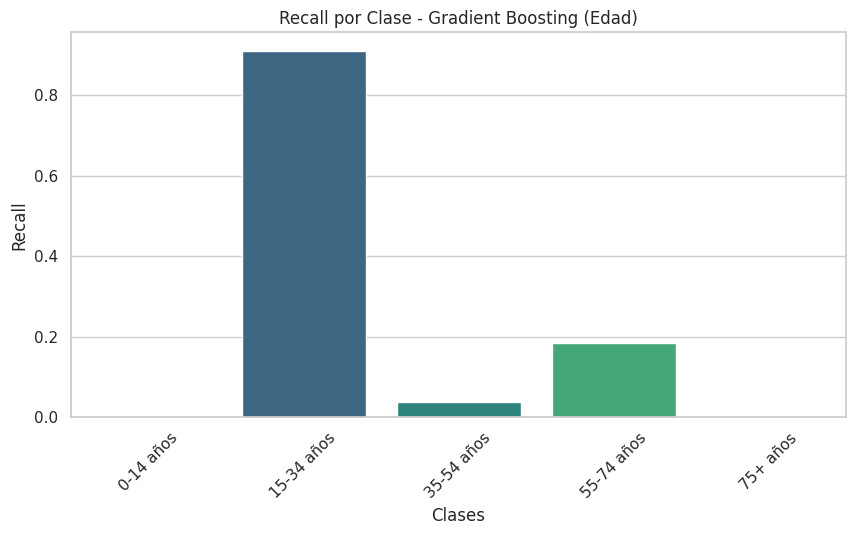

<ipython-input-5-981644f7a8df>:114: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=classes, y=f1_scores, palette='viridis')


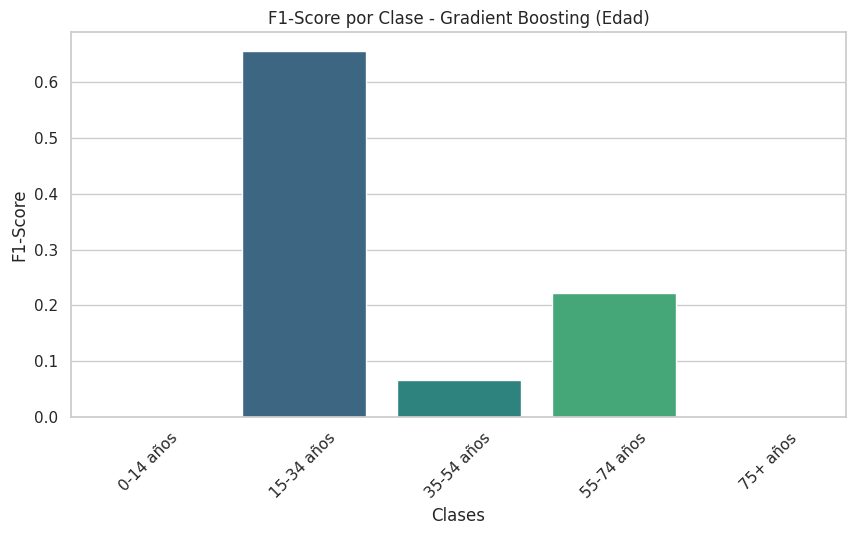

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Selección de las columnas relevantes para el análisis por edad
columnas_modelo = [
    'provincia_id', 'tipo_lugar_agrupado', 'modalidad_agrupada', 'suicida_sexo', 'anio', 'mes'
]

# Filtrar el DataFrame para obtener únicamente los registros con edad conocida
df_edad = df2[df2['edad_categoria'] != 'Sin determinar']

# Crear variables X (predictoras) e y (objetivo)
X = df_edad[columnas_modelo]
y = df_edad['edad_categoria']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo
gb_model = GradientBoostingClassifier()

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Definir la búsqueda aleatoria con mayor número de folds y combinaciones
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=40,
    cv=6,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Medir el tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo utilizando RandomizedSearchCV
random_search.fit(X_train, y_train)

# Calcular el tiempo total de entrenamiento
training_time = time.time() - start_time
print(f"Tiempo total de entrenamiento: {training_time:.2f} segundos")

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar la matriz de confusión, reporte de clasificación y precisión del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nPrecisión del Modelo:")
print(accuracy_score(y_test, y_pred))

# Visualizaciones

# Matriz de Confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión - Gradient Boosting (Edad)')
plt.show()

# Reporte de Clasificación - Métricas por Clase
report = classification_report(y_test, y_pred, output_dict=True)
classes = list(report.keys())[:-3]  # Excluir 'accuracy', 'macro avg', 'weighted avg'
precision = [report[cls]['precision'] for cls in classes]
recall = [report[cls]['recall'] for cls in classes]
f1_scores = [report[cls]['f1-score'] for cls in classes]

# Gráfico de Precisión por Clase
plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=precision, palette='viridis')
plt.xlabel('Clases')
plt.ylabel('Precisión')
plt.title('Precisión por Clase - Gradient Boosting (Edad)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de Recall por Clase
plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=recall, palette='viridis')
plt.xlabel('Clases')
plt.ylabel('Recall')
plt.title('Recall por Clase - Gradient Boosting (Edad)')
plt.xticks(rotation=45)
plt.show()

# Gráfico de F1-Score por Clase
plt.figure(figsize=(10, 5))
sns.barplot(x=classes, y=f1_scores, palette='viridis')
plt.xlabel('Clases')
plt.ylabel('F1-Score')
plt.title('F1-Score por Clase - Gradient Boosting (Edad)')
plt.xticks(rotation=45)
plt.show()


### Análisis de Resultados del Modelo Gradient Boosting para Clasificación de Edad

El análisis de los resultados del modelo Gradient Boosting revela varias observaciones clave sobre el rendimiento en la clasificación de las diferentes categorías de edad:

#### 1. Matriz de Confusión
La matriz de confusión evidencia el rendimiento desigual del modelo para diferentes categorías de edad. La clase `15-34 años` muestra un desempeño superior con 2707 instancias correctamente clasificadas, indicando que el modelo tiene una buena capacidad para identificar esta clase. Sin embargo, las demás clases presentan un bajo rendimiento. En particular, las categorías `0-14 años` y `75+ años` no tienen instancias correctamente clasificadas, lo que indica dificultades significativas del modelo para identificar estas categorías. Las clases `35-54 años` y `55-74 años` también presentan un alto número de clasificaciones incorrectas, lo cual refleja un problema de subrepresentación en la capacidad del modelo para estas edades.

#### 2. Métricas de Evaluación (Precisión, Recall y F1-Score)
- **Precisión**: La precisión es significativamente más alta para la clase `15-34 años` (0.51), lo que indica que el modelo tiene un menor número de falsos positivos para esta clase en comparación con otras. Las clases restantes muestran precisiones bajas, con valores cercanos a cero, lo cual implica que el modelo genera muchos falsos positivos para estas categorías. Esto significa que, al predecir estas clases, el modelo frecuentemente se equivoca.

- **Recall**: El recall para `15-34 años` es alto (0.91), lo que significa que el modelo logra identificar la gran mayoría de los casos pertenecientes a esta categoría. En contraste, el recall para las demás clases es bajo, particularmente para las categorías `0-14 años` y `75+ años`, que tienen valores de recall igual a cero. Esto sugiere que el modelo omite prácticamente todos los casos de estas clases, indicando un problema importante de sensibilidad hacia estas categorías.

- **F1-Score**: La puntuación F1 para `15-34 años` es la más alta (0.66), representando un balance aceptable entre precisión y recall para esta clase. Sin embargo, los valores de F1-Score para las otras clases son extremadamente bajos, reflejando un rendimiento pobre en términos tanto de precisión como de recall.

#### 3. Desempeño General
El modelo Gradient Boosting presenta una precisión global del 47.85%, lo cual es insuficiente para un problema de clasificación multiclase. El rendimiento está claramente sesgado hacia la clase `15-34 años`, que tiene una mayor representación en el conjunto de datos. Esta falta de equilibrio en el rendimiento se debe a la distribución desigual de las clases en los datos, lo cual genera un modelo incapaz de aprender adecuadamente los patrones asociados con las clases menos representadas.

**Problemas con Clases Minoritarias**: Las clases `0-14 años` y `75+ años` muestran valores de precisión y recall iguales a cero, lo que implica que el modelo no puede reconocer estas categorías en absoluto. Esto es un indicio de que el modelo no ha aprendido los patrones relevantes para estas clases, debido a la limitada cantidad de ejemplos disponibles durante el entrenamiento.

#### 4. Insights y Recomendaciones
- **Desbalance de Clases**: El análisis indica un desbalance significativo en el conjunto de datos, que impacta negativamente el rendimiento del modelo. Para abordar este problema, se recomienda aplicar técnicas de balanceo como el **sobremuestreo** de las clases minoritarias o el **submuestreo** de la clase mayoritaria, lo cual podría ayudar a mejorar la capacidad del modelo para clasificar correctamente todas las categorías de edad.

- **Optimización de Hiperparámetros**: Aunque se utilizó RandomizedSearchCV para optimizar los hiperparámetros, podría ser beneficioso explorar un rango más amplio de combinaciones o incluso utilizar **GridSearchCV** para realizar una búsqueda más exhaustiva y mejorar el rendimiento del modelo.

- **Ingeniería de Características**: Realizar una ingeniería de características más detallada podría mejorar el rendimiento del modelo. Identificar nuevas características relevantes ayudaría a diferenciar mejor entre las distintas categorías de edad, especialmente para aquellas clases que actualmente presentan un rendimiento pobre.

- **Modelos Alternativos**: Considerar otros algoritmos de clasificación, como **Random Forest** o **XGBoost**, podría ser útil, ya que estos modelos tienen diferentes enfoques para manejar datos desbalanceados y podrían ofrecer mejoras en la capacidad de generalización.

En conclusión, el modelo Gradient Boosting muestra un rendimiento adecuado únicamente para la clase `15-34 años`, mientras que las demás clases presentan problemas importantes de clasificación. Es fundamental abordar el desbalance de clases y explorar mejoras en la ingeniería de características y la optimización de hiperparámetros para lograr un modelo que sea capaz de realizar predicciones precisas en todas las categorías de edad. Estos pasos podrían ayudar a incrementar la precisión y efectividad del modelo, contribuyendo a un análisis más equitativo y robusto de las distintas edades.

Continuaremos con la aplicación del modelo de Gradient Boosting a la variable de Género.

### Introducción y Justificación del Análisis de Gradient Boosting para la Variable Género

El objetivo de aplicar el modelo Gradient Boosting a la variable 'Género' es aprovechar las ventajas que este algoritmo ofrece al capturar patrones complejos y realizar una clasificación precisa. En el contexto de los hallazgos del Análisis Exploratorio de Datos (EDA), se identificaron varios desequilibrios y patrones no lineales en la distribución de la variable 'Género', que requerían una herramienta de aprendizaje capaz de manejar con eficacia estos escenarios.

Gradient Boosting se destaca por su capacidad para aprender de manera iterativa, corrigiendo los errores de modelos previos mediante la creación de conjuntos robustos. Dado que en el EDA se observó que la distribución de las clases de género está algo desbalanceada, es crucial contar con un modelo que pueda mejorar sucesivamente, minimizando errores y optimizando la clasificación para ambas clases.

La selección de Gradient Boosting también se justifica porque es un algoritmo eficaz para problemas con características numéricas y categóricas, que permite la integración de hiperparámetros para ajustar mejor el modelo. En este caso, la variable 'Género' se estudia en conjunto con otros factores, como el tipo de lugar y modalidad, el cual podría tener correlaciones complejas y no evidentes, que el Gradient Boosting está bien posicionado para detectar.

Fitting 6 folds for each of 40 candidates, totalling 240 fits
Tiempo total de entrenamiento: 414.92 segundos
Matriz de Confusión:
[[  43 1302]
 [  35 5105]]

Reporte de Clasificación:
              precision    recall  f1-score   support

    Femenino       0.55      0.03      0.06      1345
   Masculino       0.80      0.99      0.88      5140

    accuracy                           0.79      6485
   macro avg       0.67      0.51      0.47      6485
weighted avg       0.75      0.79      0.71      6485


Precisión del Modelo:
0.7938319198149576


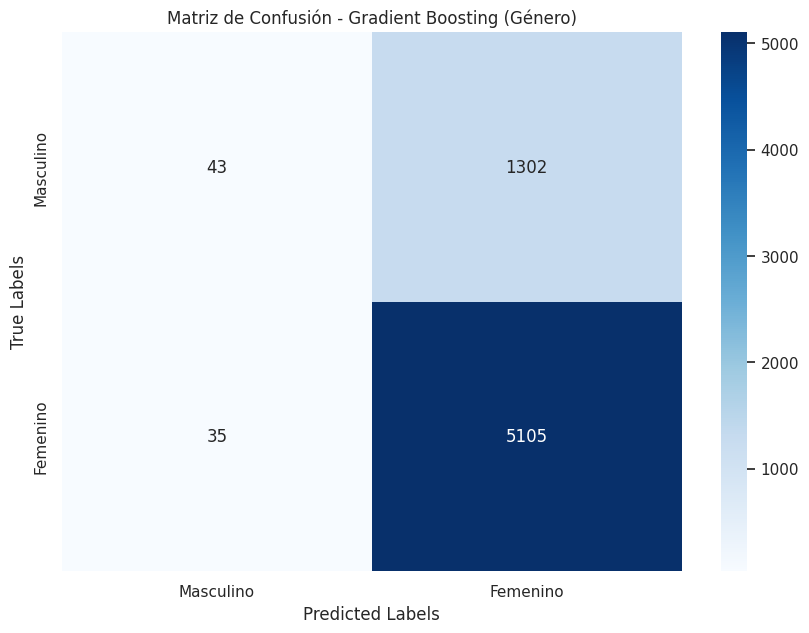

<ipython-input-6-95b89197b428>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')


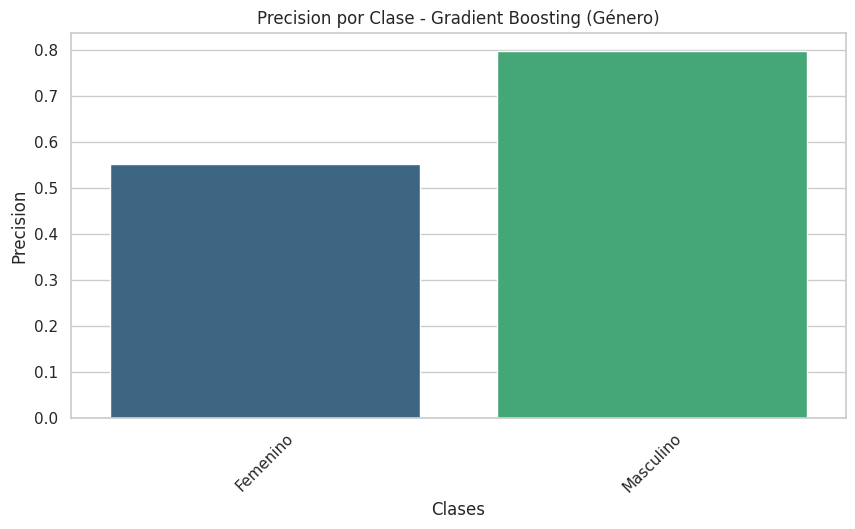

<ipython-input-6-95b89197b428>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')


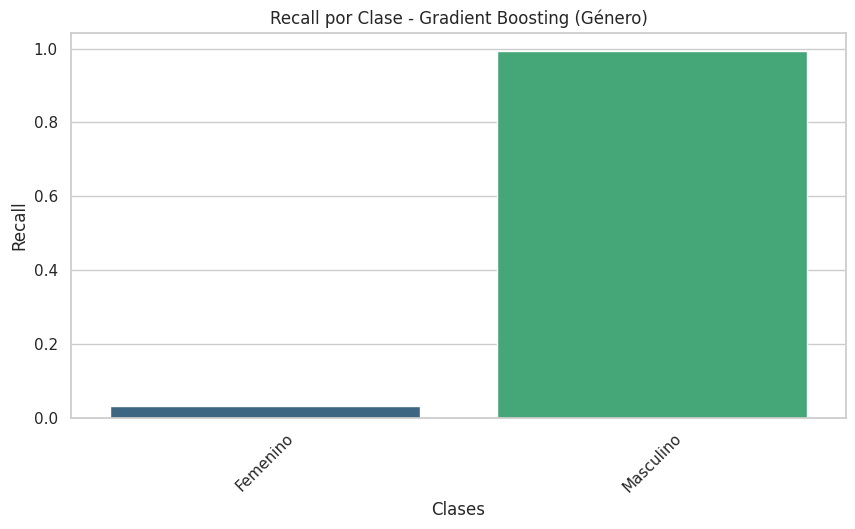

<ipython-input-6-95b89197b428>:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')


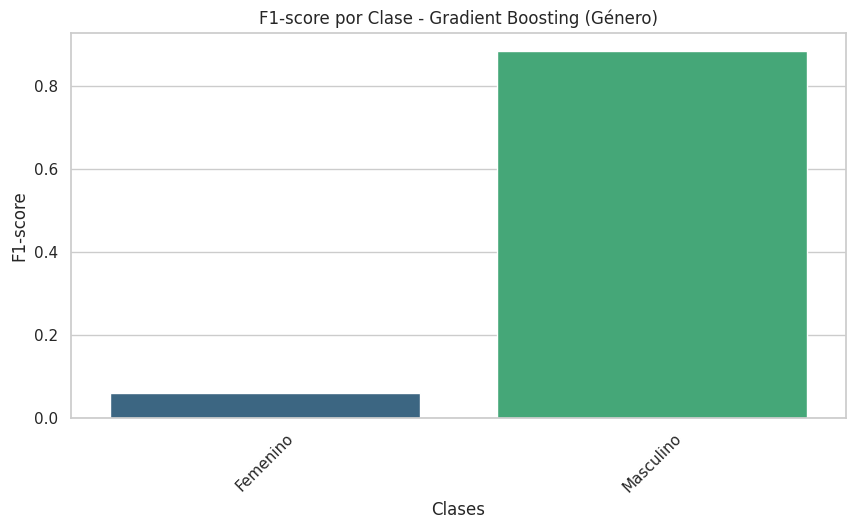

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Selección de las columnas relevantes para el análisis por género
columnas_modelo = [
    'provincia_id', 'tipo_lugar_agrupado', 'modalidad_agrupada', 'edad_categoria', 'anio', 'mes'
]

# Filtrar el DataFrame para obtener únicamente los registros con género conocido
df_genero = df2[df2['suicida_sexo'] != 'Sin determinar']

# Crear variables X (predictoras) e y (objetivo)
X = df_genero[columnas_modelo]
y = df_genero['suicida_sexo']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir el modelo Gradient Boosting
gb_model = GradientBoostingClassifier()

# Definir los hiperparámetros a optimizar
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Definir la búsqueda aleatoria con mayor número de folds y combinaciones
random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_grid,
    n_iter=40,  # Aumentar a 40 combinaciones a evaluar
    cv=6,       # Aumentar a 6 folds para validación cruzada
    random_state=42,
    n_jobs=-1,
    verbose=2
)

# Medir el tiempo de entrenamiento
start_time = time.time()

# Entrenar el modelo utilizando RandomizedSearchCV
random_search.fit(X_train, y_train)

# Calcular el tiempo total de entrenamiento
training_time = time.time() - start_time
print(f"Tiempo total de entrenamiento: {training_time:.2f} segundos")

# Evaluar el mejor modelo encontrado en el conjunto de prueba
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Mostrar la matriz de confusión, reporte de clasificación y precisión del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nReporte de Clasificación:")
report = classification_report(y_test, y_pred)
print(report)

print("\nPrecisión del Modelo:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión - Gradient Boosting (Género)')
plt.show()

# Extraer métricas del reporte de clasificación
report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose()

# Visualización de precisión, recall y F1-score
metrics_to_plot = ['precision', 'recall', 'f1-score']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], dodge=False, palette='viridis')
    plt.xlabel('Clases')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} por Clase - Gradient Boosting (Género)')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Eliminar leyenda duplicada
    plt.show()


### Análisis de Resultados del Modelo Gradient Boosting para Clasificación de Género

El análisis de los resultados del modelo Gradient Boosting aplicado a la clasificación de género muestra varias observaciones clave sobre el rendimiento del modelo:

#### 1. Matriz de Confusión
La matriz de confusión muestra que el modelo tiene un buen rendimiento al identificar la clase `Masculino`, con 5105 instancias correctamente clasificadas de un total de 5140. Sin embargo, el desempeño para la clase `Femenino` es considerablemente peor, con solo 43 instancias correctamente clasificadas de un total de 1345. Esto sugiere que el modelo tiene dificultades significativas para identificar correctamente a los individuos de esta clase, lo que se traduce en un alto número de falsos negativos.

#### 2. Precisión, Recall y F1-Score
- **Precisión**: La precisión para la clase `Femenino` es de 0.55, lo cual indica que, aunque el modelo tiene un cierto grado de confianza al clasificar esta categoría, la cantidad de falsos positivos sigue siendo alta. Para la clase `Masculino`, la precisión es de 0.80, lo que indica un buen rendimiento al clasificar correctamente esta clase.
- **Recall**: El recall para la clase `Femenino` es extremadamente bajo (0.03), lo cual significa que el modelo no es capaz de identificar la mayoría de las instancias de esta clase, omitiendo muchos casos relevantes. En cambio, el recall para la clase `Masculino` es muy alto (0.99), indicando que el modelo puede identificar casi todas las instancias de esta clase.
- **F1-Score**: La puntuación F1 para la clase `Femenino` es de 0.06, reflejando una combinación desequilibrada entre precisión y recall, lo que indica un bajo rendimiento general en esta categoría. Para la clase `Masculino`, el F1-Score es de 0.88, lo cual es una combinación sólida de precisión y recall.

#### 3. Desempeño General
- **Precisión Global**: La precisión global del modelo es del 79.38%, lo cual muestra un rendimiento aceptable en términos generales, pero con un sesgo importante hacia la clase `Masculino`. Este comportamiento sugiere que el modelo está priorizando la clase con mayor cantidad de datos disponibles.
- **Problemas con Clases Minoritarias**: La clase `Femenino` muestra un rendimiento muy deficiente, con valores de recall y F1-Score particularmente bajos. Esto sugiere que el modelo no ha logrado aprender correctamente los patrones asociados con esta clase, probablemente debido a un desequilibrio en los datos y una falta de representatividad adecuada durante el entrenamiento.

#### 4. Insights y Recomendaciones
- **Desbalance de Clases**: El desbalance significativo en los datos está afectando claramente el rendimiento del modelo para la clase minoritaria (`Femenino`). Se recomienda aplicar técnicas de balanceo, como **sobremuestreo** de la clase minoritaria o **submuestreo** de la clase mayoritaria, para mejorar la capacidad del modelo de aprender patrones relacionados con la clase `Femenino`.
- **Optimización de Hiperparámetros**: Aunque se utilizó una búsqueda aleatoria para optimizar los hiperparámetros, el rendimiento podría mejorarse aún más explorando técnicas como **GridSearchCV** para obtener combinaciones más precisas o incluso probar con diferentes valores de hiperparámetros, particularmente aquellos relacionados con la profundidad del árbol y el número de estimadores.
- **Uso de Modelos Adicionales**: Considerar el uso de otros algoritmos de clasificación, como **Random Forest** o modelos más avanzados como **XGBoost**, podría mejorar la capacidad del modelo para capturar relaciones complejas entre las variables y mitigar el sesgo hacia la clase mayoritaria.
- **Ingeniería de Características**: Podría ser beneficioso explorar nuevas características o combinaciones de las existentes que permitan al modelo diferenciar mejor entre las clases `Femenino` y `Masculino`. Por ejemplo, agregar interacciones entre variables o realizar una transformación de las características actuales podría ayudar a mejorar el rendimiento del modelo.

En conclusión, el modelo Gradient Boosting muestra un rendimiento satisfactorio solo para la clase `Masculino`, mientras que la clase `Femenino` presenta problemas significativos de identificación. Para mejorar el modelo, es necesario abordar el desbalance de clases, realizar una mejor ingeniería de características, y considerar técnicas avanzadas de optimización y otros algoritmos de clasificación. Estos pasos podrían ayudar a incrementar la precisión y equidad del modelo en ambas categorías de género.

###Aplicación de Gradient Boosting a la Clasificación por Región###

El análisis de los datos sobre la variable región tiene como objetivo identificar patrones geográficos que puedan influir en las características del fenómeno bajo estudio, particularmente en el contexto de tendencias suicidas en diferentes partes del país. Gradient Boosting también es un enfoque adecuado para este tipo de clasificación debido a su capacidad de capturar relaciones complejas entre las variables predictoras y la variable objetivo, incluso en presencia de desequilibrios o patrones no lineales en los datos.


La selección de Gradient Boosting se basa también en los hallazgos del Análisis Exploratorio de Datos (EDA), que mostró una heterogeneidad significativa en la distribución de los datos por región. Algunas regiones, como Buenos Aires y CABA, presentan una mayor concentración de eventos registrados, mientras que otras, como NOA y NEA, están sub-representadas. Este desbalance en los datos puede llevar a un sesgo en los modelos de clasificación convencionales. Sin embargo, Gradient Boosting tiene mecanismos inherentes para mitigar estos problemas a través de su enfoque iterativo y el ajuste fino de hiperparámetros, lo cual nos permite entrenar un modelo robusto que considere las características específicas de cada región.

La aplicación de Gradient Boosting será evaluada y comparada los resultados de Random Forest para esta misma variabl, para determinar cuál ofrece un mejor rendimiento en la clasificación regional. Este enfoque comparativo nos permitirá seleccionar el modelo más adecuado para las necesidades del proyecto, con el fin de obtener un análisis más preciso y equitativo de las tendencias suicidas por región.

Fitting 6 folds for each of 243 candidates, totalling 1458 fits
Tiempo total de entrenamiento: 19750.03 segundos
Matriz de Confusión:
[[1045  262    6    5  183    0]
 [ 474  287    9    9  221    1]
 [ 184   99   18    3   81    0]
 [ 203  106    1    1  112    2]
 [ 312  180    5    4  232    1]
 [ 156   81    3    1   66    1]]

Reporte de Clasificación:
                     precision    recall  f1-score   support

Buenos Aires y CABA       0.44      0.70      0.54      1501
             Centro       0.28      0.29      0.28      1001
               Cuyo       0.43      0.05      0.08       385
                NEA       0.04      0.00      0.00       425
                NOA       0.26      0.32      0.28       734
          Patagonia       0.20      0.00      0.01       308

           accuracy                           0.36      4354
          macro avg       0.28      0.23      0.20      4354
       weighted avg       0.32      0.36      0.31      4354


Precisión del Modelo:
0.36

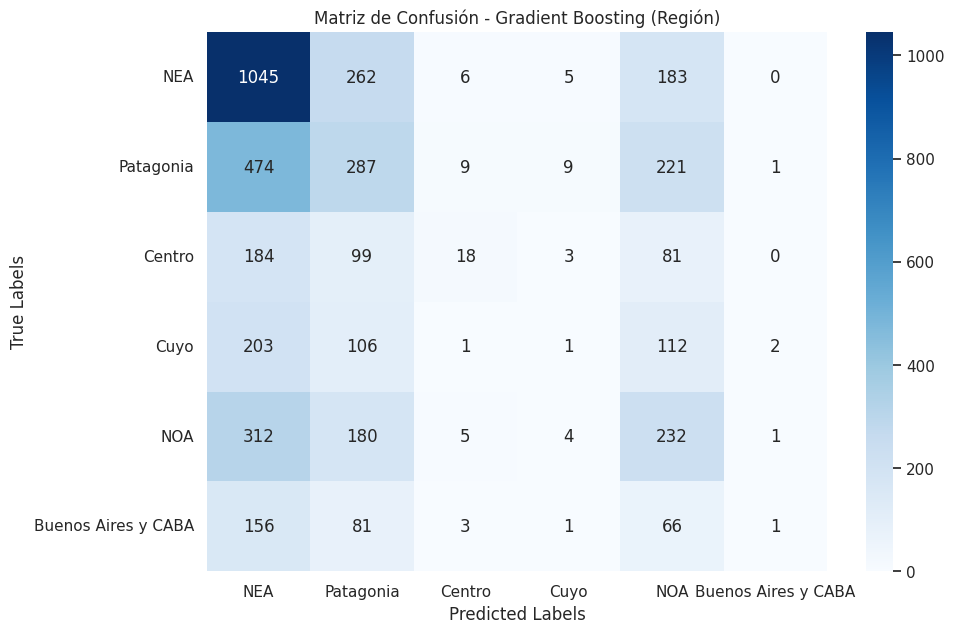

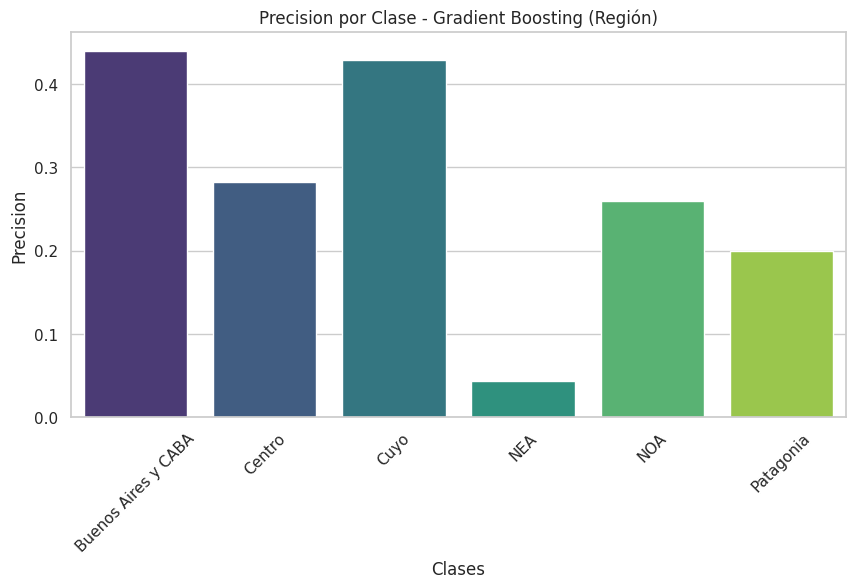

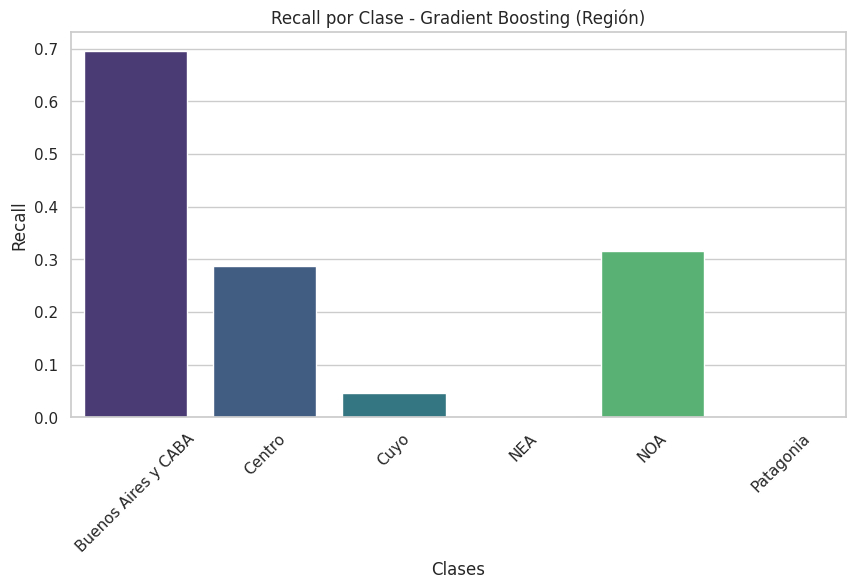

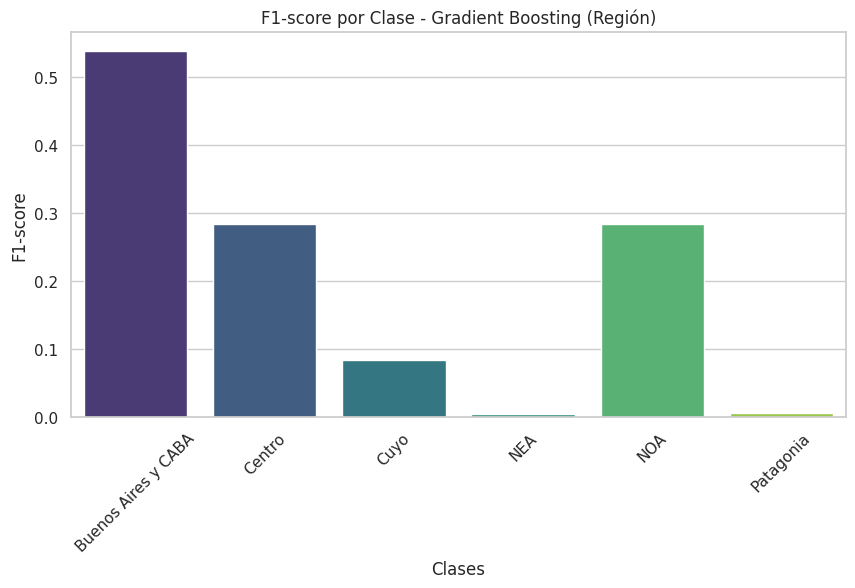

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time

# Definir las regiones y las provincias que las componen
regiones = {
    'NOA': ['Jujuy', 'Salta', 'Catamarca', 'Santiago del Estero', 'Tucumán', 'La Rioja'],
    'NEA': ['Misiones', 'Corrientes', 'Chaco', 'Formosa'],
    'Buenos Aires y CABA': ['Buenos Aires', 'Ciudad Autónoma de Buenos Aires'],
    'Centro': ['Córdoba', 'Santa Fe', 'Entre Ríos'],
    'Cuyo': ['San Luis', 'San Juan', 'Mendoza'],
    'Patagonia': ['La Pampa', 'Neuquén', 'Río Negro', 'Chubut', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']
}

# Filtrar el DataFrame para obtener únicamente los registros con región conocida
df_region = df2[(df2['anio'] >= 2019) & (df2['anio'] <= 2022)].copy()

# Asignar cada provincia a su respectiva región
df_region['region'] = df_region['provincia_nombre_x'].apply(
    lambda x: next((region for region, provincias in regiones.items() if x in provincias), 'Desconocido')
)

# Selección de las columnas relevantes para el análisis por región
columnas_modelo = [
    'tipo_lugar_agrupado', 'modalidad_agrupada', 'suicida_sexo', 'edad_categoria', 'anio', 'mes'
]

# Filtrar el DataFrame para obtener únicamente los registros con región conocida
df_region = df_region[df_region['region'] != 'Desconocido']

# Crear variables X (predictoras) e y (objetivo)
X = df_region[columnas_modelo]
y = df_region['region']

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(X)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)

# Definir el grid de hiperparámetros a explorar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=6, n_jobs=-1, verbose=2)

# Medir el tiempo de entrenamiento del modelo
start_time = time.time()

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Calcular el tiempo total
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Tiempo total de entrenamiento: {elapsed_time:.2f} segundos")

# Obtener el mejor modelo entrenado
best_gb = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred = best_gb.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nReporte de Clasificación:")
report = classification_report(y_test, y_pred)
print(report)
print("\nPrecisión del Modelo:")
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión - Gradient Boosting (Región)')
plt.show()

# Extraer métricas del reporte de clasificación
report_dict = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report_dict).transpose()

# Visualización de precisión, recall y F1-score
metrics_to_plot = ['precision', 'recall', 'f1-score']
for metric in metrics_to_plot:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=metrics_df.index[:-3], y=metrics_df[metric][:-3], hue=metrics_df.index[:-3], dodge=False, palette='viridis')
    plt.xlabel('Clases')
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} por Clase - Gradient Boosting (Región)')
    plt.xticks(rotation=45)
    plt.legend([], [], frameon=False)  # Eliminar leyenda duplicada
    plt.show()
